**Problem Statement**
Introduction
This assignment aims to give you an idea of applying EDA in a real business scenario. In this assignment, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

 

**Business Understanding** 
The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

 

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

All other cases: All other cases when the payment is paid on time.

 

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

Approved: The Company has approved loan Application

Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client, he received worse pricing which he did not want.

Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

Unused offer:  Loan has been cancelled by the client but at different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency to default.

 

**Business Objectives** 
This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough.



### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
import missingno as mno

%matplotlib inline

In [2]:
##igorning warnings
import warnings
warnings.filterwarnings('ignore')

# APPLICATION DATA analysis

## Reading Data

In [3]:
appl_df = pd.read_csv('/kaggle/input/financial-risk-analysis-data/application_data.csv') # This dataframe consists data of file application_data.csv


## Looking into the data

#### Lets Start with application_dataset

In [4]:
appl_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [5]:
## As we are not getting all the data from dataframe to view lets change the display settings
pd.set_option("display.max_rows", None, "display.max_columns", None)
appl_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

**Seeing information**

In [6]:
print(appl_df.info(verbose=True,show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

* So from the **info()** we see there are 307511 rows and 122 columns 
* From the result, out of 122 columns there are 65 float, 41 int, 16 object columnns
* Also there are certain columns which are having very high null values like `LIVINGAPARTMENTS_MEDI`, `FONDKAPREMONT_MODE`. So lets look at the null value percentages.

In [7]:
appl_df.shape

(307511, 122)

## Handling Missing Values 

In [8]:
## Checking null value percentages
print('NULL VALUE PERCENTAGES')
print('='*50)
print(100.0 * appl_df.isnull().sum()/appl_df.shape[0])
print('='*50)

NULL VALUE PERCENTAGES
SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PH

In [9]:
## Now lets see the variables who are having missing values greater than 10%

appl_missing = 100.0 * appl_df.isnull().sum()/appl_df.shape[0]
appl_missing_great_10 = appl_missing[appl_missing > 10].sort_values(ascending=False)
print(appl_missing_great_10)


COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_MODE        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
BASEMENTAREA_MODE               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MEDI               58.515956
EXT_SOURCE_1                    56

* From above looks like most of the columns having null values are > 45%
* Also all the columns which are missing more than 45%  are mostly mean, median and mode except for OWN_CAR_AGE which are anyhow in normalised form and doesn't look much needed for our use case. 
* Anyhow lets also visualise the missing columns

In [10]:
#mno.bar(appl_df) # using missingno library

**Lets also see how is columns have more than 45% null values w.r.t the snapshot of the data**


<AxesSubplot:>

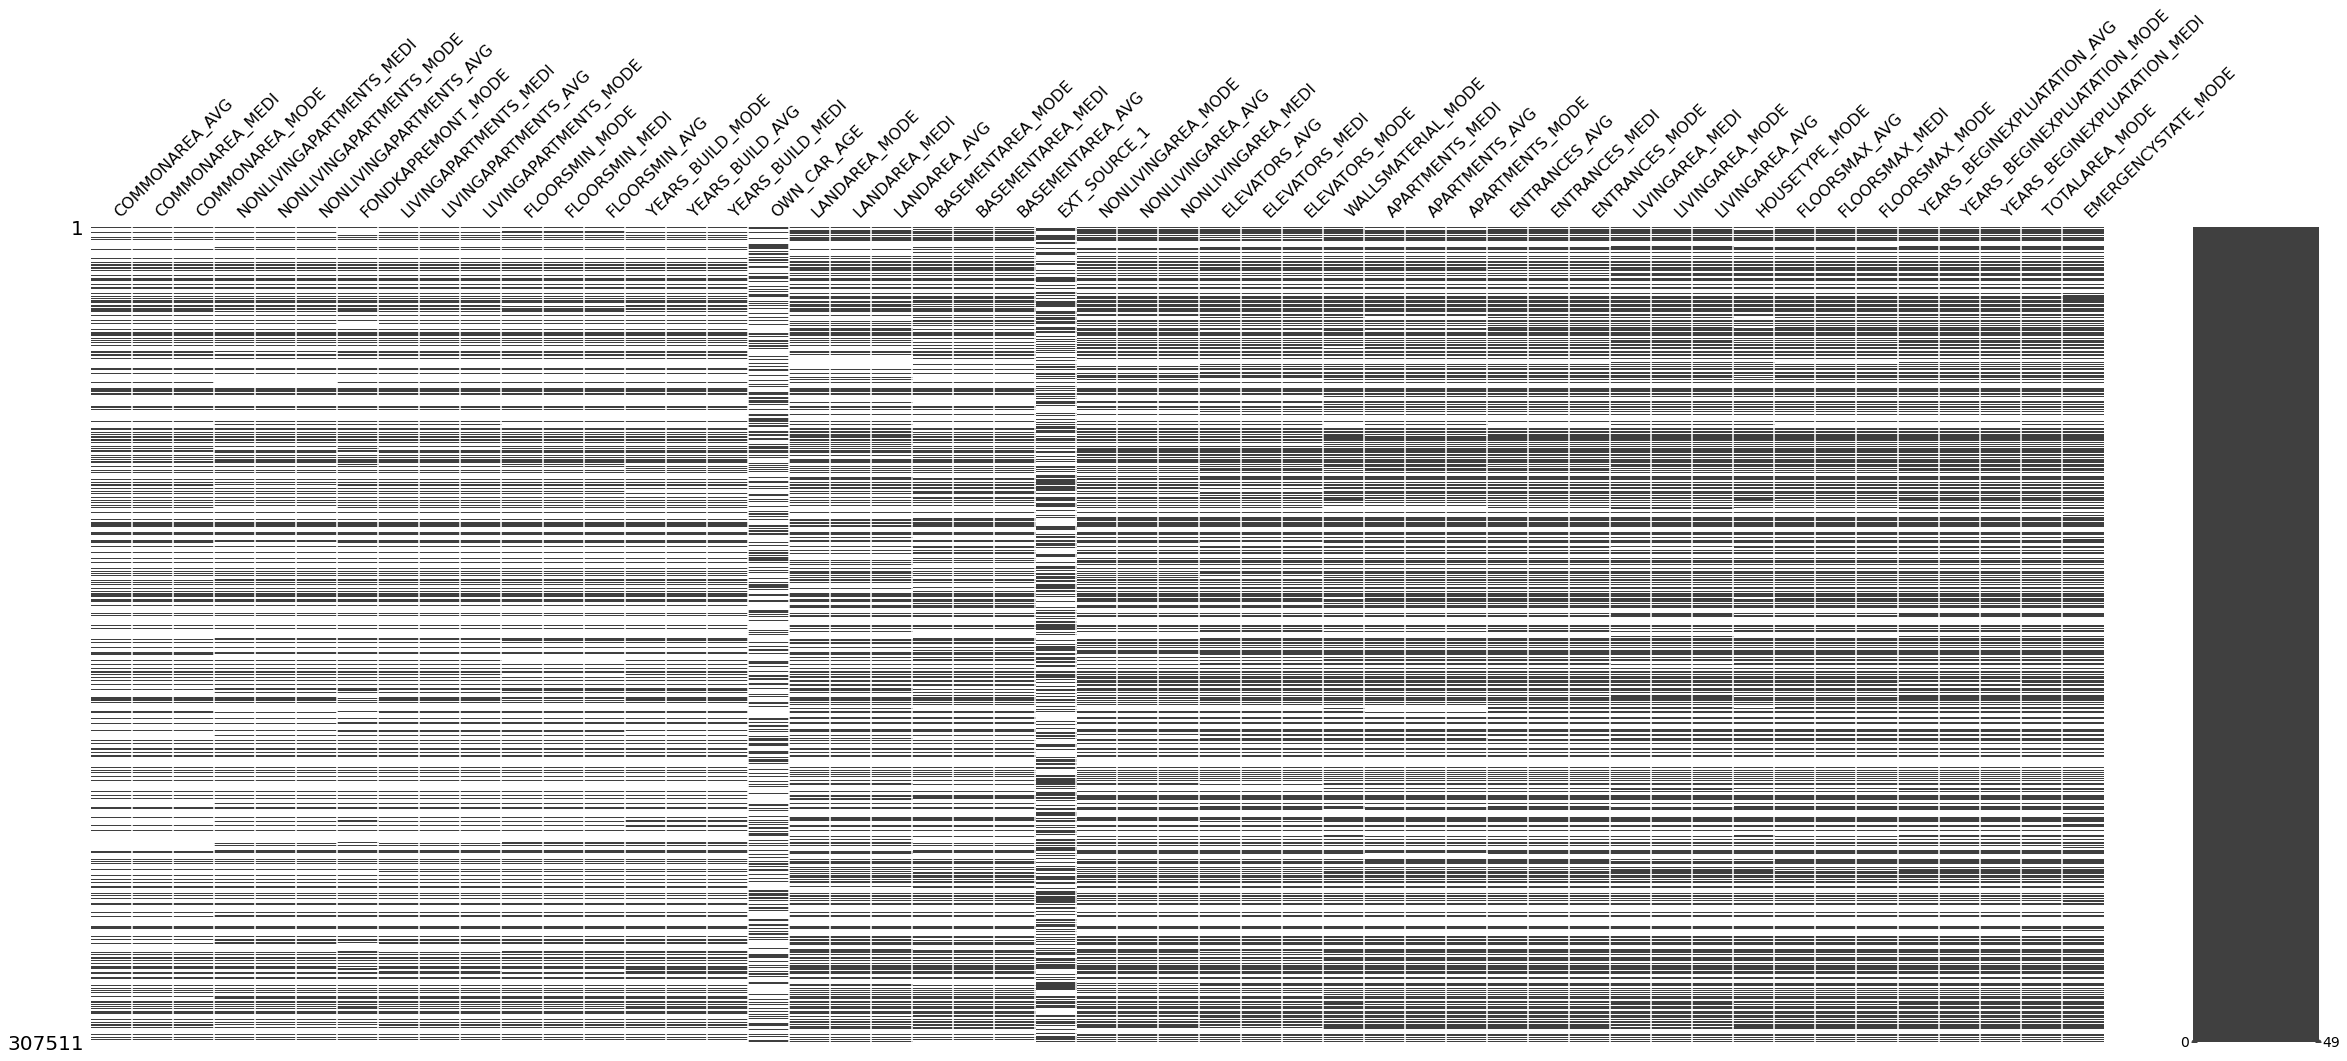

In [11]:
## Lets also see how is columns have more than 45% null values w.r.t the snapshot of the data
appl_missing_greater_45 = appl_missing[appl_missing > 45].sort_values(ascending=False)
appl_missing_greater_45_cols = list(appl_missing_greater_45.index)#getting the column names
mno.matrix(appl_df[appl_missing_greater_45_cols],figsize=(40, 15))

* From the above matrix we see most of the null values are overlapping across the rows
* For columns `OWN_CAR_AGE` and columns related to realty like `COMMONAREA_MEDI` which has 65% and 69% null records may be a case of **`Missing not at Random - MNAR`**. So lets check that out below

In [12]:
## Lets convert FLAG_OWN_REALTY, FLAG_OWN_CAR to numeric for more analysis.
#appl_df['APARTMENTS_AVG'].plot.hist()
appl_df['FLAG_OWN_REALTY_FLAG'] = appl_df.apply(lambda x: 1 if x['FLAG_OWN_REALTY'] == 'Y' else 0, axis=1)
appl_df['FLAG_OWN_CAR_FLAG'] = appl_df.apply(lambda x: 1 if x['FLAG_OWN_CAR'] == 'Y' else 0, axis=1)

In [13]:
# Lets first see the categories and its count in FLAG_OWN_CAR variable
print("Value Counts of column FLAG_OWN_CAR:")
print('-'*35)
print(appl_df.FLAG_OWN_CAR.value_counts())
print("="*30)
print("\nNULL Count in column OWN_CAR_AGE:",appl_df.OWN_CAR_AGE.isnull().sum())

Value Counts of column FLAG_OWN_CAR:
-----------------------------------
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

NULL Count in column OWN_CAR_AGE: 202929


In [14]:
# Lets first see the categories and count in FLAG_OWN_REALTY variable
print("Value Counts of column FLAG_OWN_REALTY:")
print('-'*35)
print(appl_df.FLAG_OWN_REALTY.value_counts())
print("="*30)
print("\nNULL Count in column COMMONAREA_MEDI:",appl_df.COMMONAREA_MEDI.isnull().sum())

Value Counts of column FLAG_OWN_REALTY:
-----------------------------------
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

NULL Count in column COMMONAREA_MEDI: 214865


In [15]:
print(appl_df[appl_df['FLAG_OWN_CAR']=='N']['OWN_CAR_AGE'].value_counts())
print(len(appl_df[appl_df['FLAG_OWN_REALTY']=='N']['COMMONAREA_MEDI'].value_counts()))

Series([], Name: OWN_CAR_AGE, dtype: int64)
2386


* From the above result approximately around 96% of missing values of OWN_CAR_AGE and COMMONAREA_MEDI are related to flag columns FLAG_OWN_CAR and FLAG_OWN_REALTY respectively. 
* So I can conclude that, OWN_CAR_AGE is having null values whenever FLAG_OWN_CAR is N i.e When the client doesn't own a car obviously there is no data for those records in OWN_CAR_AGE. The same is the case for FLAG_OWN_REALTY and normalised columns dependening on realty.
* Hence this can be considered as a case of `Missing not at Random - MNAR`

**Lets drop the columns which have more than 45% of null values**

In [16]:
appl_df.drop(labels=appl_missing_greater_45_cols,axis=1,inplace=True)

In [17]:
# Now lets see the info of appl_df
print(appl_df.info(verbose=True,show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

Lets see NULL percentages again

In [18]:
appl_after_drop_45_missing = 100.0 * appl_df.isnull().sum()/appl_df.shape[0]
appl_after_drop_45_great_zero = appl_after_drop_45_missing[appl_after_drop_45_missing > 0].sort_values(ascending=False)
appl_after_drop_45_great_zero_cols = list(appl_missing_greater_45.index)#getting the column names
#mno.matrix(appl_df[appl_missing_greater_45_cols],figsize=(40, 15))
print(appl_after_drop_45_great_zero)

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
dtype: float64


* Lets start with "occupation type"


In [19]:
appl_df['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

**Lets see how NULL values of OCCUPATION_TYPE is behaving w.r.t NAME_INCOME_TYPE for imputing values**

In [20]:
appli_occupation = appl_df[appl_df['OCCUPATION_TYPE'].isna()]['NAME_INCOME_TYPE'].value_counts()
print('Total categories of NAME_INCOME_TYPE when OCCUPATION_TYPE is NULL:')
print(appli_occupation)
print("="*30)

print()
print('-'*70)
print('\n*Count of categories of OCCUPATION_TYPE for each NAME_INCOME_TYPE*')
print("="*30)
for i in appli_occupation.index:
    print("\n",i)
    print("*"*30)
    print(appl_df[appl_df['NAME_INCOME_TYPE']==i]['OCCUPATION_TYPE'].value_counts())
    print("\nCount of {} in NAME_INCOME_TYPE: ".format(i),len(appl_df[appl_df['NAME_INCOME_TYPE']==i]))
    print("="*30)

Total categories of NAME_INCOME_TYPE when OCCUPATION_TYPE is NULL:
Pensioner               55357
Working                 24920
Commercial associate    12297
State servant            3787
Unemployed                 22
Student                     5
Businessman                 2
Maternity leave             1
Name: NAME_INCOME_TYPE, dtype: int64

----------------------------------------------------------------------

*Count of categories of OCCUPATION_TYPE for each NAME_INCOME_TYPE*

 Pensioner
******************************
Cleaning staff    2
Laborers          1
Medicine staff    1
Sales staff       1
Name: OCCUPATION_TYPE, dtype: int64

Count of Pensioner in NAME_INCOME_TYPE:  55362

 Working
******************************
Laborers                 40548
Sales staff              20811
Core staff               14080
Drivers                  12871
Managers                 10306
High skill tech staff     6852
Accountants               5112
Medicine staff            4915
Security staff      

```
So from above for NAME_INCOME_TYPE categories 'Working', 'Commercial associate', 'State servant','Businessman','Maternity leave' the missing value in OCCUPATION_TYPE is **Missing at Random i.e MAR**. Hence for the imputation for missing values in OCCUPATION_TYPE for the above categories can be the value of OCCUPATION_TYPE at mode of NAME_INCOME_TYPE for respective category. 

For Ex: 
When NAME_INCOME_TYPE category is `Working`, the mode of `OCCUPATION_TYPE` is `Laborers`. **Hence, for all the NULL values in OCCUPATION_TYPE which have NAME_INCOME_TYPE as Working will be imputed with Laborers**.
```


In [21]:
## Checking null values count before  imputing

print("Checking null values count before imputing\n")
print("Total null value count in OCCUPATION_TYPE: ", appl_df['OCCUPATION_TYPE'].isnull().sum())
print('Working: ', appl_df[appl_df['NAME_INCOME_TYPE']=='Working'].OCCUPATION_TYPE.isna().sum())
print('Commercial associate: ', appl_df[appl_df['NAME_INCOME_TYPE']=='Commercial associate'].OCCUPATION_TYPE.isna().sum())
print('State servant: ', appl_df[appl_df['NAME_INCOME_TYPE']=='State servant'].OCCUPATION_TYPE.isna().sum())
print('Businessman: ', appl_df[appl_df['NAME_INCOME_TYPE']=='Businessman'].OCCUPATION_TYPE.isna().sum())
print('Maternity leave: ', appl_df[appl_df['NAME_INCOME_TYPE']=='Maternity leave'].OCCUPATION_TYPE.isna().sum())

print('*'*30)

## Replacing NULL Values

working_mode = appl_df[appl_df['NAME_INCOME_TYPE']=='Working']['OCCUPATION_TYPE'].mode()[0]
appl_df['OCCUPATION_TYPE'].where(~((appl_df['NAME_INCOME_TYPE']=='Working') & (appl_df['OCCUPATION_TYPE'].isna())),working_mode,inplace=True)

comm_mode = appl_df[appl_df['NAME_INCOME_TYPE']=='Commercial associate']['OCCUPATION_TYPE'].mode()[0]
appl_df['OCCUPATION_TYPE'].where(~((appl_df['NAME_INCOME_TYPE']=='Commercial associate') & (appl_df['OCCUPATION_TYPE'].isna())),comm_mode,inplace=True)

stser_mode = appl_df[appl_df['NAME_INCOME_TYPE']=='State servant']['OCCUPATION_TYPE'].mode()[0]
appl_df['OCCUPATION_TYPE'].where(~((appl_df['NAME_INCOME_TYPE']=='State servant') & (appl_df['OCCUPATION_TYPE'].isna())),stser_mode,inplace=True)

busi_mode = appl_df[appl_df['NAME_INCOME_TYPE']=='Businessman']['OCCUPATION_TYPE'].mode()[0]
appl_df['OCCUPATION_TYPE'].where(~((appl_df['NAME_INCOME_TYPE']=='Businessman') & (appl_df['OCCUPATION_TYPE'].isna())),busi_mode,inplace=True)

matl_mode = appl_df[appl_df['NAME_INCOME_TYPE']=='Maternity leave']['OCCUPATION_TYPE'].mode()[0]
appl_df['OCCUPATION_TYPE'].where(~((appl_df['NAME_INCOME_TYPE']=='Maternity leave') & (appl_df['OCCUPATION_TYPE'].isna())),matl_mode,inplace=True)


## Checking null values count after imputing
print()
print('*'*30)
print("Checking null values count after  imputing\n")
print('Working: ', appl_df[appl_df['NAME_INCOME_TYPE']=='Working'].OCCUPATION_TYPE.isna().sum())
print('Commercial associate: ', appl_df[appl_df['NAME_INCOME_TYPE']=='Commercial associate'].OCCUPATION_TYPE.isna().sum())
print('State servant: ', appl_df[appl_df['NAME_INCOME_TYPE']=='State servant'].OCCUPATION_TYPE.isna().sum())
print('Businessman: ', appl_df[appl_df['NAME_INCOME_TYPE']=='Businessman'].OCCUPATION_TYPE.isna().sum())
print('Maternity leave: ', appl_df[appl_df['NAME_INCOME_TYPE']=='Maternity leave'].OCCUPATION_TYPE.isna().sum())
print("Total null value count in OCCUPATION_TYPE: ",appl_df['OCCUPATION_TYPE'].isnull().sum())



Checking null values count before imputing

Total null value count in OCCUPATION_TYPE:  96391
Working:  24920
Commercial associate:  12297
State servant:  3787
Businessman:  2
Maternity leave:  1
******************************

******************************
Checking null values count after  imputing

Working:  0
Commercial associate:  0
State servant:  0
Businessman:  0
Maternity leave:  0
Total null value count in OCCUPATION_TYPE:  55384


`Even not necessarily category Student  is MAR, we can impute with the mode in its category`

In [22]:
#Even not necessarily category Student  is MAR, we can impute with the mode in its category
stu_mode = appl_df[appl_df['NAME_INCOME_TYPE']=='Student']['OCCUPATION_TYPE'].mode()[0]
appl_df['OCCUPATION_TYPE'].where(~((appl_df['NAME_INCOME_TYPE']=='Student') & (appl_df['OCCUPATION_TYPE'].isna())),stu_mode,inplace=True)


* The remaining categories of OCCUPATION_TYPE which have NULL are `Missing Not a Random` Category as the income_type is Pensioner and Unemployed.
* For unemployed, as the records are only 22 we can drop those records.
* For Pensioner, we can see the age and impute with a particular category


In [23]:
## For that lets calculate age

### Lets change DAYS_BIRTH from negative to abs value
appl_df['DAYS_BIRTH'] = abs(appl_df['DAYS_BIRTH'])

### Lets calculate age
appl_df['AGE'] = round(appl_df['DAYS_BIRTH']/365,0)
appl_df['AGE'] = appl_df['AGE'].astype(int)


appl_df[(appl_df['NAME_INCOME_TYPE']=='Pensioner') & (appl_df['OCCUPATION_TYPE'].isna())]['AGE'].value_counts()



60    4614
63    4589
61    4511
62    4337
64    4227
59    4191
58    3908
57    3902
65    3773
56    3433
66    2380
55    1985
67    1639
68    1492
54    1164
53     896
52     790
51     567
50     375
69     280
49     264
48     255
47     246
46     195
45     165
44     143
43     141
42     120
39     100
41      99
40      94
38      78
37      55
36      43
35      38
30      33
33      31
34      30
32      29
31      26
28      24
27      22
26      19
29      16
25      12
23       9
24       8
22       7
21       2
Name: AGE, dtype: int64

```
Generally age>57 can be considered as retirement, hence lets impute for age>57 as `retired` for NULL value in  OCCUPATION_TYPE which constitutes to 39941 records

The remaining null values having NAME_INCOME_TYPE as Pensioner, we can impute with the mode of OCCUPATION_TYPE
```

In [24]:
appl_df['OCCUPATION_TYPE'].where(~((appl_df['NAME_INCOME_TYPE']=='Pensioner') & (appl_df['AGE']>57) & (appl_df['OCCUPATION_TYPE'].isna())),'Retired',inplace=True)
appl_df['OCCUPATION_TYPE'].where(~((appl_df['NAME_INCOME_TYPE']=='Pensioner') & (appl_df['OCCUPATION_TYPE'].isna())),appl_df['OCCUPATION_TYPE'].mode()[0],inplace=True)



`Now lets drop the Unemployed records`

In [25]:
appl_df[appl_df['OCCUPATION_TYPE'].isna()]
appl_df = appl_df[appl_df['OCCUPATION_TYPE'].notna()]

`NULL values in OCCUPATION_TYPE are handled. `
________

In [26]:
## Lets see NULL percentages again

appl_after_drop_45_missing = 100.0 * appl_df.isnull().sum()/appl_df.shape[0]
appl_after_drop_45_great_zero = appl_after_drop_45_missing[appl_after_drop_45_missing > 0].sort_values(ascending=False)
#mno.matrix(appl_df[appl_missing_greater_45_cols],figsize=(40, 15))
print(appl_after_drop_45_great_zero)

EXT_SOURCE_3                  19.821197
AMT_REQ_CREDIT_BUREAU_YEAR    13.497068
AMT_REQ_CREDIT_BUREAU_QRT     13.497068
AMT_REQ_CREDIT_BUREAU_MON     13.497068
AMT_REQ_CREDIT_BUREAU_WEEK    13.497068
AMT_REQ_CREDIT_BUREAU_DAY     13.497068
AMT_REQ_CREDIT_BUREAU_HOUR    13.497068
NAME_TYPE_SUITE                0.420178
DEF_60_CNT_SOCIAL_CIRCLE       0.331069
OBS_60_CNT_SOCIAL_CIRCLE       0.331069
DEF_30_CNT_SOCIAL_CIRCLE       0.331069
OBS_30_CNT_SOCIAL_CIRCLE       0.331069
EXT_SOURCE_2                   0.214642
AMT_GOODS_PRICE                0.090410
AMT_ANNUITY                    0.003903
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
dtype: float64


In [27]:
## We can also drop EXT_SOURCE_3, EXT_SOURCE_2 from the dataframe
appl_df.drop(labels=['EXT_SOURCE_3','EXT_SOURCE_2'],axis=1,inplace=True)

In [28]:
appl_after_drop_45_missing = 100.0 * appl_df.isnull().sum()/appl_df.shape[0]
appl_after_drop_45_great_zero = appl_after_drop_45_missing[appl_after_drop_45_missing > 0].sort_values(ascending=False)
#mno.matrix(appl_df[appl_missing_greater_45_cols],figsize=(40, 15))
print(appl_after_drop_45_great_zero)

AMT_REQ_CREDIT_BUREAU_HOUR    13.497068
AMT_REQ_CREDIT_BUREAU_DAY     13.497068
AMT_REQ_CREDIT_BUREAU_WEEK    13.497068
AMT_REQ_CREDIT_BUREAU_MON     13.497068
AMT_REQ_CREDIT_BUREAU_QRT     13.497068
AMT_REQ_CREDIT_BUREAU_YEAR    13.497068
NAME_TYPE_SUITE                0.420178
OBS_30_CNT_SOCIAL_CIRCLE       0.331069
DEF_30_CNT_SOCIAL_CIRCLE       0.331069
OBS_60_CNT_SOCIAL_CIRCLE       0.331069
DEF_60_CNT_SOCIAL_CIRCLE       0.331069
AMT_GOODS_PRICE                0.090410
AMT_ANNUITY                    0.003903
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
dtype: float64


* **Lets handle missing values in CREDIT_BUREAU columns**

In [29]:
#Lets see the values 
cred_beaur_cols = ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
for col in cred_beaur_cols:
    print(col)
    print(appl_df[col].value_counts())
    print('-'*50)

AMT_REQ_CREDIT_BUREAU_HOUR
0.0    264361
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64
--------------------------------------------------
AMT_REQ_CREDIT_BUREAU_DAY
0.0    264498
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64
--------------------------------------------------
AMT_REQ_CREDIT_BUREAU_WEEK
0.0    257451
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64
--------------------------------------------------
AMT_REQ_CREDIT_BUREAU_MON
0.0     222228
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0     

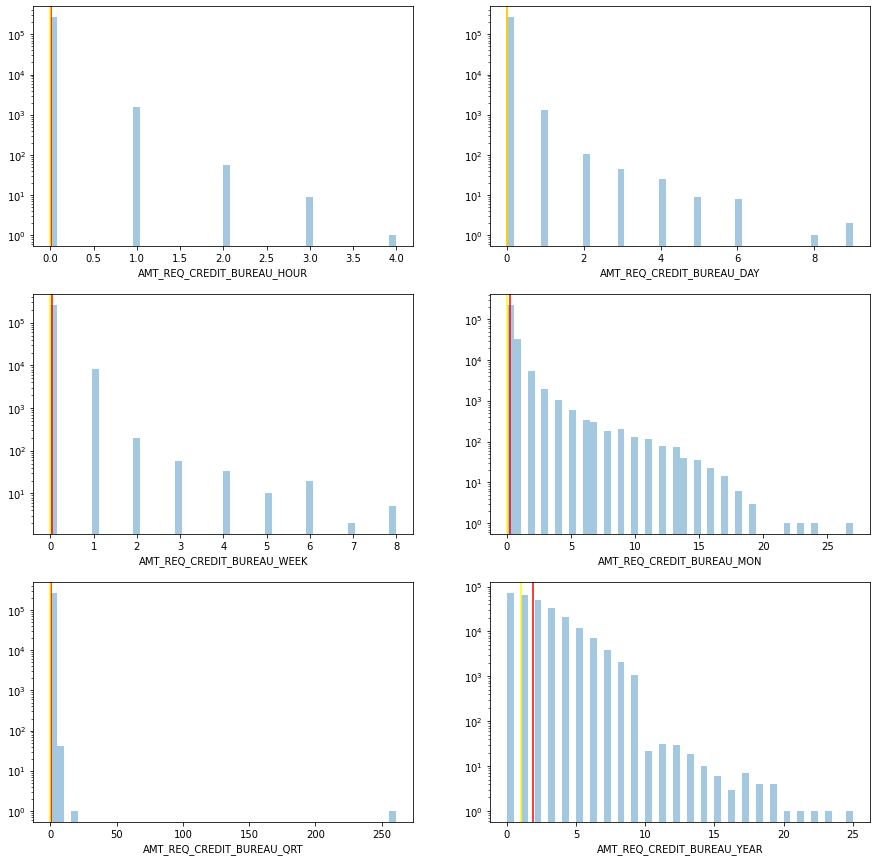

In [30]:
## Lets see the distribution of credit bureau columns
plt.figure(figsize=[15,15])
i=1
for col in cred_beaur_cols:
    plt.subplot(3,2,i)
    sns.distplot(appl_df[col],kde=False)
    plt.yscale("log")
    plt.axvline(appl_df[col].mean(), color='red')
    plt.axvline(appl_df[col].median(), color='yellow')
    i=i+1
    #print(i)
plt.show()



* From the above graphs except for AMT_REQ_CREDIT_BUREAU_YEAR and AMT_REQ_CREDIT_BUREAU_DAY mean and median looks pretty similar. So lets impute all these values with median itself

In [31]:
for col in cred_beaur_cols:
    appl_df[col].fillna(appl_df[col].median(),inplace=True)

`Handled Credit Bureau columns`
____

In [32]:
appl_after_drop_45_missing = 100.0 * appl_df.isnull().sum()/appl_df.shape[0]
appl_after_drop_45_great_zero = appl_after_drop_45_missing[appl_after_drop_45_missing > 0].sort_values(ascending=False)
#mno.matrix(appl_df[appl_missing_greater_45_cols],figsize=(40, 15))
print(appl_after_drop_45_great_zero)

NAME_TYPE_SUITE             0.420178
OBS_30_CNT_SOCIAL_CIRCLE    0.331069
DEF_30_CNT_SOCIAL_CIRCLE    0.331069
OBS_60_CNT_SOCIAL_CIRCLE    0.331069
DEF_60_CNT_SOCIAL_CIRCLE    0.331069
AMT_GOODS_PRICE             0.090410
AMT_ANNUITY                 0.003903
CNT_FAM_MEMBERS             0.000650
DAYS_LAST_PHONE_CHANGE      0.000325
dtype: float64


Lets do similar analysis for social circle columns to impute

In [33]:
soc_cir_cols = ['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']
for col in soc_cir_cols:
    print(col)
    print(appl_df[col].value_counts())
    print('-'*50)
    
    

OBS_30_CNT_SOCIAL_CIRCLE
0.0      163898
1.0       48783
2.0       29805
3.0       20320
4.0       14143
5.0        9553
6.0        6452
7.0        4390
8.0        2967
9.0        2002
10.0       1376
11.0        852
12.0        652
13.0        411
14.0        258
15.0        166
16.0        133
17.0         88
18.0         46
19.0         44
20.0         30
21.0         29
22.0         22
23.0         15
25.0         11
24.0         11
27.0          5
26.0          3
30.0          2
28.0          1
29.0          1
47.0          1
348.0         1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64
--------------------------------------------------
DEF_30_CNT_SOCIAL_CIRCLE
0.0     271306
1.0      28328
2.0       5322
3.0       1192
4.0        253
5.0         56
6.0         11
7.0          1
34.0         1
8.0          1
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64
--------------------------------------------------
OBS_60_CNT_SOCIAL_CIRCLE
0.0      164654
1.0       48870
2.0       29762
3.0    

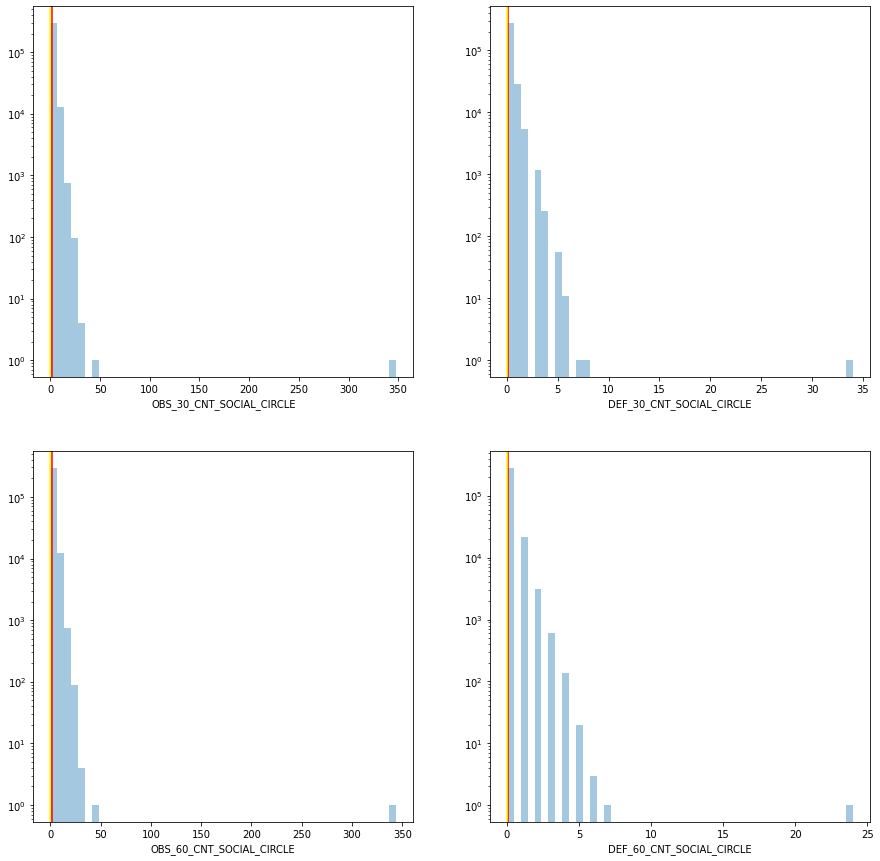

In [34]:
plt.figure(figsize=[15,15])
i=1
for col in soc_cir_cols:
    plt.subplot(2,2,i)
    sns.distplot(appl_df[col],kde=False)
    plt.yscale("log")
    plt.axvline(appl_df[col].mean(), color='red')
    plt.axvline(appl_df[col].median(), color='yellow')
    i=i+1
    #print(i)
plt.show()

* From the above graphs for these columns mean and median looks pretty similar. But looks like there are some extreme values hence lets impute all these missing values with median itself

In [35]:
for col in soc_cir_cols:
    appl_df[col].fillna(appl_df[col].median(),inplace=True)

`Handled Credit Bureau columns`
____

In [36]:
appl_after_drop_45_missing = 100.0 * appl_df.isnull().sum()/appl_df.shape[0]
appl_after_drop_45_great_zero = appl_after_drop_45_missing[appl_after_drop_45_missing > 0].sort_values(ascending=False)
#mno.matrix(appl_df[appl_missing_greater_45_cols],figsize=(40, 15))
print(appl_after_drop_45_great_zero)

NAME_TYPE_SUITE           0.420178
AMT_GOODS_PRICE           0.090410
AMT_ANNUITY               0.003903
CNT_FAM_MEMBERS           0.000650
DAYS_LAST_PHONE_CHANGE    0.000325
dtype: float64


Handling missing values in NAME_TYPE_SUITE column 

In [37]:
##As its a categorical column, lets impute with mode
print('Missing value count for NAME_TYPE_SUITE: ',appl_df.NAME_TYPE_SUITE.isnull().sum())
print()
print(appl_df.NAME_TYPE_SUITE.value_counts())
appl_df.NAME_TYPE_SUITE.fillna(appl_df.NAME_TYPE_SUITE.mode()[0],inplace=True)

Missing value count for NAME_TYPE_SUITE:  1292

Unaccompanied      248504
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64


In [38]:
appl_after_drop_45_missing = 100.0 * appl_df.isnull().sum()/appl_df.shape[0]
appl_after_drop_45_great_zero = appl_after_drop_45_missing[appl_after_drop_45_missing > 0].sort_values(ascending=False)
#mno.matrix(appl_df[appl_missing_greater_45_cols],figsize=(40, 15))
print(appl_after_drop_45_great_zero)

AMT_GOODS_PRICE           0.090410
AMT_ANNUITY               0.003903
CNT_FAM_MEMBERS           0.000650
DAYS_LAST_PHONE_CHANGE    0.000325
dtype: float64


Handling missing values in AMT_GOODS_PRICE column 

In [39]:
appl_df.AMT_GOODS_PRICE.describe()

count    3.072110e+05
mean     5.383800e+05
std      3.694384e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

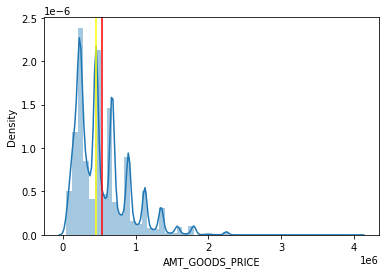

In [40]:
sns.distplot(appl_df.AMT_GOODS_PRICE)
#plt.xscale("log")
plt.axvline(appl_df['AMT_GOODS_PRICE'].mean(), color='red')
plt.axvline(appl_df['AMT_GOODS_PRICE'].median(), color='yellow')
plt.show()

In [41]:
### Lets impute with mean as the graph is right skewed
appl_df['AMT_GOODS_PRICE'].fillna(appl_df['AMT_GOODS_PRICE'].mean(),inplace=True)

In [42]:
appl_after_drop_45_missing = 100.0 * appl_df.isnull().sum()/appl_df.shape[0]
appl_after_drop_45_great_zero = appl_after_drop_45_missing[appl_after_drop_45_missing > 0].sort_values(ascending=False)
#mno.matrix(appl_df[appl_missing_greater_45_cols],figsize=(40, 15))
print(appl_after_drop_45_great_zero)

AMT_ANNUITY               0.003903
CNT_FAM_MEMBERS           0.000650
DAYS_LAST_PHONE_CHANGE    0.000325
dtype: float64


Handling missinng in AMT_ANNUITY column

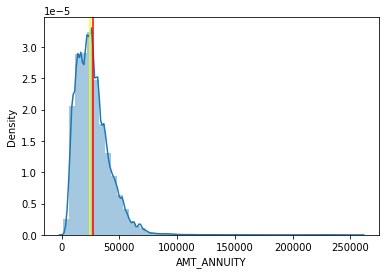

In [43]:
sns.distplot(appl_df.AMT_ANNUITY)
#plt.xscale("log")
plt.axvline(appl_df['AMT_ANNUITY'].mean(), color='red')
plt.axvline(appl_df['AMT_ANNUITY'].median(), color='yellow')
plt.show()

In [44]:
### Lets impute with mean as the graph is right skewed also mean and median are quite near
appl_df['AMT_ANNUITY'].fillna(appl_df['AMT_ANNUITY'].mean(),inplace=True)

In [45]:
appl_after_drop_45_missing = 100.0 * appl_df.isnull().sum()/appl_df.shape[0]
appl_after_drop_45_great_zero = appl_after_drop_45_missing[appl_after_drop_45_missing > 0].sort_values(ascending=False)
#mno.matrix(appl_df[appl_missing_greater_45_cols],figsize=(40, 15))
print(appl_after_drop_45_great_zero)

CNT_FAM_MEMBERS           0.000650
DAYS_LAST_PHONE_CHANGE    0.000325
dtype: float64


Handling missinng in CNT_FAM_MEMBERS column

In [46]:
##Handling CNT_FAM_MEMBERS NNULL Values
appl_df['CNT_FAM_MEMBERS'].value_counts()

2.0     158346
1.0      67839
3.0      52598
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

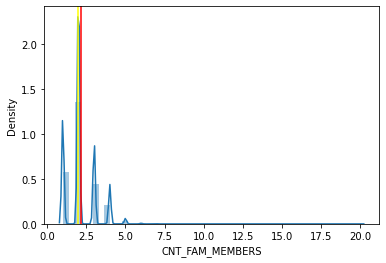

In [47]:
sns.distplot(appl_df.CNT_FAM_MEMBERS)
#plt.xscale("log")
plt.axvline(appl_df['CNT_FAM_MEMBERS'].mean(), color='red')
plt.axvline(appl_df['CNT_FAM_MEMBERS'].median(), color='yellow')
plt.show()

In [48]:
## As its a categorical column we can either go for median or mode
print('median: ',appl_df['CNT_FAM_MEMBERS'].median(),' mode: ',appl_df['CNT_FAM_MEMBERS'].mode()[0])

median:  2.0  mode:  2.0


As median and mode both are same lets impute with median

In [49]:
## As median and mode both are same lets impute with median
appl_df['CNT_FAM_MEMBERS'].fillna(appl_df['CNT_FAM_MEMBERS'].median(),inplace=True)

In [50]:
appl_after_drop_45_missing = 100.0 * appl_df.isnull().sum()/appl_df.shape[0]
appl_after_drop_45_great_zero = appl_after_drop_45_missing[appl_after_drop_45_missing > 0].sort_values(ascending=False)
#mno.matrix(appl_df[appl_missing_greater_45_cols],figsize=(40, 15))
print(appl_after_drop_45_great_zero)

DAYS_LAST_PHONE_CHANGE    0.000325
dtype: float64


Handling missing values in DAYS_LAST_PHONE_CHANGE

In [51]:
appl_df['DAYS_LAST_PHONE_CHANGE'].describe()

count    307488.000000
mean       -962.871540
std         826.817525
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

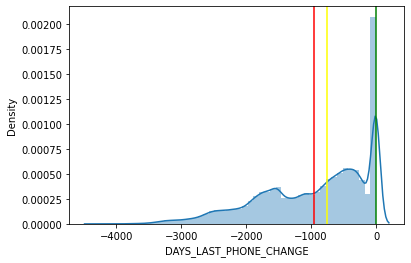

In [52]:
sns.distplot(appl_df.DAYS_LAST_PHONE_CHANGE)
#plt.xscale("log")
plt.axvline(appl_df['DAYS_LAST_PHONE_CHANGE'].mean(), color='red')
plt.axvline(appl_df['DAYS_LAST_PHONE_CHANGE'].median(), color='yellow')
plt.axvline(appl_df['DAYS_LAST_PHONE_CHANGE'].mode()[0], color='green')

plt.show()

As this value can't be in decimal we can't go for mean, either median or mode. Here we can go for mode as there is data skew

In [53]:
appl_df['DAYS_LAST_PHONE_CHANGE'].fillna(appl_df['DAYS_LAST_PHONE_CHANGE'].mode()[0],inplace=True)

**All the missing values are handled**
____

## Handling Outliers

### Correcting data into more readable form

1. Lets convert all negative values to positive

In [54]:
appl_df['DAYS_ID_PUBLISH'] = abs(appl_df['DAYS_ID_PUBLISH'])
appl_df['DAYS_LAST_PHONE_CHANGE'] = abs(appl_df['DAYS_LAST_PHONE_CHANGE'])
appl_df['DAYS_EMPLOYED'] = abs(appl_df['DAYS_EMPLOYED'])
appl_df['DAYS_REGISTRATION'] = abs(appl_df['DAYS_REGISTRATION'])

2. Lets remove duplicate columns

In [55]:
appl_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307489 entries, 0 to 307510
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307489 non-null  int64  
 1   TARGET                       307489 non-null  int64  
 2   NAME_CONTRACT_TYPE           307489 non-null  object 
 3   CODE_GENDER                  307489 non-null  object 
 4   FLAG_OWN_CAR                 307489 non-null  object 
 5   FLAG_OWN_REALTY              307489 non-null  object 
 6   CNT_CHILDREN                 307489 non-null  int64  
 7   AMT_INCOME_TOTAL             307489 non-null  float64
 8   AMT_CREDIT                   307489 non-null  float64
 9   AMT_ANNUITY                  307489 non-null  float64
 10  AMT_GOODS_PRICE              307489 non-null  float64
 11  NAME_TYPE_SUITE              307489 non-null  object 
 12  NAME_INCOME_TYPE             307489 non-null  object 
 13 

In [56]:
appl_df.drop('DAYS_BIRTH',axis=1,inplace=True)

In [57]:
appl_df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307489.000000  307489.000000  307489.000000      3.074890e+05   
mean   278182.216385       0.080709       0.417069      1.688021e+05   
std    102789.923908       0.272387       0.722133      2.371300e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189146.000000       0.000000       0.000000      1.125000e+05   
50%    278203.000000       0.000000       0.000000      1.476000e+05   
75%    367145.000000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.074890e+05  307489.000000     3.074890e+05   
mean   5.990142e+05   27108.497364     5.383800e+05   
std    4.024878e+05   14493.554813     3.692714e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE  DAYS_EMPLOYED  DAYS_REGISTRATION  \
count               307489.000000  307489.000000      307489.000000   
mean                     0.020868   67703.455528        4986.124379   
std                      0.013831  139426.028759        3522.916409   
min                      0.000290       0.000000           0.000000   
25%                      0.010006     933.000000        2009.000000   
50%                      0.018850    2219.000000        4504.000000   
75%                      0.028663    5705.000000        7480.000000   
max                      0.072508  365243.000000       24672.000000   

       DAYS_ID_PUBLISH     FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
count    307489.000000  307489.000000   307489.000000    307489.000000   
mean       2994.201981       0.999997        0.819948         0.199383   
std        1509.445036       0.001803        0.384231         0.399537   
min           0.000000       0.000000        0.000000         0.000000   
25%        1720.000000       1.000000        1.000000         0.000000   
50%        3254.000000       1.000000        1.000000         0.000000   
75%        4299.000000       1.000000        1.000000         0.000000   
max        7197.000000       1.000000        1.000000         1.000000   

       FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  CNT_FAM_MEMBERS  \
count     307489.000000  307489.000000  307489.000000    307489.000000   
mean           0.998133       0.281073       0.056714         2.152692   
std            0.043165       0.449524       0.231296         0.910688   
min            0.000000       0.000000       0.000000         1.000000   
25%            1.000000       0.000000       0.000000         2.000000   
50%            1.000000       0.000000       0.000000         2.000000   
75%            1.000000       1.000000       0.000000         3.000000   
max            1.000000       1.000000       1.000000        20.000000   

       REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count         307489.000000                307489.000000   
mean               2.052460                     2.031523   
std                0.509027                     0.502736   
min                1.000000                     1.000000   
25%                2.000000                     2.000000   
50%                2.000000                     2.000000   
75%                2.000000                     2.000000   
max                3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count            307489.000000               307489.000000   
mean                 12.063394                    0.015139   
std                   3.265862                    0.122105   
min                   0.000000                    0.000000   
25%                  10.000000          

3. Lets correct the data

In [58]:
appl_df.CODE_GENDER.value_counts()

F      202431
M      105054
XNA         4
Name: CODE_GENDER, dtype: int64

In [59]:
##Lets impute XNA values with mode i.e F
appl_df['CODE_GENDER'].where(~(appl_df['CODE_GENDER']=='XNA'),'F',inplace=True)
appl_df.CODE_GENDER.value_counts()

F    202435
M    105054
Name: CODE_GENDER, dtype: int64

In [60]:
appl_df['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55352
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

Checking ORGANIZATION_TYPE w.r.t OCCUPATION_TYPE, NAME_INCOME_TYPE

In [61]:
appl_df[appl_df['ORGANIZATION_TYPE']=='XNA'].OCCUPATION_TYPE.value_counts()

Retired           39939
Laborers          15411
Cleaning staff        2
Name: OCCUPATION_TYPE, dtype: int64

In [62]:
appli_occupation_org = appl_df[appl_df['ORGANIZATION_TYPE']=='XNA']['NAME_INCOME_TYPE'].value_counts()
print('Total categories of NAME_INCOME_TYPE when OCCUPATION_TYPE is XNA:')
print(appli_occupation_org)
print("="*30)

print()
print('-'*70)
print('\n*Count of categories of OCCUPATION_TYPE for each NAME_INCOME_TYPE*')
print("="*30)
for i in appli_occupation_org.index:
    print("\n",i)
    print("*"*30)
    print(appl_df[appl_df['NAME_INCOME_TYPE']==i]['ORGANIZATION_TYPE'].value_counts())
    print("\nCount of {} in NAME_INCOME_TYPE: ".format(i),len(appl_df[appl_df['NAME_INCOME_TYPE']==i]))
    print("="*30)

Total categories of NAME_INCOME_TYPE when OCCUPATION_TYPE is XNA:
Pensioner    55352
Name: NAME_INCOME_TYPE, dtype: int64

----------------------------------------------------------------------

*Count of categories of OCCUPATION_TYPE for each NAME_INCOME_TYPE*

 Pensioner
******************************
XNA                       55352
Business Entity Type 3        3
Business Entity Type 2        1
Industry: type 9              1
Medicine                      1
Military                      1
Trade: type 7                 1
Self-employed                 1
School                        1
Name: ORGANIZATION_TYPE, dtype: int64

Count of Pensioner in NAME_INCOME_TYPE:  55362


* So looks like what I imputed earlier for NULL values in OCCUPATION_TYPE when NAME_INCOME_TYPE is Pensioner. Meaning that for all those values the ORGANIZATION_TYPE had XNA
* **Lets assume that the pension we are getting is from the Government**.
* **Hence lets impute XNA values of ORGANIZATION_TYPE with Government.** 
    * If we don't take that assumption we can add a new category as Pension-employed for them as we may be grouping into a new category rather than grouping into Government, as even private employees can get pensionn via NPS or not also in Other as we don't know the business rules of categorizing it in Other. 


In [63]:
print('Before replacing ', len(appl_df[appl_df['ORGANIZATION_TYPE']=='XNA']))
appl_df['ORGANIZATION_TYPE'].where(~(appl_df['ORGANIZATION_TYPE']=='XNA'),'Government',inplace=True)
print('After replacing ', len(appl_df[appl_df['ORGANIZATION_TYPE']=='XNA']))

Before replacing  55352
After replacing  0


In [64]:
for col in appl_df.columns:
    print(col,len(appl_df[appl_df[col]=='XNA']))

SK_ID_CURR 0
TARGET 0
NAME_CONTRACT_TYPE 0
CODE_GENDER 0
FLAG_OWN_CAR 0
FLAG_OWN_REALTY 0
CNT_CHILDREN 0
AMT_INCOME_TOTAL 0
AMT_CREDIT 0
AMT_ANNUITY 0
AMT_GOODS_PRICE 0
NAME_TYPE_SUITE 0
NAME_INCOME_TYPE 0
NAME_EDUCATION_TYPE 0
NAME_FAMILY_STATUS 0
NAME_HOUSING_TYPE 0
REGION_POPULATION_RELATIVE 0
DAYS_EMPLOYED 0
DAYS_REGISTRATION 0
DAYS_ID_PUBLISH 0
FLAG_MOBIL 0
FLAG_EMP_PHONE 0
FLAG_WORK_PHONE 0
FLAG_CONT_MOBILE 0
FLAG_PHONE 0
FLAG_EMAIL 0
OCCUPATION_TYPE 0
CNT_FAM_MEMBERS 0
REGION_RATING_CLIENT 0
REGION_RATING_CLIENT_W_CITY 0
WEEKDAY_APPR_PROCESS_START 0
HOUR_APPR_PROCESS_START 0
REG_REGION_NOT_LIVE_REGION 0
REG_REGION_NOT_WORK_REGION 0
LIVE_REGION_NOT_WORK_REGION 0
REG_CITY_NOT_LIVE_CITY 0
REG_CITY_NOT_WORK_CITY 0
LIVE_CITY_NOT_WORK_CITY 0
ORGANIZATION_TYPE 0
OBS_30_CNT_SOCIAL_CIRCLE 0
DEF_30_CNT_SOCIAL_CIRCLE 0
OBS_60_CNT_SOCIAL_CIRCLE 0
DEF_60_CNT_SOCIAL_CIRCLE 0
DAYS_LAST_PHONE_CHANGE 0
FLAG_DOCUMENT_2 0
FLAG_DOCUMENT_3 0
FLAG_DOCUMENT_4 0
FLAG_DOCUMENT_5 0
FLAG_DOCUMENT_6 0
FLAG

**`We are done with handling XNA values`**

_____



In [65]:
print(appl_df.info(verbose=True,show_counts=True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307489 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307489 non-null  int64  
 1   TARGET                       307489 non-null  int64  
 2   NAME_CONTRACT_TYPE           307489 non-null  object 
 3   CODE_GENDER                  307489 non-null  object 
 4   FLAG_OWN_CAR                 307489 non-null  object 
 5   FLAG_OWN_REALTY              307489 non-null  object 
 6   CNT_CHILDREN                 307489 non-null  int64  
 7   AMT_INCOME_TOTAL             307489 non-null  float64
 8   AMT_CREDIT                   307489 non-null  float64
 9   AMT_ANNUITY                  307489 non-null  float64
 10  AMT_GOODS_PRICE              307489 non-null  float64
 11  NAME_TYPE_SUITE              307489 non-null  object 
 12  NAME_INCOME_TYPE             307489 non-null  object 
 13 

_____
`Lets do outlier handling for numerical non categorical varaiables `

In [66]:
all_num_cols = appl_df.select_dtypes(exclude='object')
flag_doc_cols = ['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']
cred_beaur_cols = ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
soc_cir_cols = [ 'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']
all_num_cats = ['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','CNT_FAM_MEMBERS','CNT_CHILDREN','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','HOUR_APPR_PROCESS_START']


all_non_cat_num_cols = [col for col in all_num_cols if (col not in all_num_cats) & (col not in flag_doc_cols) & (col not in cred_beaur_cols) & (col not in soc_cir_cols) & (col not in ['FLAG_OWN_REALTY_FLAG','FLAG_OWN_CAR_FLAG', 'TARGET','SK_ID_CURR','AGE'])]



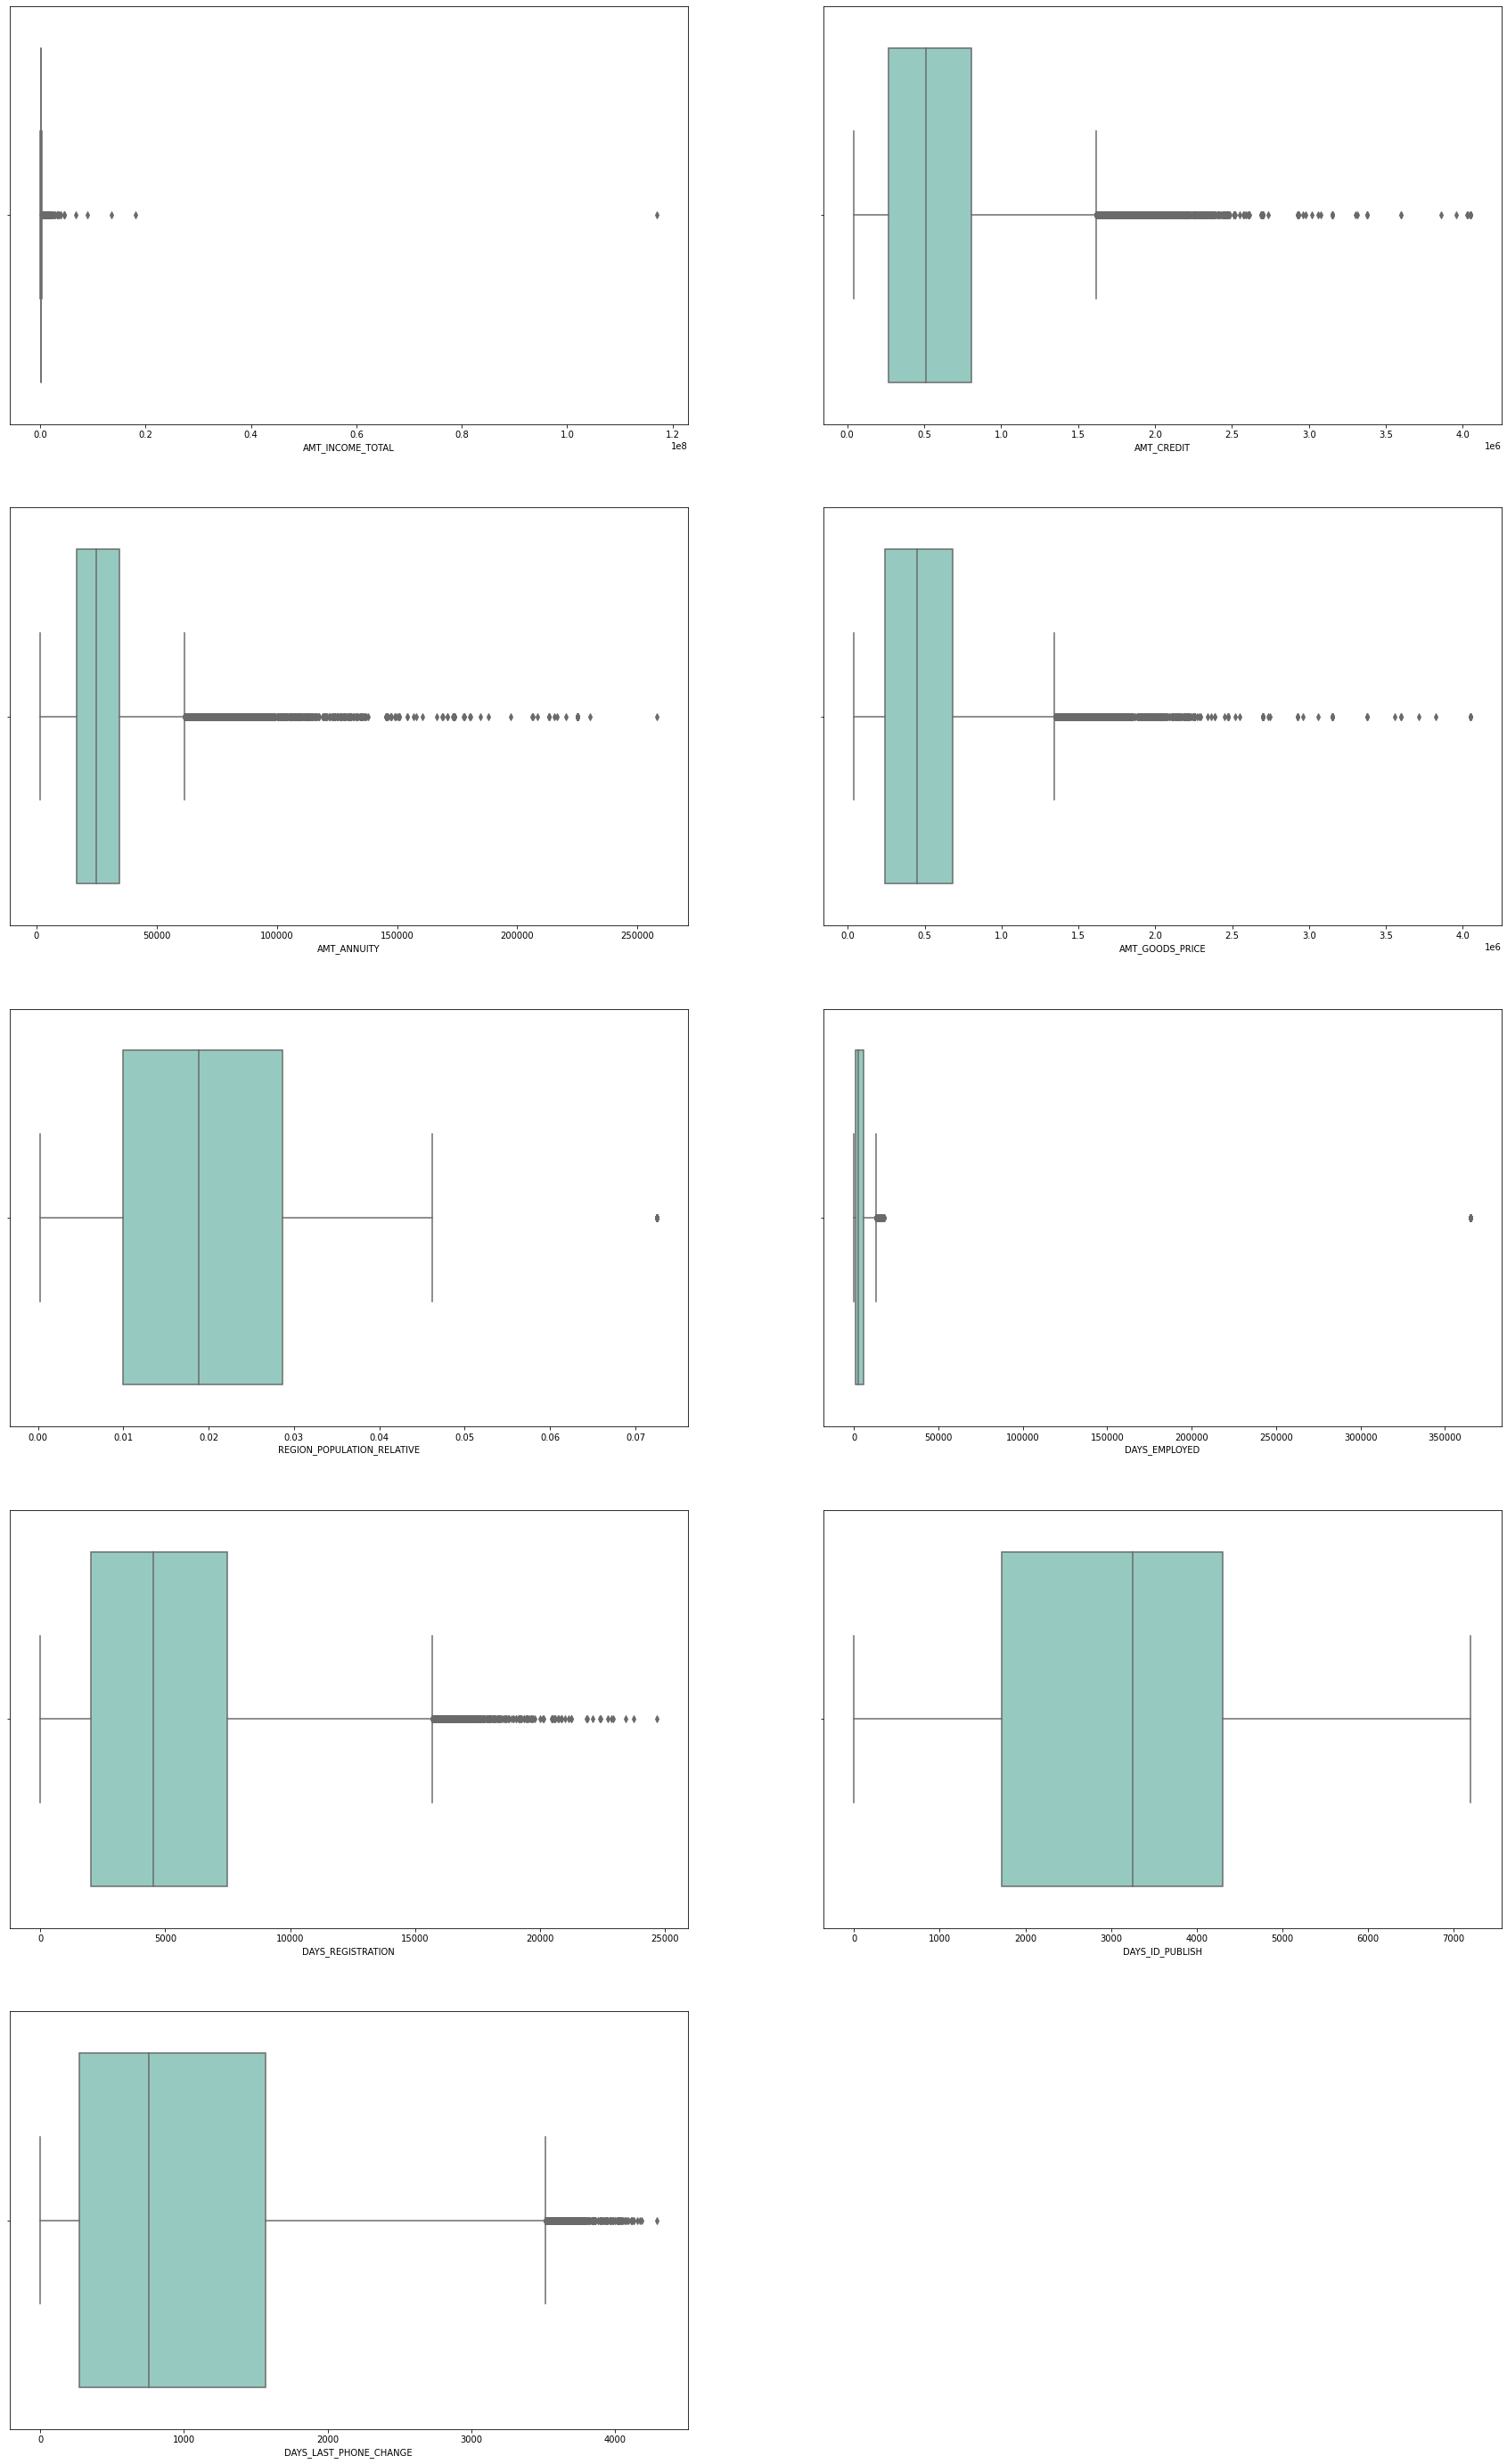

In [67]:
##Lets see boxplots

plt.figure(figsize = [30,50])
plt.title("Distribution of Non categorical numeric columns")
i=1
for col in all_non_cat_num_cols:
    plt.subplot(5,2,i)
    sns.boxplot(x = appl_df[col],palette="Set3")
    #plt.yscale('log')
    i=i+1
    
plt.show()

From the above visualisation 

1. There is some kind of a very peculiar outlier present in columns days_employeed, amt_income_total
2. DAY_ID_PUBLISH has no outliers

In [68]:
appl_df[all_non_cat_num_cols].describe()

AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count      3.074890e+05  3.074890e+05  307489.000000     3.074890e+05   
mean       1.688021e+05  5.990142e+05   27108.497364     5.383800e+05   
std        2.371300e+05  4.024878e+05   14493.554813     3.692714e+05   
min        2.565000e+04  4.500000e+04    1615.500000     4.050000e+04   
25%        1.125000e+05  2.700000e+05   16524.000000     2.385000e+05   
50%        1.476000e+05  5.135310e+05   24903.000000     4.500000e+05   
75%        2.025000e+05  8.086500e+05   34596.000000     6.795000e+05   
max        1.170000e+08  4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE  DAYS_EMPLOYED  DAYS_REGISTRATION  \
count               307489.000000  307489.000000      307489.000000   
mean                     0.020868   67703.455528        4986.124379   
std                      0.013831  139426.028759        3522.916409   
min                      0.000290       0.000000           0.000000   
25%                      0.010006     933.000000        2009.000000   
50%                      0.018850    2219.000000        4504.000000   
75%                      0.028663    5705.000000        7480.000000   
max                      0.072508  365243.000000       24672.000000   

       DAYS_ID_PUBLISH  DAYS_LAST_PHONE_CHANGE  
count    307489.000000           307489.000000  
mean       2994.201981              962.868408  
std        1509.445036              826.818004  
min           0.000000                0.000000  
25%        1720.000000              274.000000  
50%        3254.000000              757.000000  
75%        4299.000000             1570.000000  
max        7197.000000             4292.000000

In [69]:
appl_df[appl_df['AMT_INCOME_TOTAL']==appl_df['AMT_INCOME_TOTAL'].max()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
12840      114967       1         Cash loans           F            N   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
12840               Y             1       117000000.0    562491.0   

       AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
12840      26194.5         454500.0   Unaccompanied          Working   

                 NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
12840  Secondary / secondary special            Married  House / apartment   

       REGION_POPULATION_RELATIVE  DAYS_EMPLOYED  DAYS_REGISTRATION  \
12840                    0.010643            922             6762.0   

       DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
12840             3643           1               1                0   

       FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
12840                 1           0           0        Laborers   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
12840              3.0                     2                            2   

      WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
12840                    TUESDAY                       14   

       REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
12840                           0                           0   

       LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
12840                            0                       0   

       REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
12840                       0                        0   

            ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  \
12840  Business Entity Type 3                       0.0   

       DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
12840                       0.0                       0.0   

       DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  \
12840                       0.0                     0.0                0   

       FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
12840                1                0                0                0   

       FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  \
12840                0                0                0                 0   

       FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
12840                 0                 0                 0                 0   

       FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  \
12840                 0                 0                 0                 0   

       FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
12840                 0                 0                 0   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
12840                         0.0                        0.0   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
12840                         0.0                        0.0   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
12840                        0.0                         1.0   

       FLAG_OWN_REALTY_FLAG  FLAG_OWN_CAR_FLAG  AGE  
12840                     1                  0   35

From the above we can see that the max value record is clearly very large compared to data range in the quartiles. So lets drop it.

In [70]:
appl_df = appl_df[~(appl_df['AMT_INCOME_TOTAL']==appl_df['AMT_INCOME_TOTAL'].max())]

Lets see for DAYS_EMPLOYED column

In [71]:
print("max value for DAYS_EMPLOYED column:",appl_df['DAYS_EMPLOYED'].max(),"\nNumber of records having max value: ",len(appl_df[appl_df['DAYS_EMPLOYED'] == appl_df['DAYS_EMPLOYED'].max()]))
print("min value for DAYS_EMPLOYED column:",appl_df['DAYS_EMPLOYED'].min(),"\nNumber of records having min value: ",len(appl_df[appl_df['DAYS_EMPLOYED'] == appl_df['DAYS_EMPLOYED'].min()]))
      

max value for DAYS_EMPLOYED column: 365243 
Number of records having max value:  55352
min value for DAYS_EMPLOYED column: 0 
Number of records having min value:  2


* This value looks like a very high value 365243 considering for number of days employeed which is like nearly 1000 years.
* And the number of such rows are also pretty high.
* Lets consider number of records whose age is greater than days employeed in years

In [72]:
print("DAYS_EMPLOYED\n")
appl_age_less_days_emp = appl_df[appl_df.AGE<=(appl_df.DAYS_EMPLOYED/365)]
print("value counts:\n",appl_age_less_days_emp.DAYS_EMPLOYED.value_counts(),"\nShape: " ,appl_age_less_days_emp.shape)

print("\nDAYS_REGISTRATION\n")
# lets check for DAYS_REGISTRATION column also 
appl_age_less_days_reg = appl_df[appl_df.AGE<(np.round(appl_df.DAYS_REGISTRATION/365,0))]
print("value counts:\n",appl_age_less_days_reg.DAYS_REGISTRATION.value_counts(),"\nShape: " ,appl_age_less_days_reg.shape)


DAYS_EMPLOYED

value counts:
 365243    55352
Name: DAYS_EMPLOYED, dtype: int64 
Shape:  (55352, 73)

DAYS_REGISTRATION

value counts:
 Series([], Name: DAYS_REGISTRATION, dtype: int64) 
Shape:  (0, 73)


1. DAYS_REGISTRATION column has no such use case of AGE being greater than it
___

1. So from above looks like all the records which have DAYS_EMPLOYED greater than age only belong to 365243 which definetly looks like a outlier. 
2. Lets see what category of NAME_INCOME_TYPE, ORGANIZATION_TYPE, OCCUPATION_TYPE these fall under

___

In [73]:
print("NAME_INCOME_TYPE\n",appl_age_less_days_emp.NAME_INCOME_TYPE.value_counts())
print("ORGANIZATION_TYPE\n",appl_age_less_days_emp.ORGANIZATION_TYPE.value_counts())
print("OCCUPATION_TYPE\n",appl_age_less_days_emp.OCCUPATION_TYPE.value_counts())

NAME_INCOME_TYPE
 Pensioner    55352
Name: NAME_INCOME_TYPE, dtype: int64
ORGANIZATION_TYPE
 Government    55352
Name: ORGANIZATION_TYPE, dtype: int64
OCCUPATION_TYPE
 Retired           39939
Laborers          15411
Cleaning staff        2
Name: OCCUPATION_TYPE, dtype: int64


1. From above we can see that all these belong to Pensioner category.
2. So looks like all these are related to the NULL and XNA values in OCCUPATION_TYPE and ORGANIZATION_TYPE respectively which were imputed earlier.
3. So instead of NULL this is just the value was given as 365243. And even this falls under `Missing Not at Random` as they are getting Pension hence the days before the application the person started current employment is NULL which is marked as 365243
4. Lets create a new column and create bins for it based on DAYS_EMPLOYED data

In [74]:
appl_df.DAYS_EMPLOYED.describe()

count    307488.000000
mean      67703.672712
std      139426.203464
min           0.000000
25%         933.000000
50%        2219.000000
75%        5705.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [75]:
appl_df_test = appl_df[~(appl_df['DAYS_EMPLOYED']==appl_df['DAYS_EMPLOYED'].max())]
appl_df_test[appl_df_test.DAYS_EMPLOYED>5705].DAYS_EMPLOYED.head(400)
len(appl_df_test[appl_df_test.DAYS_EMPLOYED>5705].DAYS_EMPLOYED)


bins = list(np.array([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,1001])*365)
slot = ['0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','40-45','45-50','50-55','55-60','60-65','65-70','Not Employed']
appl_df['YEARS_EMPLOYED_CATEG']=pd.cut(appl_df['DAYS_EMPLOYED'],bins,labels=slot)
appl_df['YEARS_EMPLOYED_CATEG'] = appl_df['YEARS_EMPLOYED_CATEG'].astype(object)
appl_df.loc[:100,['YEARS_EMPLOYED_CATEG','DAYS_EMPLOYED']]



YEARS_EMPLOYED_CATEG  DAYS_EMPLOYED
0                    0-5            637
1                    0-5           1188
2                    0-5            225
3                   5-10           3039
4                   5-10           3038
5                    0-5           1588
6                   5-10           3130
7                    0-5            449
8           Not Employed         365243
9                   5-10           2019
10                   0-5            679
11          Not Employed         365243
12                  5-10           2717
13                  5-10           3028
14                   0-5            203
15                   0-5           1157
16                   0-5           1317
17                   0-5            191
18                 20-25           7804
19                  5-10           2038
20                 10-15           4286
21                   0-5           1652
22                 10-15           4306
23          Not Employed         365243
24                   0-5            746
25                  5-10           3494
26                  5-10           2628
27                   0-5           1234
28                   0-5           1796
29                   0-5           1010
30                  5-10           2668
31                   0-5           1104
32                 10-15           4404
33                  5-10           2060
34                 10-15           4585
35                   0-5           1275
36                   0-5            768
37                   0-5           1288
38          Not Employed         365243
39                   0-5           1761
40                   0-5           1262
41                   0-5            475
42                  5-10           3597
43          Not Employed         365243
44                   0-5            758
45                   0-5            895
46          Not Employed         365243
47                 10-15           5332
48                 10-15           4411
49                 25-30           9523
50                   0-5           1176
51                 15-20           6977
52                   0-5            778
53                   0-5           1392
54          Not Employed         365243
55                 10-15           4106
56          Not Employed         365243
57                  5-10           2351
58                   0-5           1743
59                  5-10           2091
60                  5-10           2446
61                   0-5           1324
62          Not Employed         365243
63                 10-15           3720
64                  5-10           2546
65                   0-5            579
66                 10-15           4856
67                   0-5            114
68                  5-10           3154
69                   0-5            121
70                  5-10           2844
71                   0-5            892
72                   0-5           1156
73                  5-10           2224
74                  5-10           2492
75                  5-10           2011
76                 10-15           4066
77                  5-10           2811
78                   0-5            721
79          Not Employed         365243
80                   0-5           1434
81          Not Employed         365243
82                  5-10           2442
83                   0-5            924
84          Not Employed         365243
85                   0-5           1094
86                   0-5            969
87                   0-5            192
88                   0-5           1694
89                   0-5            862
90                 20-25           8862
91                   0-5           1415
92                   0-5            741
93                   0-5           1249
94                  5-10           2015
95                 20-25           7980
96                   0-5            693
97                   0-5            367
98                 15-20           6737
99  

Lets drop DAYS_EMPLOYED column

In [76]:
appl_df.drop('DAYS_EMPLOYED',axis=1,inplace=True)

______

**`Handled outliers in NUMBERICAL NON - CATEG Columns`**

___

### Analysis of the columns 

**Univariate Analysis**

* Lets see how target column is defined
`Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)`



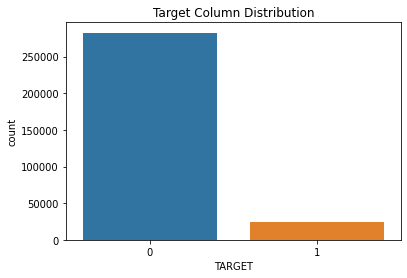

In [77]:
#appl_df.TARGET.plot.hist()
sns.countplot(data =appl_df, x = 'TARGET')
plt.title('Target Column Distribution')
plt.xlabel("TARGET")
plt.show()

1. From the above graph there is huge data imbalance. This may cause alterations in finding the correlations or analysing them.
2. **Hence lets plot all the analysis graphs with log scale for target column**

____

* `Distribution of categorical object columns`

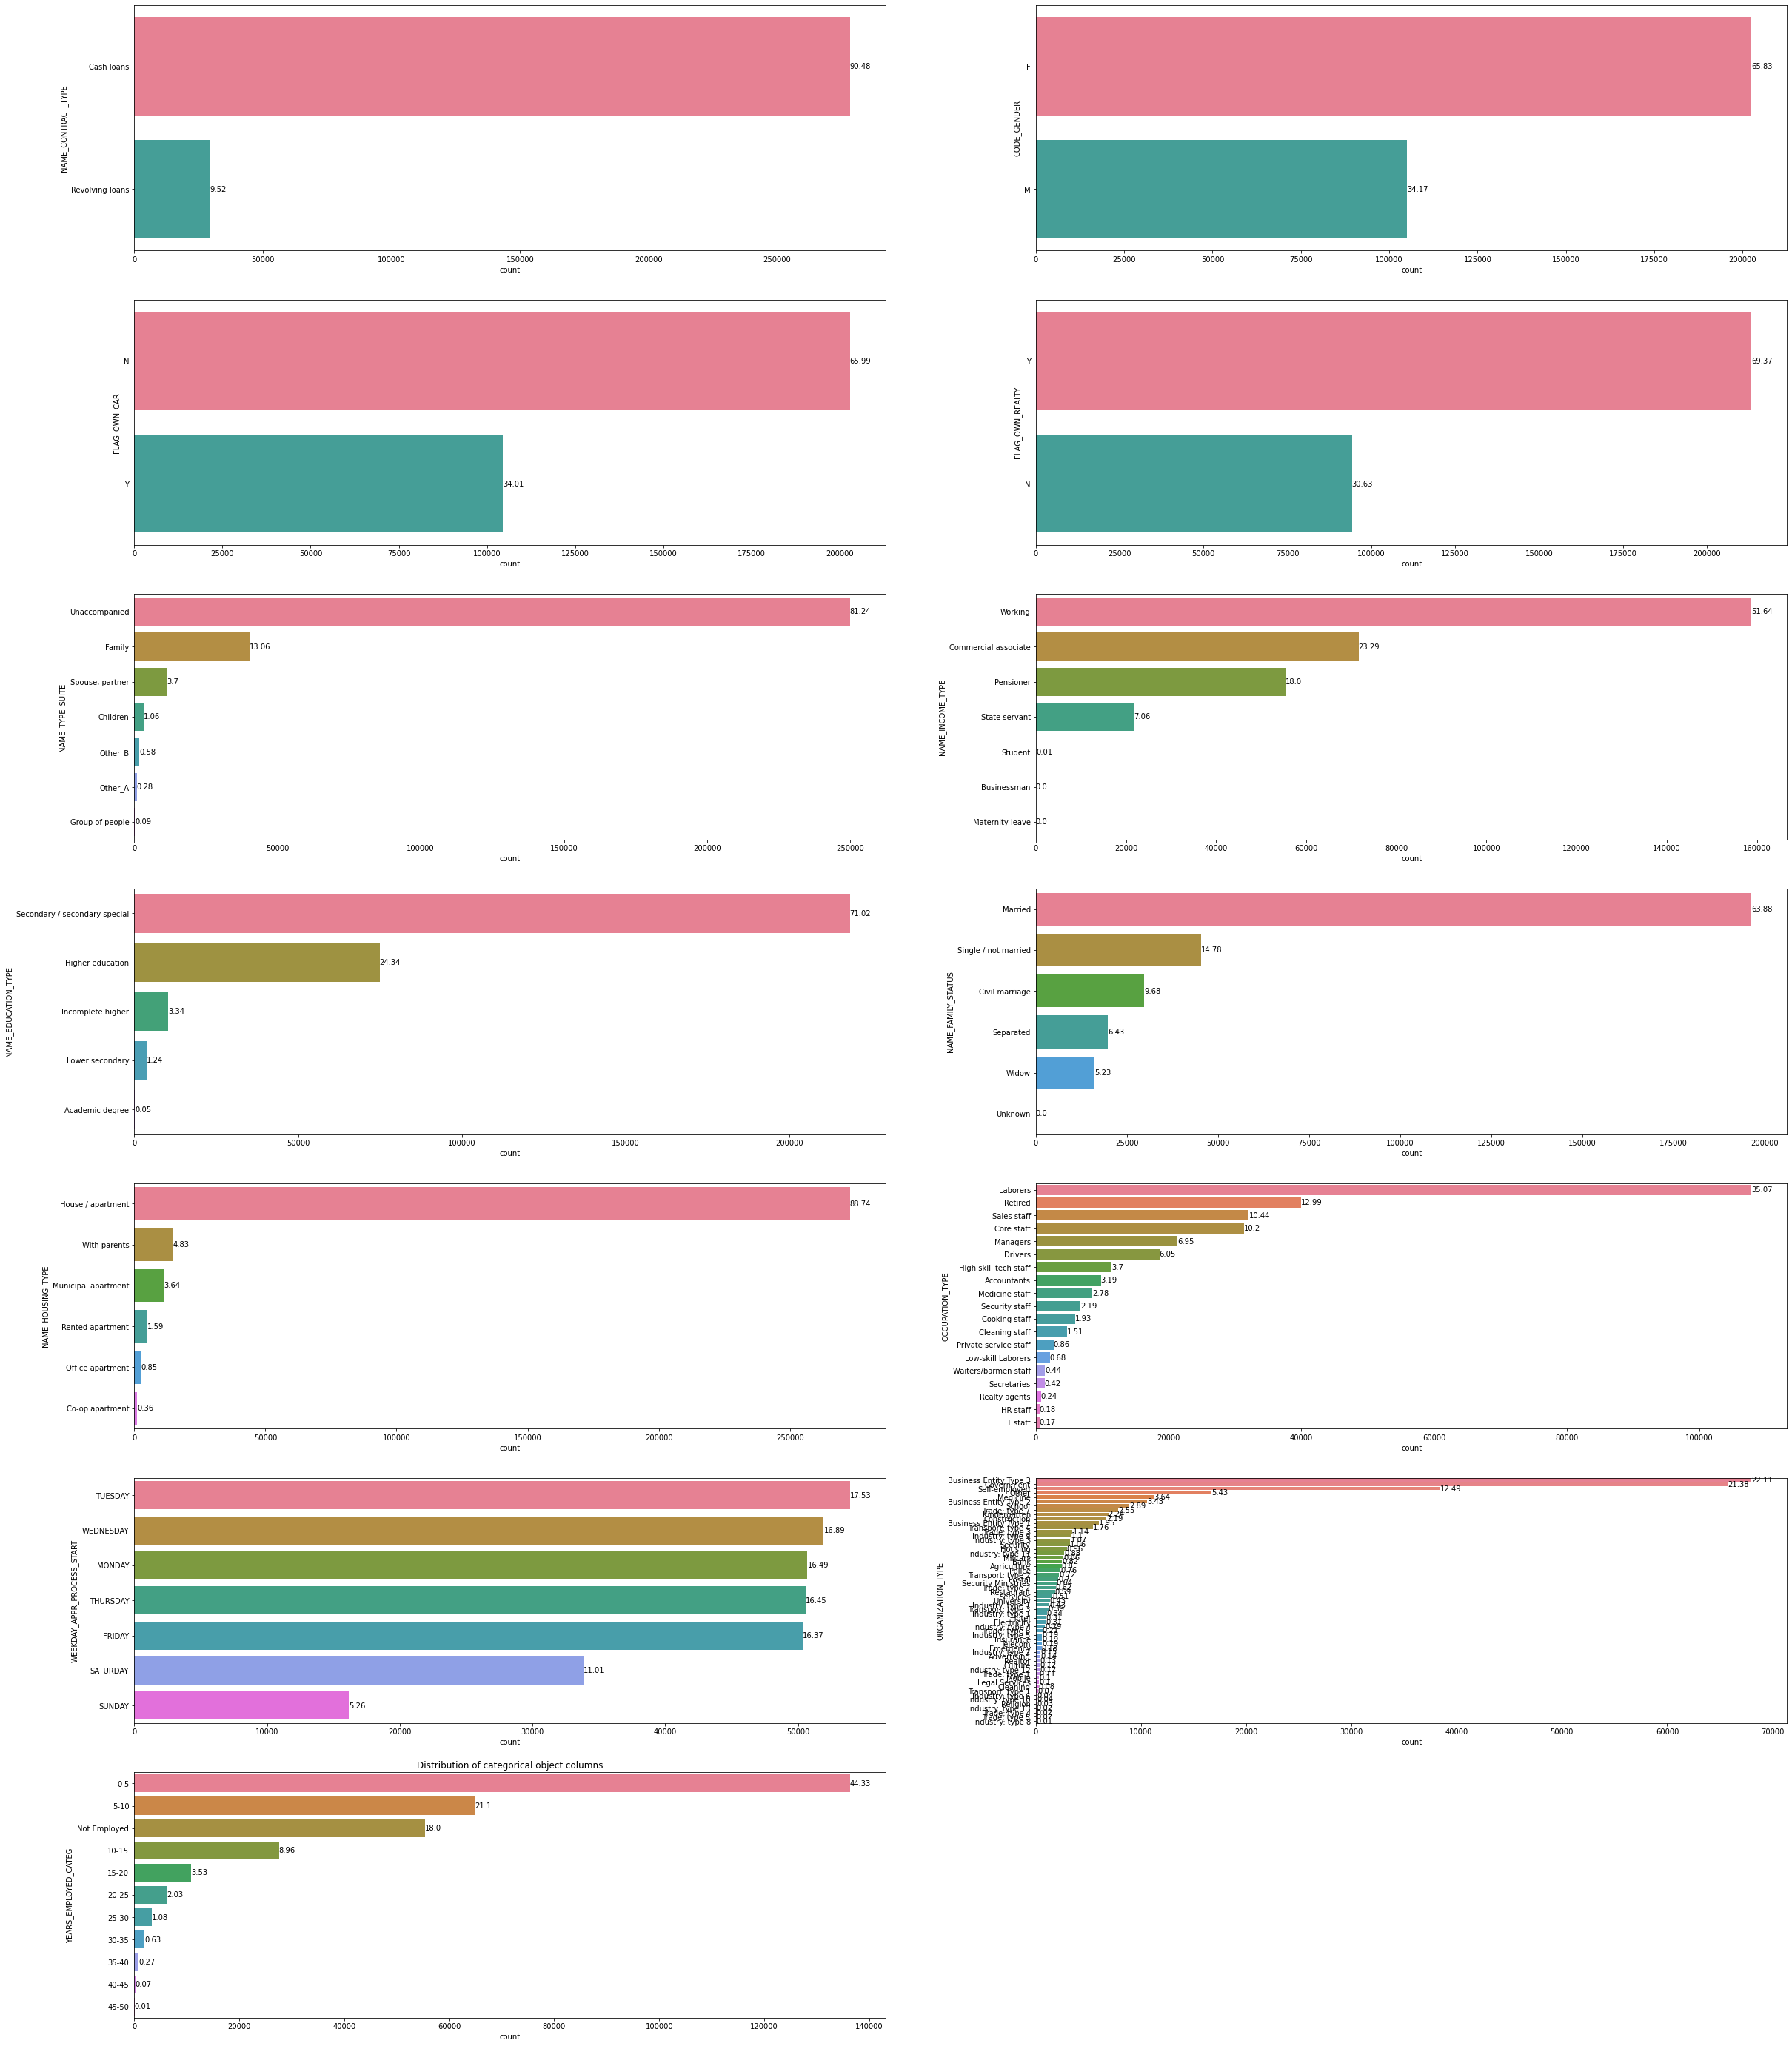

In [78]:
all_obj_cats = appl_df.select_dtypes(include='object')
plt.figure(figsize = [40,50])

i=1
for col in all_obj_cats:
    plt.subplot(7,2,i)
    ax = sns.countplot(y=appl_df[col],
                  palette="husl",
                  order=appl_df[col].value_counts().index[:len(appl_df[col].value_counts())]
              
                 )
    #plt.xscale('log')
    abs_values = np.round(100*(appl_df[col].value_counts().values/appl_df.shape[0]),2)
    ax.bar_label(container=ax.containers[0], labels=abs_values)
    #plt.xscale('log')
    
    i=i+1
plt.title("Distribution of categorical object columns")   
plt.show()

From the above graphs we can get a clear visualisation of categorical columns of object type 

1. Cash loans are taken more than Revolving loans constituting to 90%
2. Around 65% of the loans are taken by Females.
3. 65% of the people who took loan own a car i.e majority own a car.
4. 69% of the people who took loan own a house/flat i.e majority own a house/flat.
5. Majority of the loans are taken by people who have come unaccompained while applying for loan. It constitutes around 81%
6. Most of the loans are taken by people who have income via "working" category, followed by "Commercial associate"
7. Around 88% loans are taken by ppl who have highest education as "Secondary/Secondary special" 
8. 63% of loans are taken by married ppl.
9. Majority of loans are taken by ppl who stay in a house/apartment.
10. Ppl who have occupation_type as Labroures have taken majority loans which is around 35%.
11. Ppl who work in Business Entity Type 3 as organisation have taken major loan of 22%, closely followed by governmet.
12. The least percentage of applications for loan are applied on Sunday. This is understandable as most Sundays are holidays for almost all banks.
13. Majority loans are taken by people who have been 0-5 years in current employment when application started.

______


`Lets see for Categorical Numeric Columns`

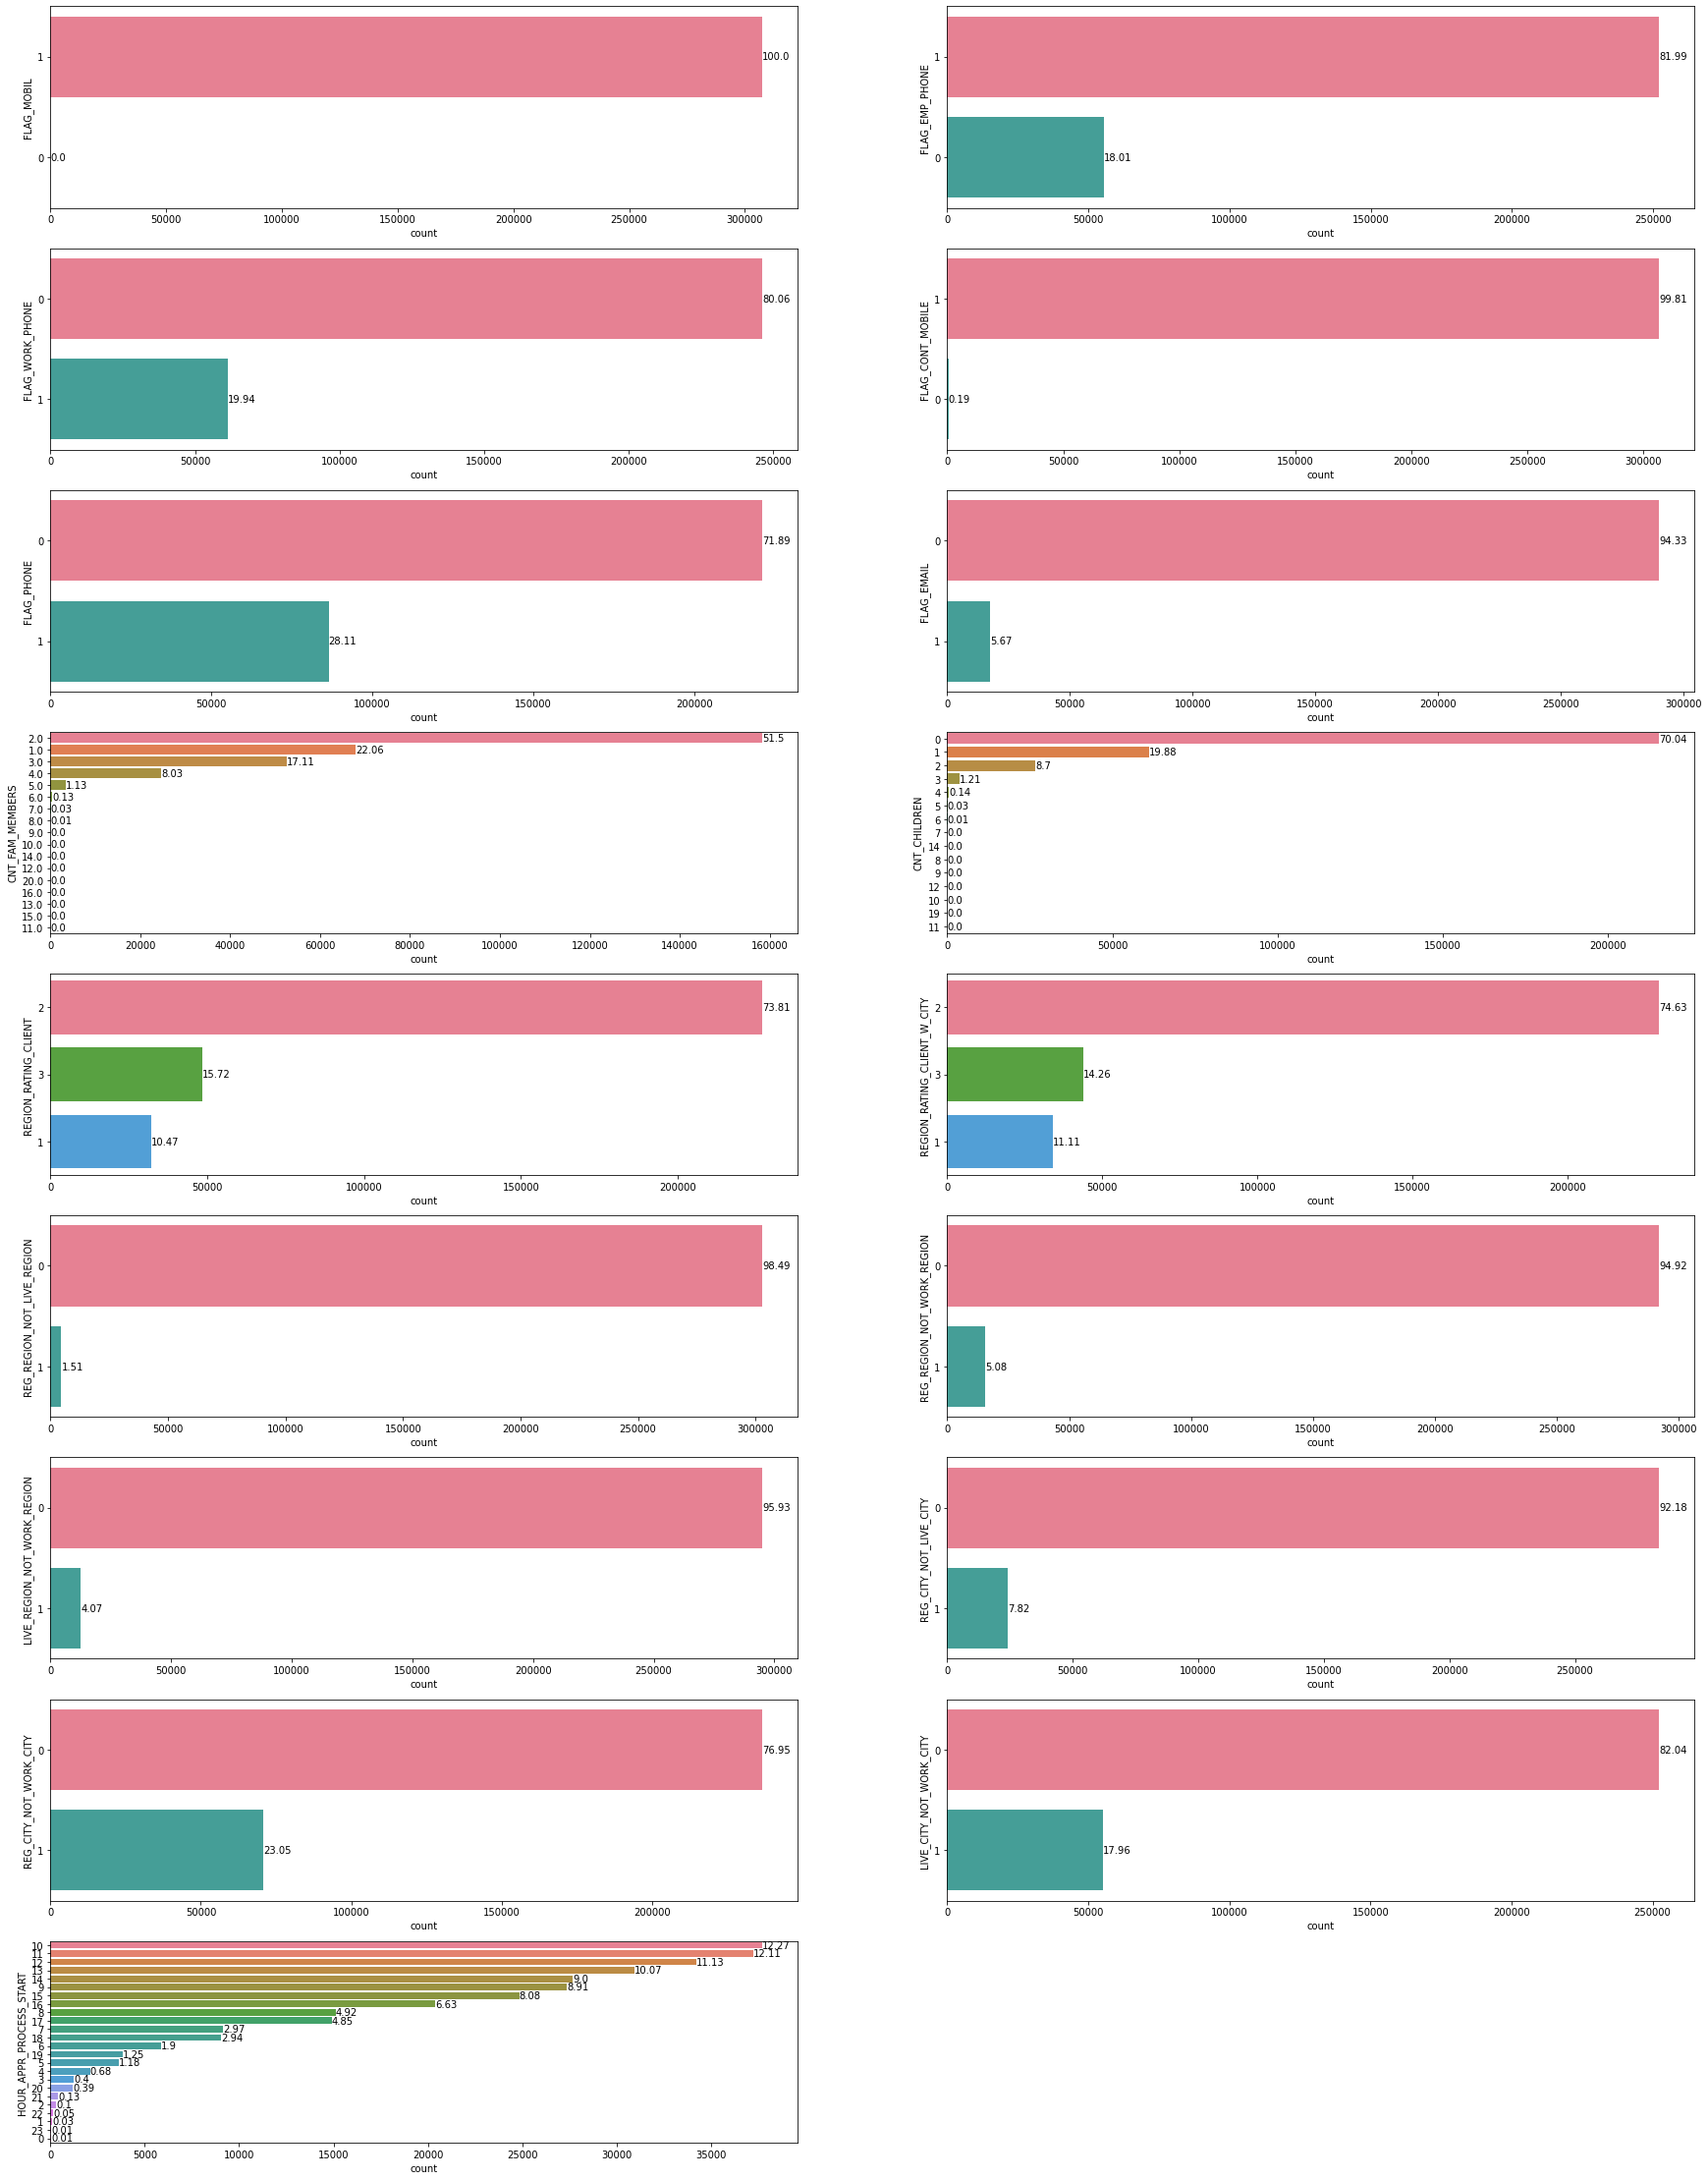

In [79]:
plt.figure(figsize = [30,40])
plt.title("Distribution of categorical numeric columns")
i=1
for col in all_num_cats:
    plt.subplot(9,2,i)
    ax = sns.countplot(y=appl_df[col],
                  palette="husl",
                  order=appl_df[col].value_counts().index[:len(appl_df[col].value_counts())]
              
                 )
    #plt.xscale('log')
    abs_values = np.round(100*(appl_df[col].value_counts().values/appl_df.shape[0]),2)#labelling percentages
    ax.bar_label(container=ax.containers[0], labels=abs_values)
    #plt.xscale('log')
    
    i=i+1
    
plt.show()


From the above graphs we can get a clear visualisation of categorical columns of numeric type 

1. 99% of loan applicants have provided mobile number.
2. 80% of loan applicants have provided their work phone number.
3. 99% of loan applicants provided mobile number was reachable.
4. 94% of people provided their email while applying for loan.
5. Around 51% of people who applied for loan have 2 family members which is the majority, next highest category is applicants with 1 family member.
6. And 70% of applicants have no children.
6. Most of the applicants i.e 73% live in region which is rated as 2 among 1 to 3.
7. Around 98% of client's contact address matches with permanent address.
8. 94% of client's work address matches with their permanent address.
9. Around 4% of client's contact address doesn't match their work address.
11. The least number of applications were processed during 21:00 - 23:00 and also during lunch time 1:00 and 2:00 which is like lunch hours.


____

`Visualising age column`

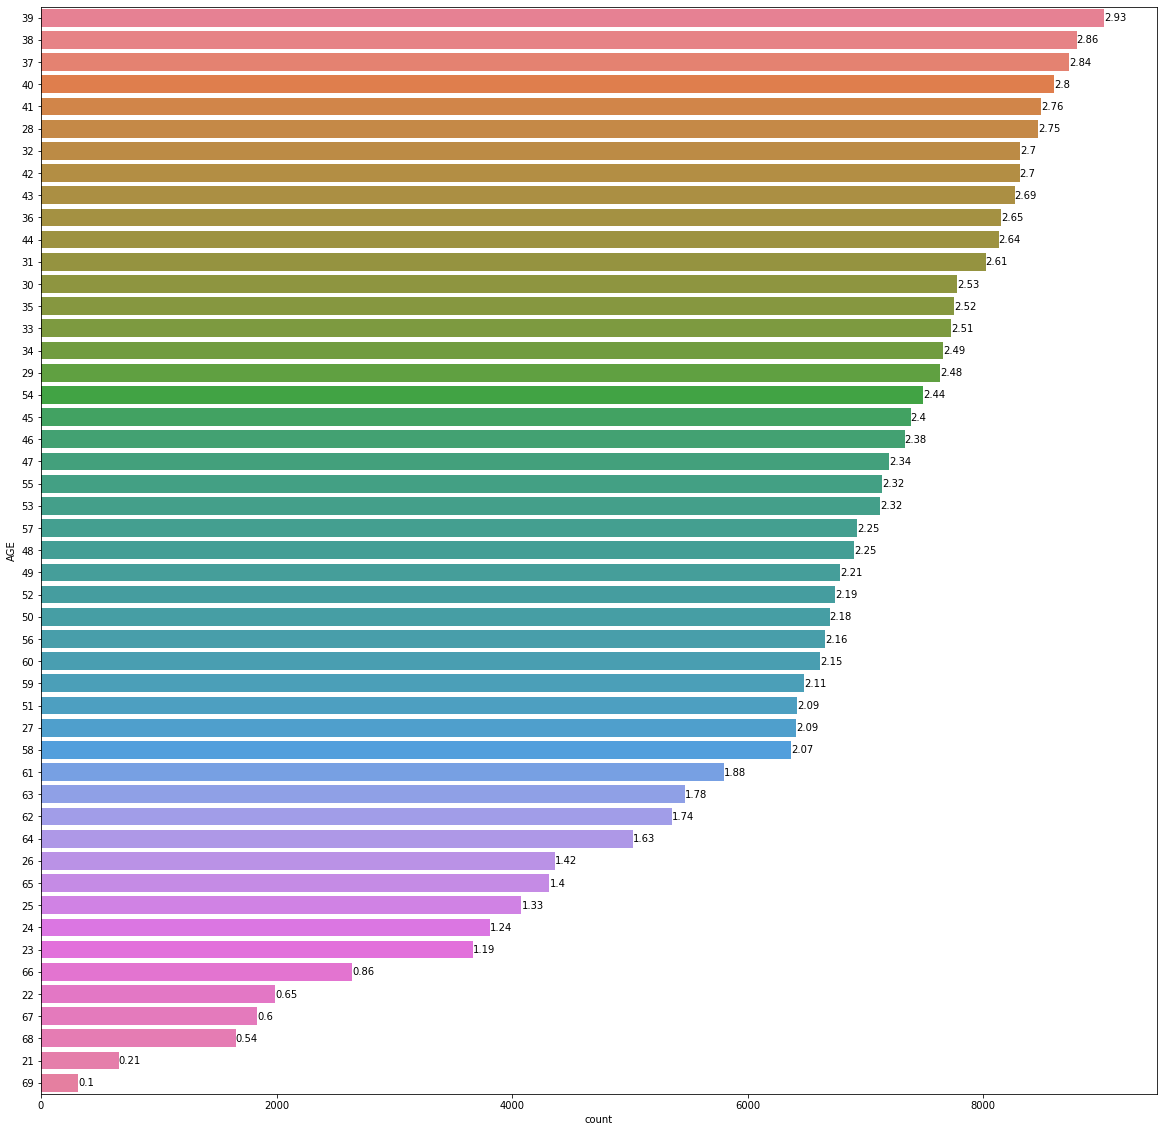

In [80]:
plt.figure(figsize=[20,20])
ax = sns.countplot(y=appl_df['AGE'],
                  palette="husl",
                  order=appl_df['AGE'].value_counts().index[:len(appl_df['AGE'].value_counts())])
abs_values = np.round(100*(appl_df['AGE'].value_counts().values/appl_df.shape[0]),2)#labelling percentages
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.show()

**In order to see which category has taken more loans lets create a new column age category**

In [81]:
bins = [20,25,30,35,40,45,50,55,60,65,70]
slot = ['20-25','25-30','30-35','35-40','40-45','45-50','50-55','55-60','60-65','65-70']

appl_df['AGE_CATEG']=pd.cut(appl_df['AGE'],bins,labels=slot)
appl_df['AGE_CATEG'] = appl_df['AGE_CATEG'].astype(object)

Lets visualise age category

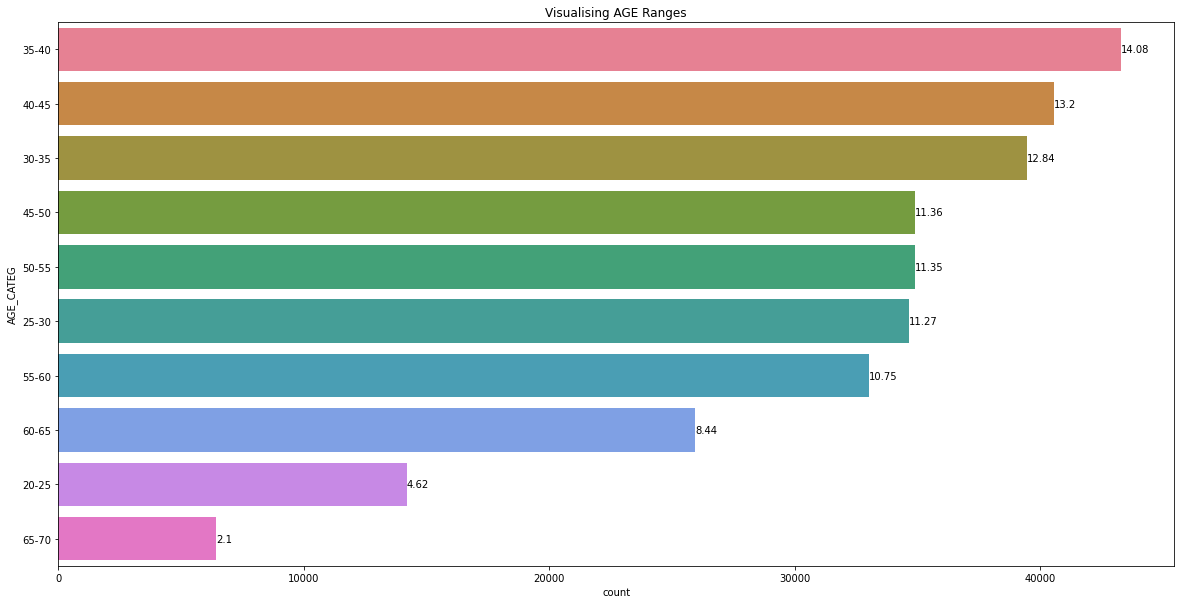

In [82]:
plt.figure(figsize=[20,10])
plt.title('Visualising AGE Ranges')
ax = sns.countplot(y=appl_df['AGE_CATEG'],
                  palette="husl",
                  order=appl_df['AGE_CATEG'].value_counts().index[:len(appl_df['AGE_CATEG'].value_counts())])
abs_values = np.round(100*(appl_df['AGE_CATEG'].value_counts().values/appl_df.shape[0]),2)#labelling percentages
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.show()

From the above visualisation:
1. Most of the loans are taken by applicants whose age is in range 30-45. With the most being of age group 35-40.
2. Least loan applicants belong to age group 65-70 constituting only 2.1%

_____

Lets see the vistualisation for numerical variables which are not categorical 

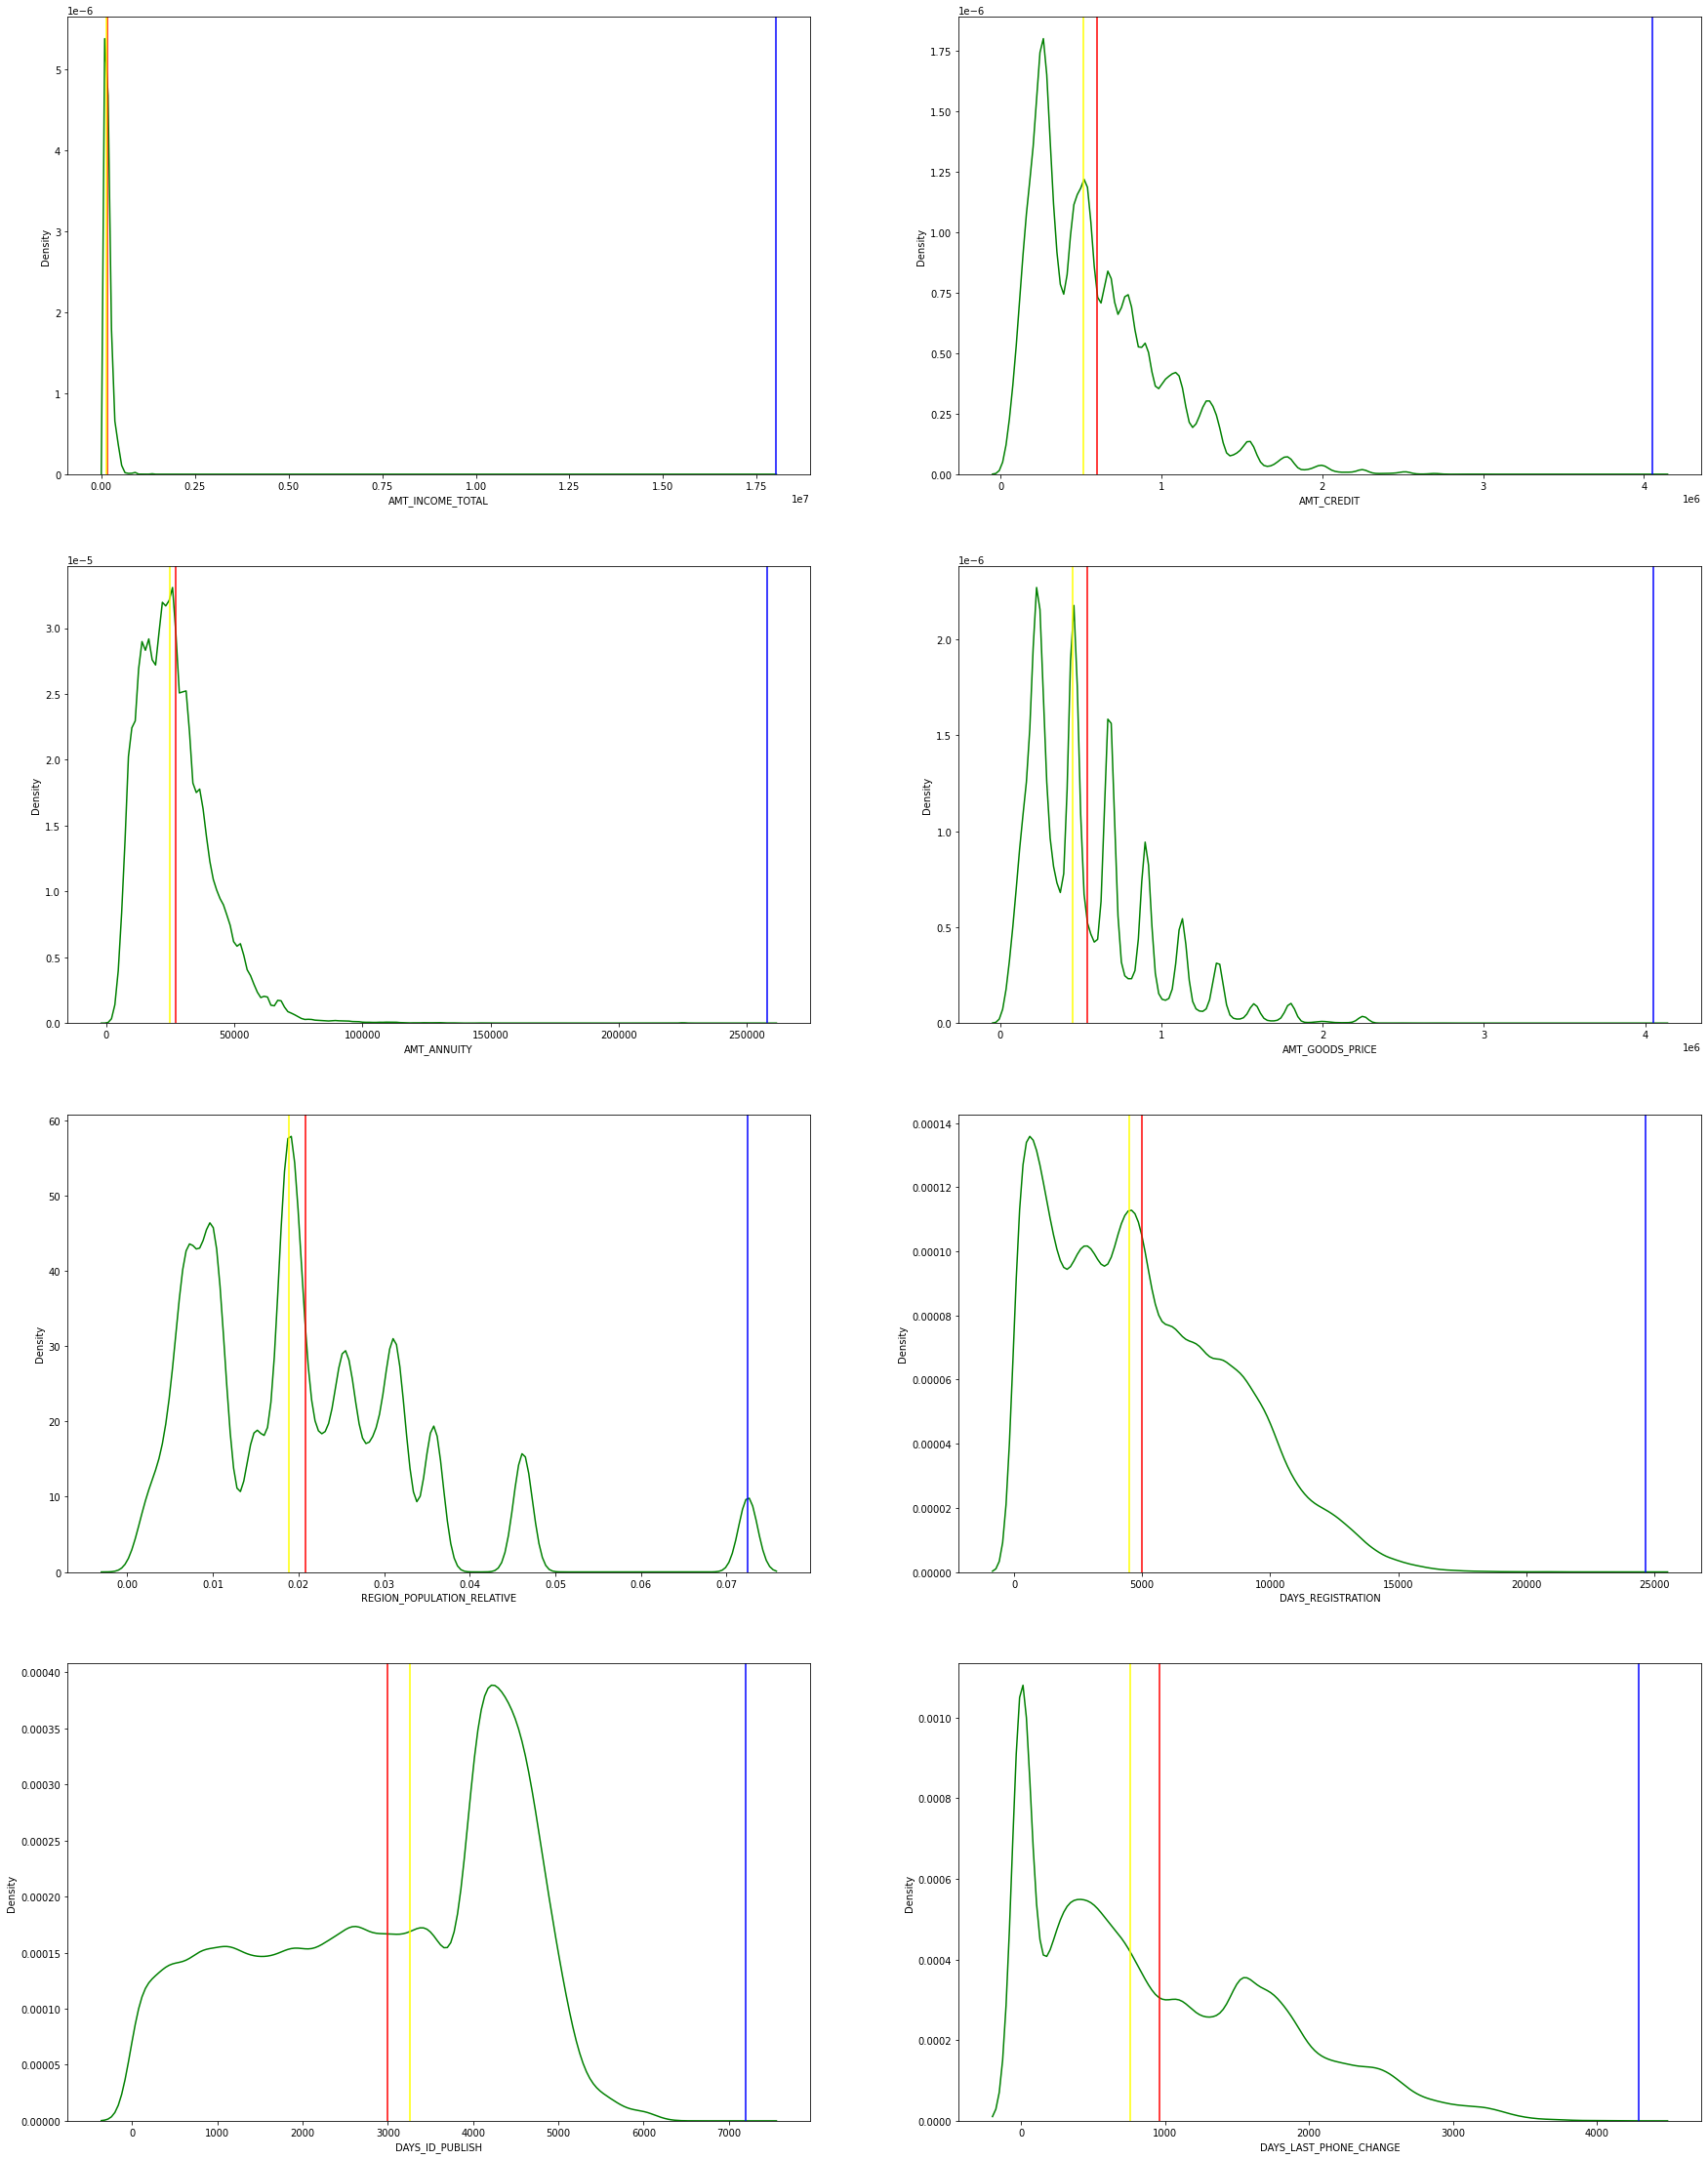

In [83]:
# Lets recalculate as we have dropped some above
all_num_cols = appl_df.select_dtypes(exclude='object')
all_non_cat_num_cols = [col for col in all_num_cols if (col not in all_num_cats) & (col not in flag_doc_cols) & (col not in cred_beaur_cols) & (col not in soc_cir_cols) & (col not in ['FLAG_OWN_REALTY_FLAG','FLAG_OWN_CAR_FLAG', 'TARGET','SK_ID_CURR','AGE'])]

plt.figure(figsize = [30,50])
plt.title("Distribution of Non categorical numeric columns")
i=1
for col in all_non_cat_num_cols:
    plt.subplot(5,2,i)
    sns.kdeplot(x = appl_df[col],color='green')
    plt.axvline(appl_df[col].max(),color='blue')
    plt.axvline(appl_df[col].mean(), color='red')
    plt.axvline(appl_df[col].median(), color='yellow')
    #plt.yscale('log')
    plt.annotate(text = appl_df[col].max(),xy=(appl_df[appl_df[col] == appl_df[col].max()][col].index[0],appl_df[col].max()))
    #plt.text(y=appl_df[appl_df[col] == appl_df[col].median()][col].index[0], x=appl_df[col].median(),s=appl_df[col].median(),transform=ax.transAxes)
    i=i+1
    
plt.show()

From the above visualisations:
1. Majority of clients have their total income around the mean. 
2. The highest frequency of credit amount lies within 25th percentile of applicants.
3. The column AMT_ANNUITY has approx. max frequency at its mean i.e Majority of the people are granted average loan+interest.
4. The highest frequency of price of goods lies within 25th percentile of applicants. The next peak followed around with median value. And as the price of goods increases, the applicants frequency also with these prices decrease.


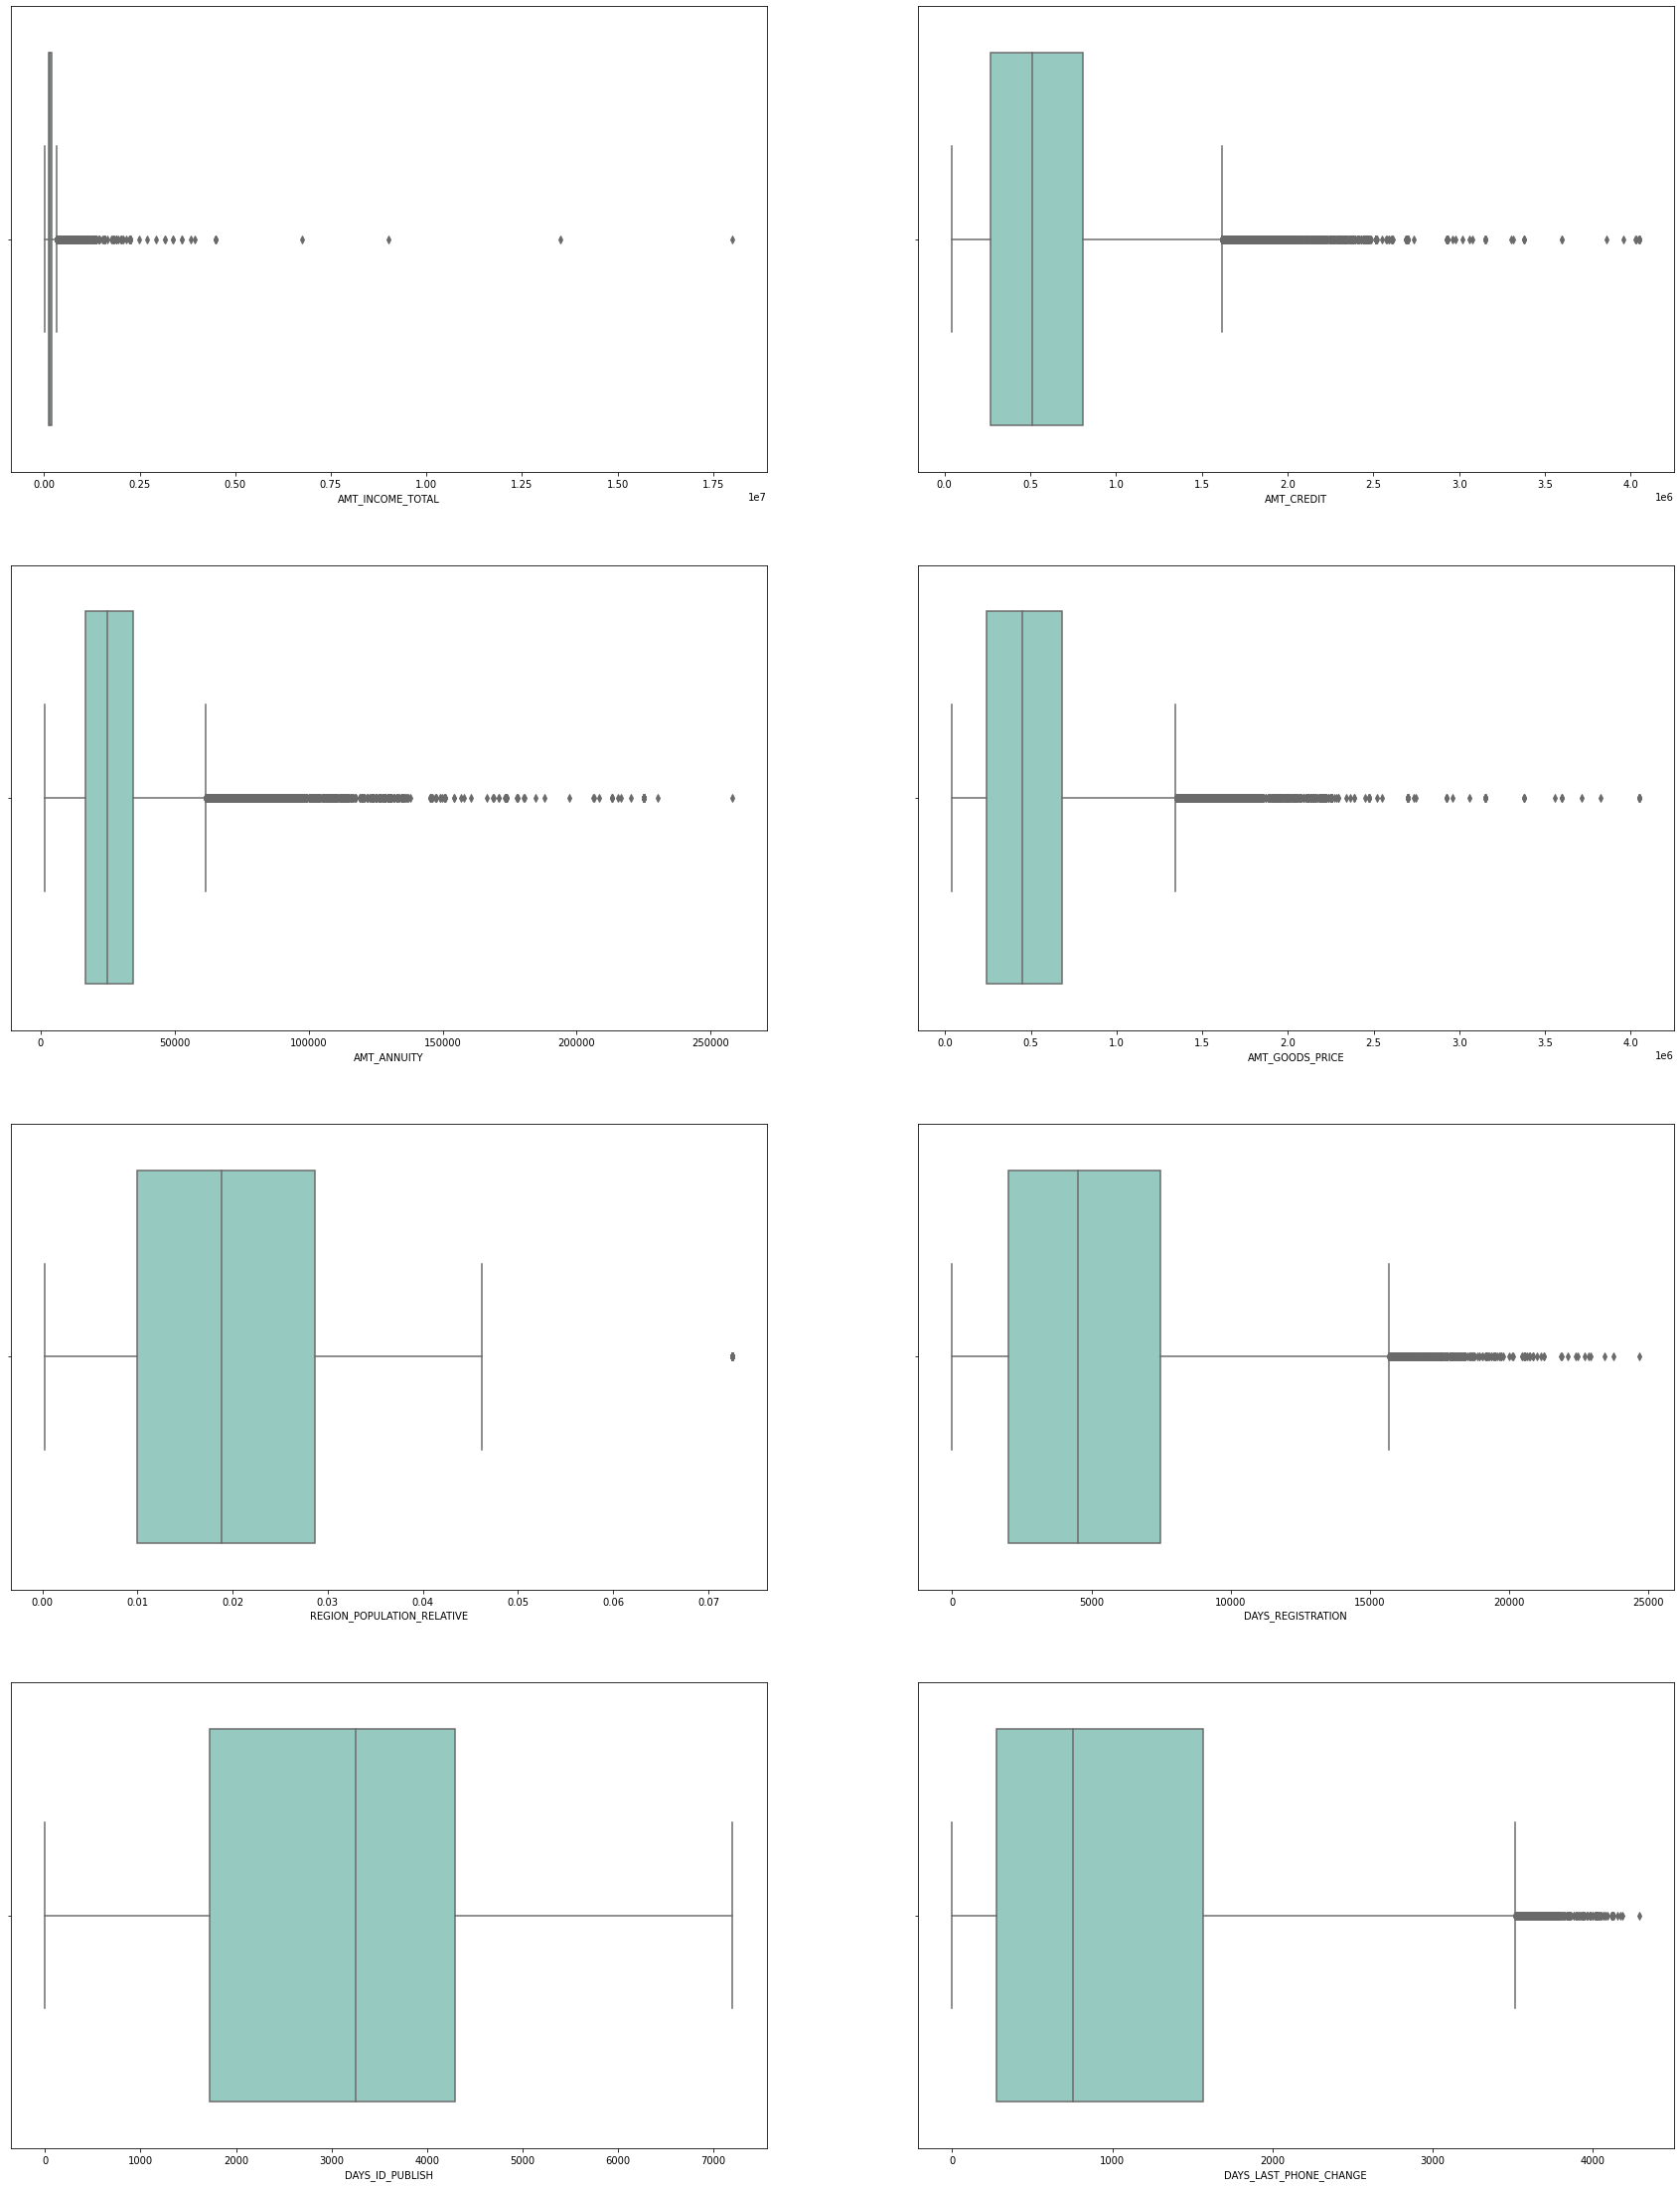

In [84]:
##Lets also see boxplots

plt.figure(figsize = [30,50])
plt.title("Distribution of Non categorical numeric columns")
i=1
for col in all_non_cat_num_cols:
    plt.subplot(5,2,i)
    sns.boxplot(x = appl_df[col],palette="Set3")
    #plt.yscale('log')
    i=i+1
    
plt.show()

`Univariate Analysis Completed `

_____

## Bi/Multi Variate Analysis

`NAME_CONTRACT_TYPE` vs `TARGET`

Target variable - (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)

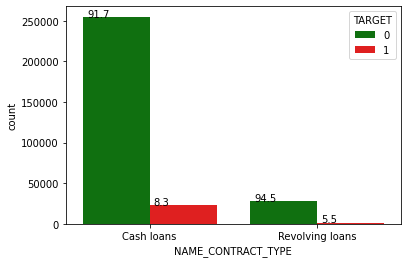

In [85]:
ax = sns.countplot("NAME_CONTRACT_TYPE",hue="TARGET",data=appl_df,palette=["g","r"])
#plt.yscale('log')

# Lets see for each category how much percentage are defaulters and repayers

appl_group = appl_df.groupby(by='NAME_CONTRACT_TYPE').TARGET.sum()
cash = np.round(100*(appl_group[0]/appl_df[appl_df.NAME_CONTRACT_TYPE=='Cash loans'].shape[0]),1)
revol = np.round(100*(appl_group[1]/appl_df[appl_df.NAME_CONTRACT_TYPE=='Revolving loans'].shape[0]),1)
abs_values = [100-cash,100-revol,cash,revol]

for p,v in zip(ax.patches,abs_values):
    ax.annotate('{:.1f}'.format(v), (p.get_x()+0.025, p.get_height()+0.01))



plt.show()

`Lets Generalize the above code`

In [86]:
def cntplt(col):
    
    plt.figure(figsize=[12,10])
    ax = sns.countplot(col,hue="TARGET",data=appl_df,palette=["g","r"],)
    plt.xticks(rotation=90)
    plt.yscale('log')

    # Lets see out of each category how much percentage are defaulters and repayers
    appl_group = appl_df.groupby(by=col).TARGET.sum()
    lis = []
    i=0
    for c in appl_group.index:        
        var = np.round(100*(appl_group[i]/appl_df[appl_df[col]==c].shape[0]),1)
        lis.append(var)
        i=i+1
    abs_values=lis.copy()
    lis = list(100-np.array(lis))
    for l in abs_values:
        lis.append(l)
    for p,v in zip(ax.patches,lis):
        ax.annotate('{:.1f}'.format(v), (p.get_x()+0.025, p.get_height()+0.1))


**Lets Now visualise of how object categorical columns w.r.t target column**

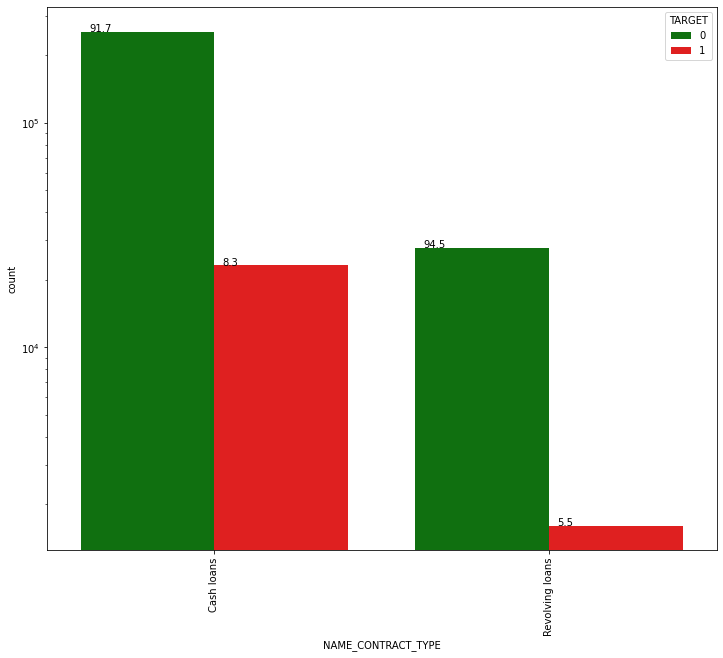

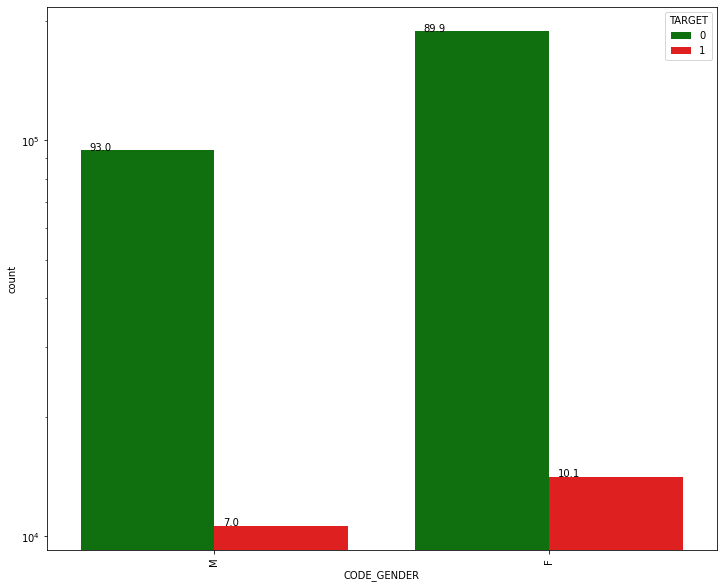

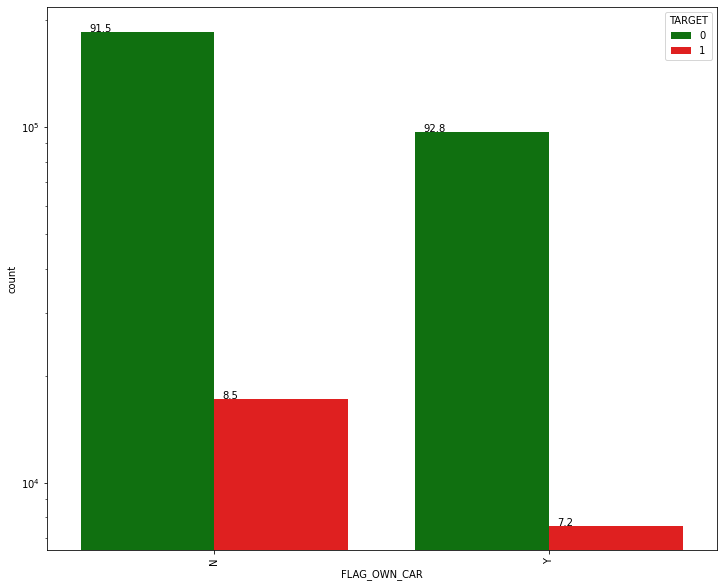

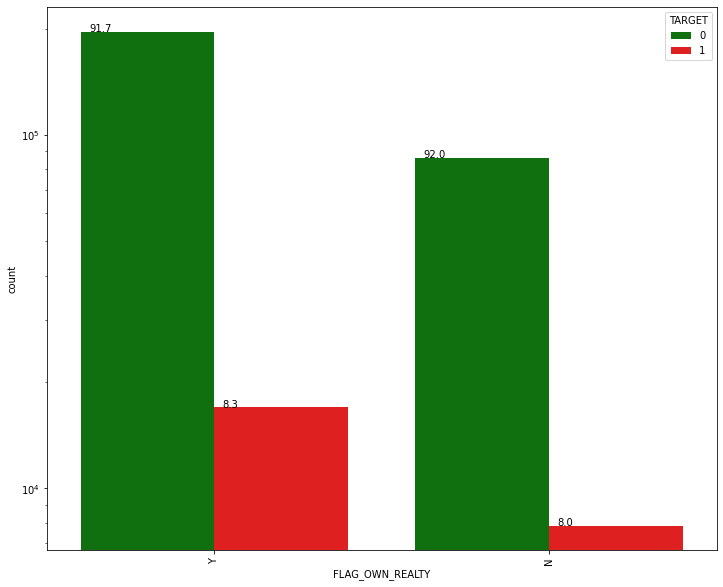

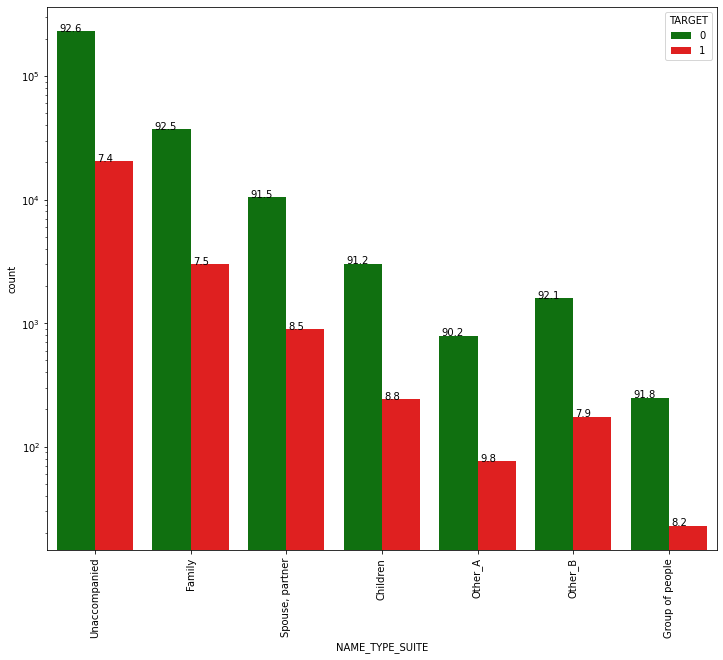

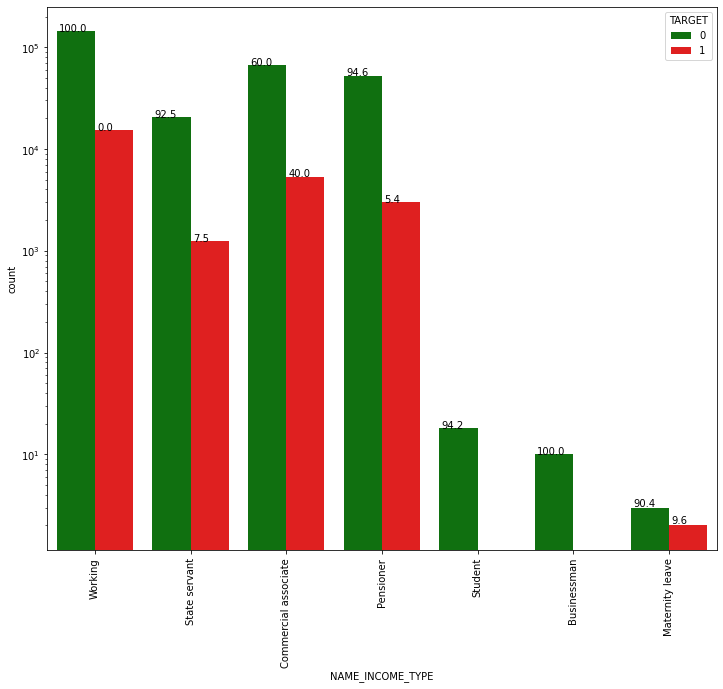

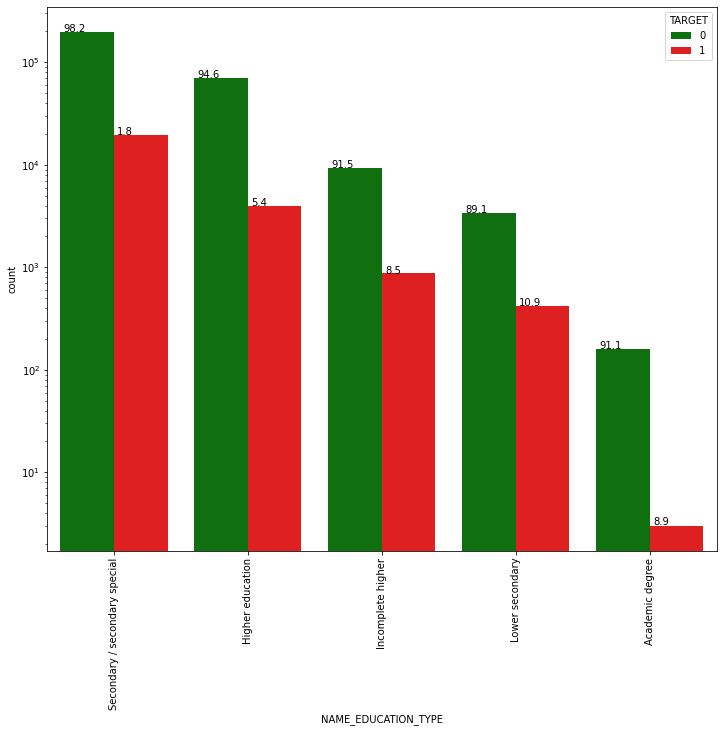

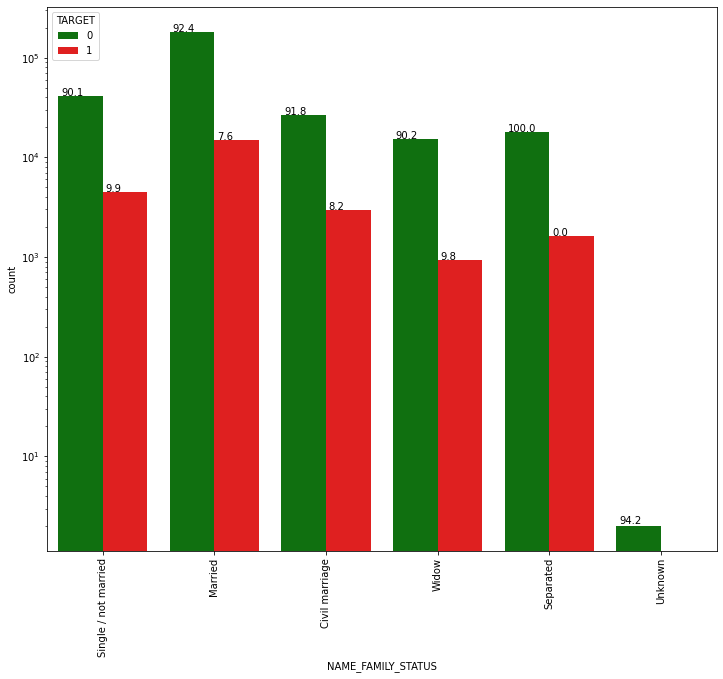

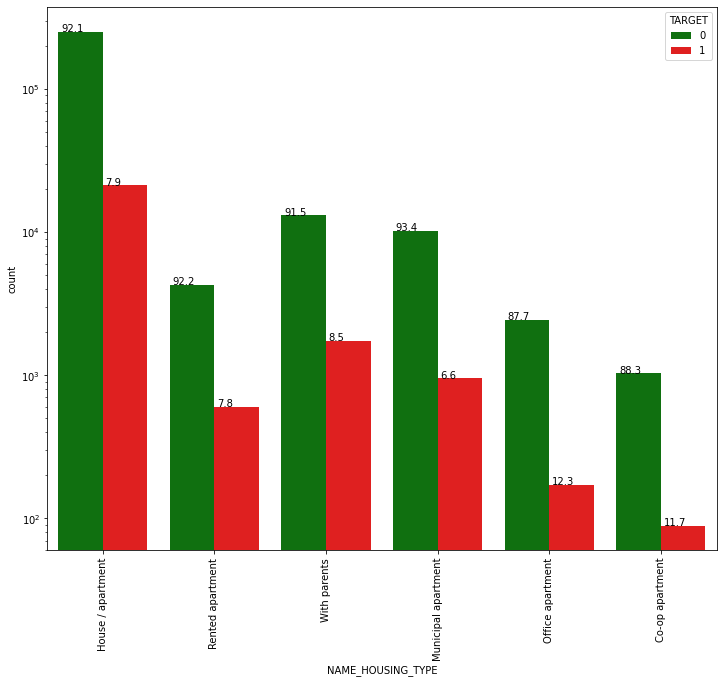

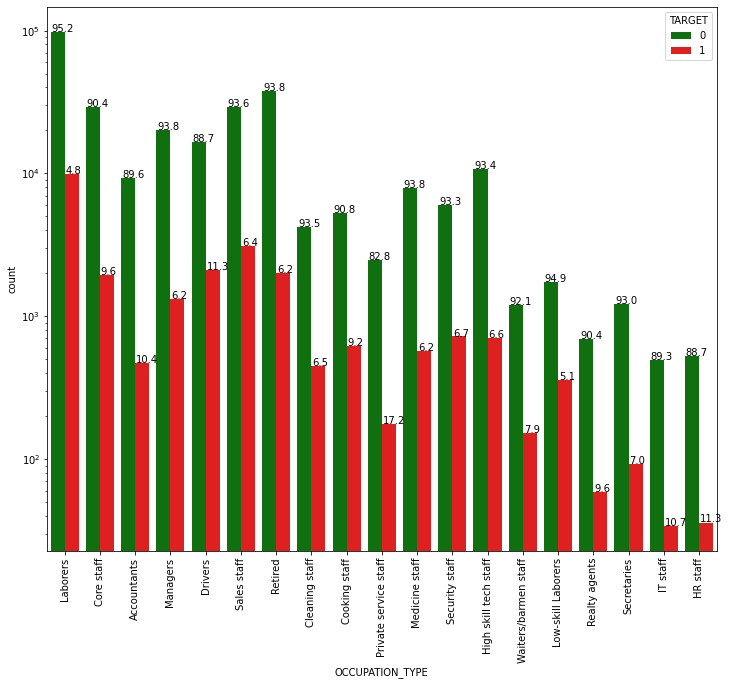

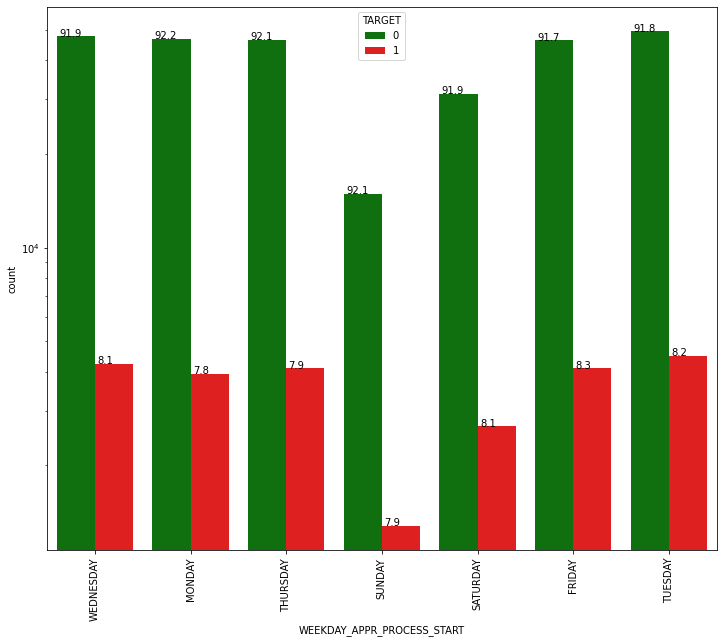

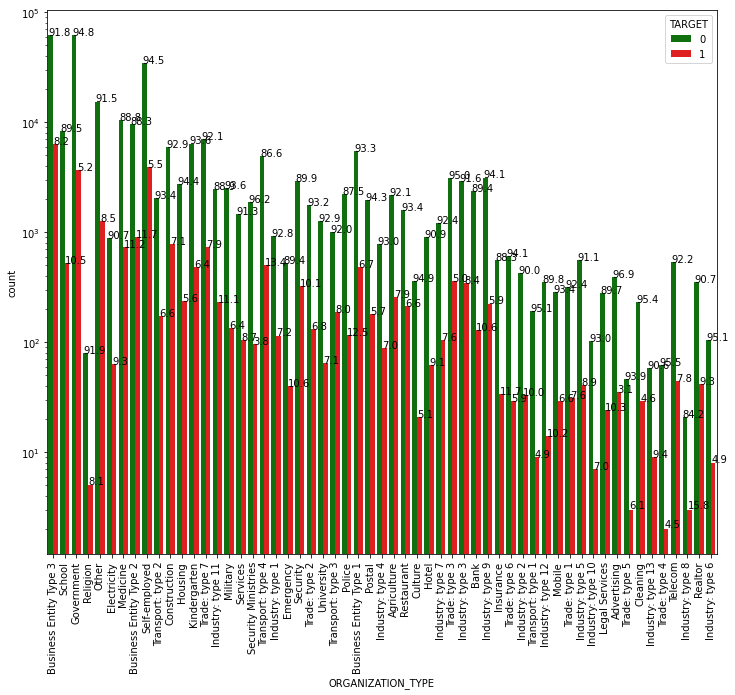

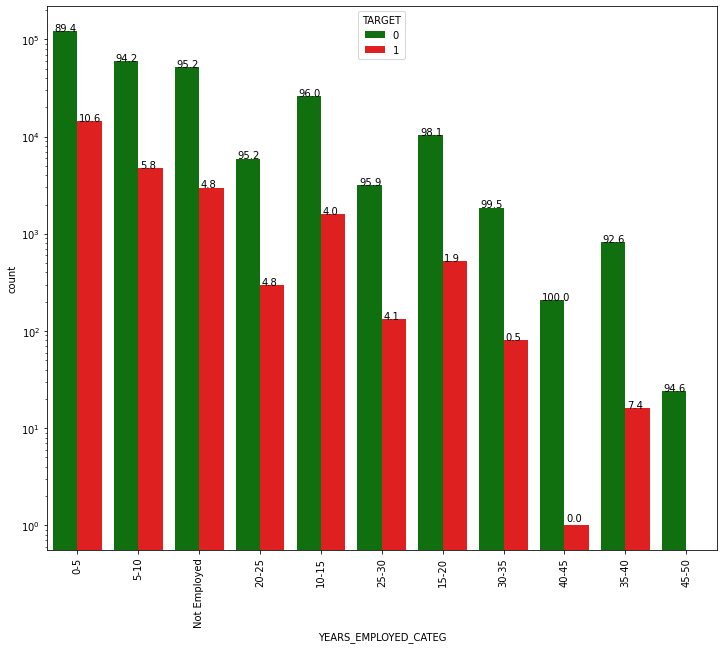

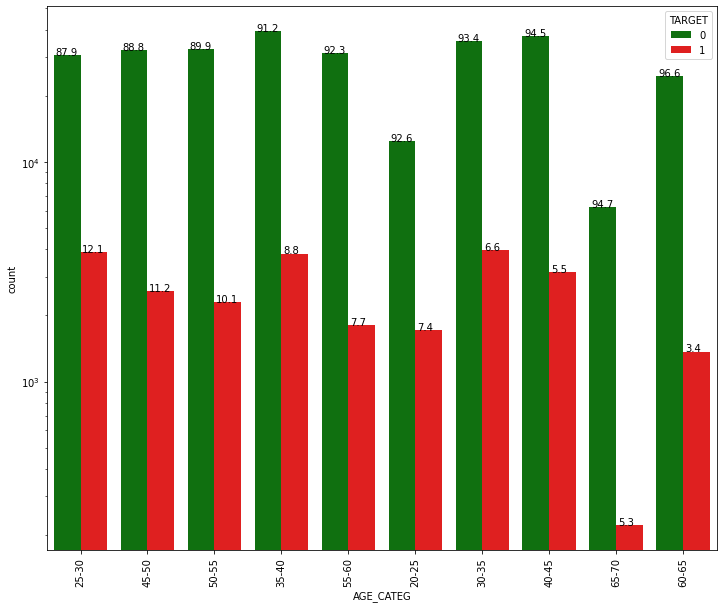

In [87]:
all_obj_cat_cols = appl_df.select_dtypes(include='object')
for col in all_obj_cat_cols:
    cntplt(col)
plt.show()
    

From the above visulisations of categorical object columns, we can observe the following

1. Cash loans are been taken more, in which around 8.3% are defaulters whereas in revolving loans, 5.5% are defaulters meaning there are more defaulters are the one taken Cash loans.
2. Females have taken more loans and in which 10.1% are defaulters and males default rate is 7%
3. Around 8.5% of client's who don't own the car are defaulters and among the clients who own the car 7.2% are defaulters.
4. Around 8.3% of client's who own a house/flat are defaulters and among the clients who don't own the house/flat. 8.0% are defaulters.
5. The category who came unaccompanied has highest defaulters rate compared to the other categories ratio of payed vs defaulted.
6. Any of the clients given the loans to INCOME_TYPE Businessman didn't default. The highest ratio of default vs non-default was from commercial associate category.
7. The ratio of defaulting is less for clients who completed Secondary/Secondary Special education.
8. The ratio of defaulting was high for people whose family status is Single/not married and Widow.
9. The high ratio of clients who defaulted had occupation_type as Private service staff, HR Staff, Drivers.
10. Loans taken by individuals in current role employed between  40-45, have 100% non-default rate followed closely by 30-35 years group.
11. The highest ratio of defaulting was done by loans taken in 25-30 age group.


**Now lets see which is the highest category among each column who defaulted** 

In [88]:
appl_df_default = appl_df[appl_df.TARGET == 1] # Getting details for only defaulters

In [89]:
appl_df_default.shape[0]/appl_df.shape[0]## 8% of records have target as 1

0.08070558851077116

In [90]:
def cntplt_defaulter(df,col,figure_size,pal,orde=None):
    
    
    plt.figure(figsize=figure_size)
    ax = sns.countplot(col,hue="TARGET",data=df,palette=pal,order=orde)
    plt.xticks(rotation=90)
    plt.yscale('log')
    plt.xlabel("")
    titl = col+" Distribution w.r.t TARGET"
    plt.title(titl)

    # Lets see out of each category how much percentage are defaulters and repayers

    appl_def_group = df.groupby(by=col).TARGET.sum()
    lis = []
    i=0
    for c in appl_def_group.index:        
        var = np.round(100*(appl_def_group.iloc[i]/df.shape[0]),1)
        lis.append(var)
        #print(i)
        i=i+1
    lis.sort(reverse=True)
    for p,v in zip(ax.patches,lis):
        ax.annotate('{:.1f}'.format(v), (p.get_x()+0.025, p.get_height()+0.1))



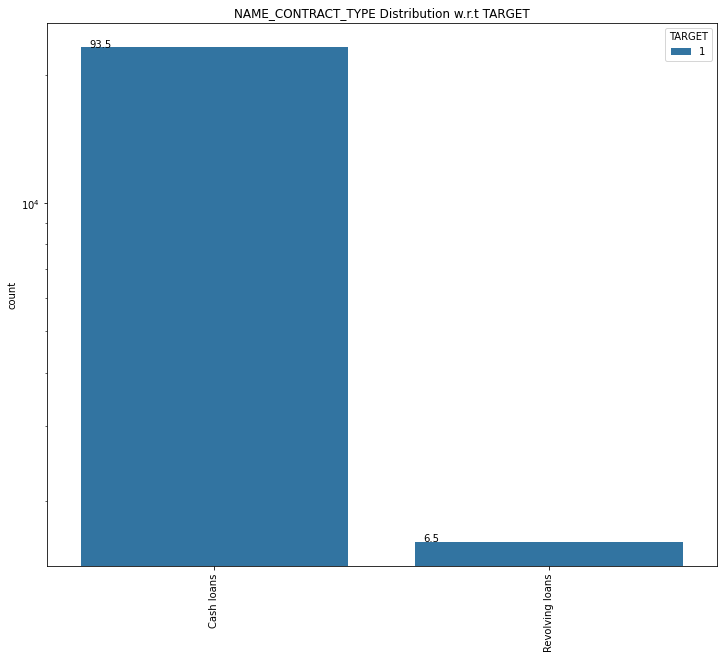

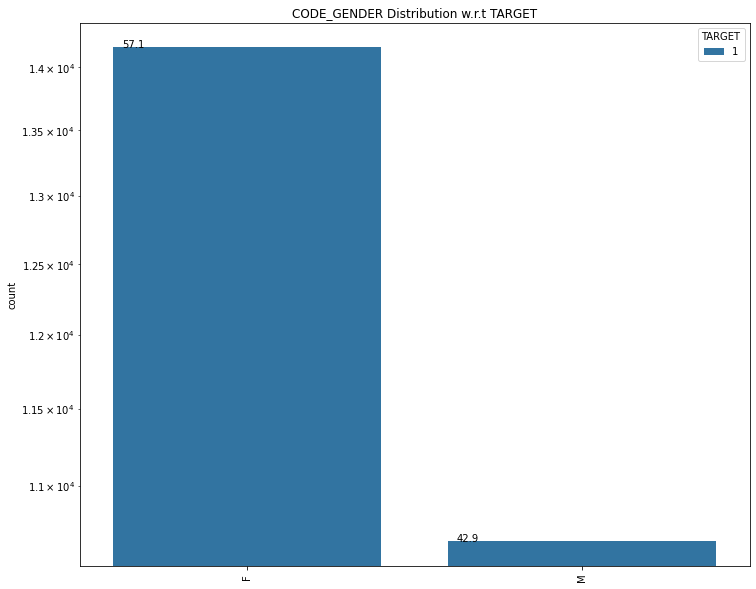

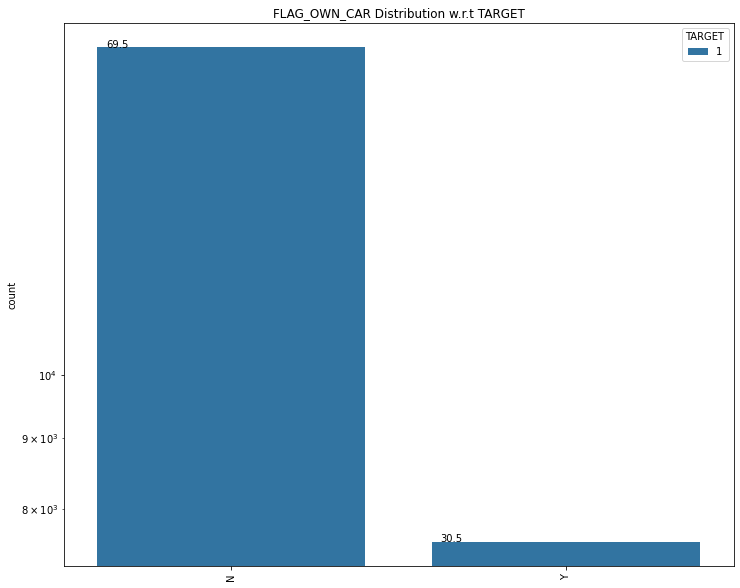

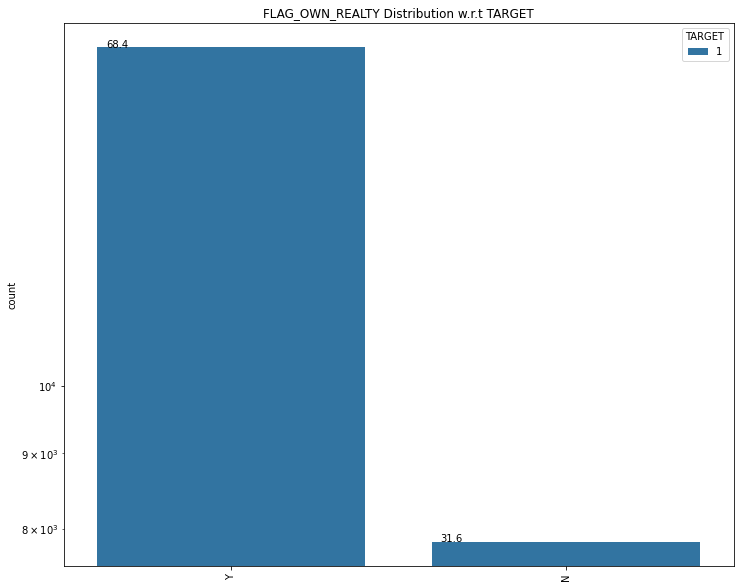

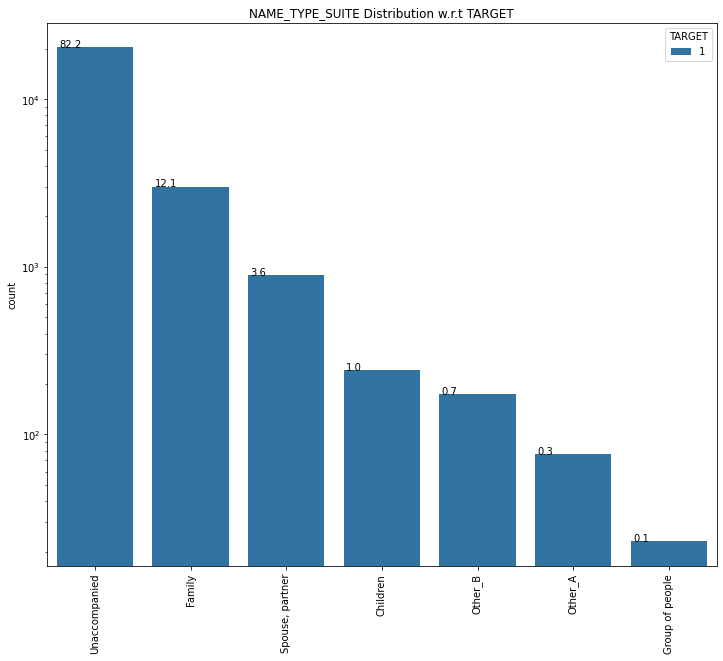

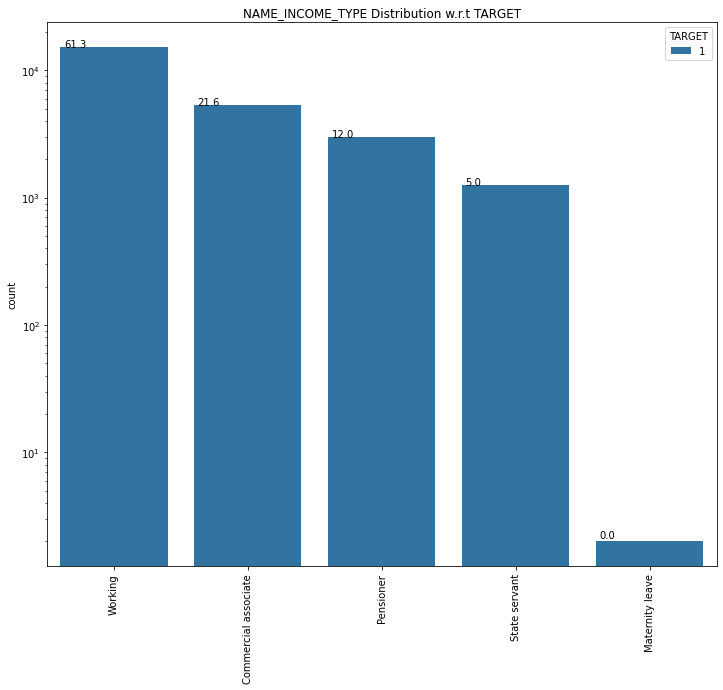

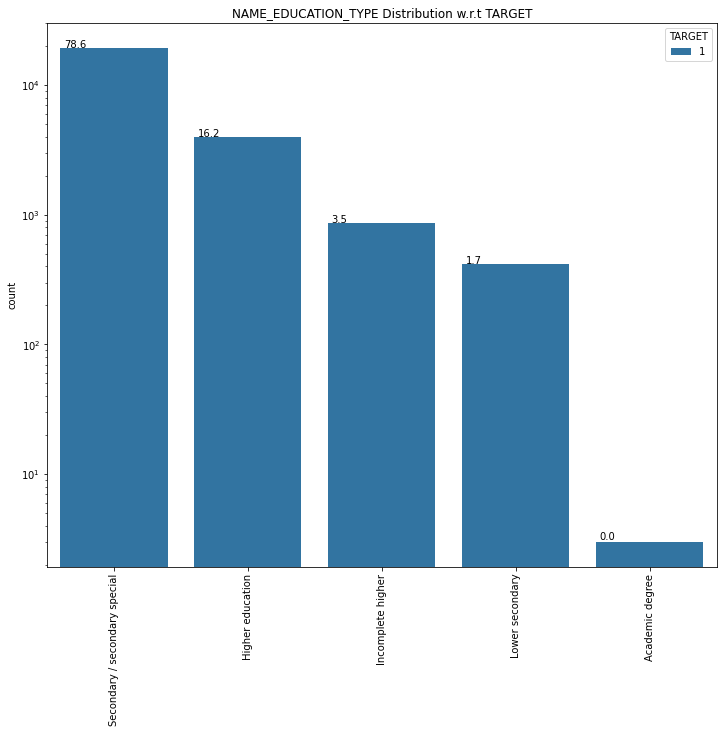

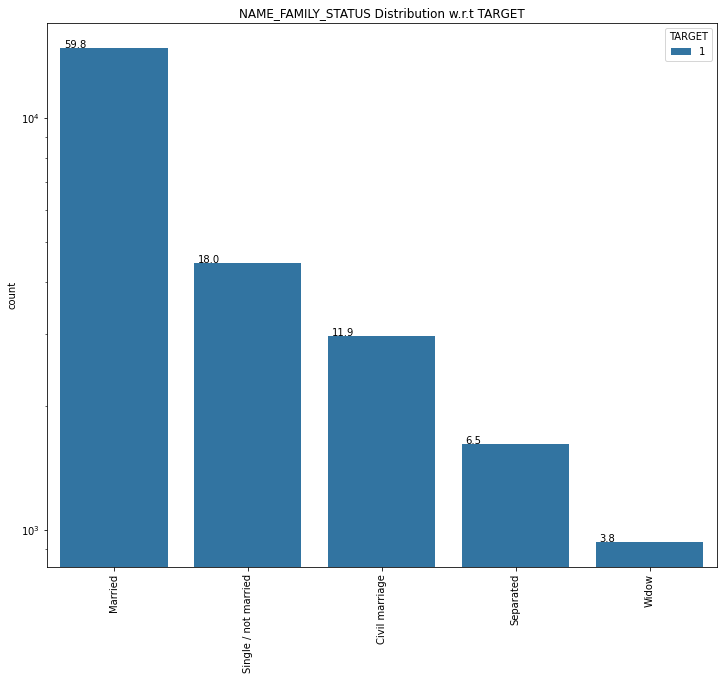

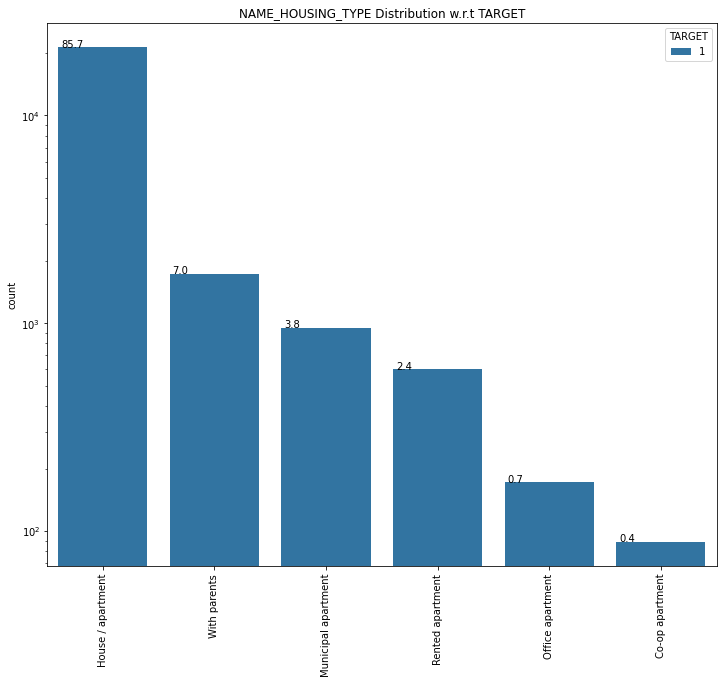

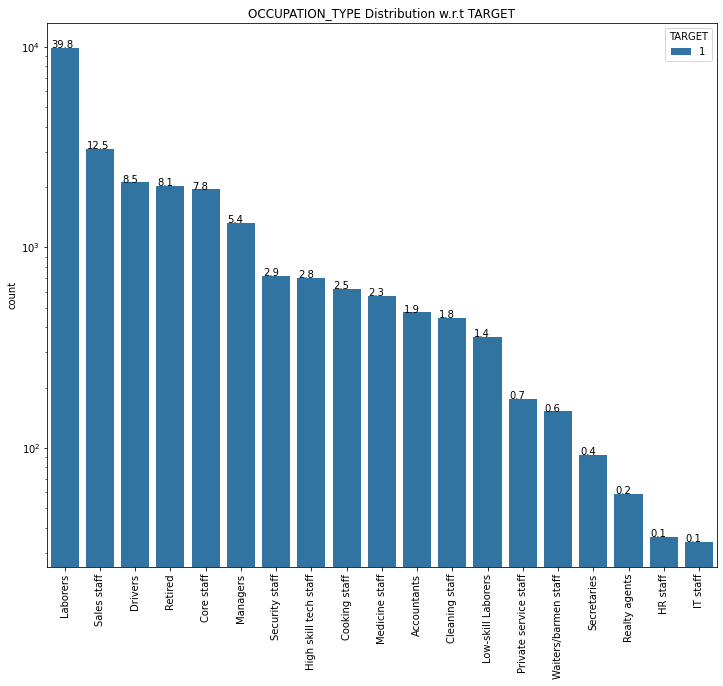

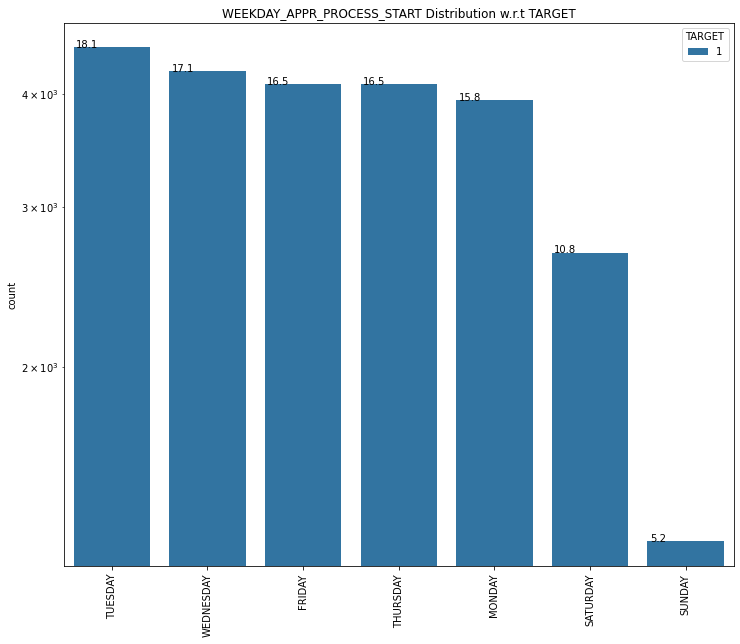

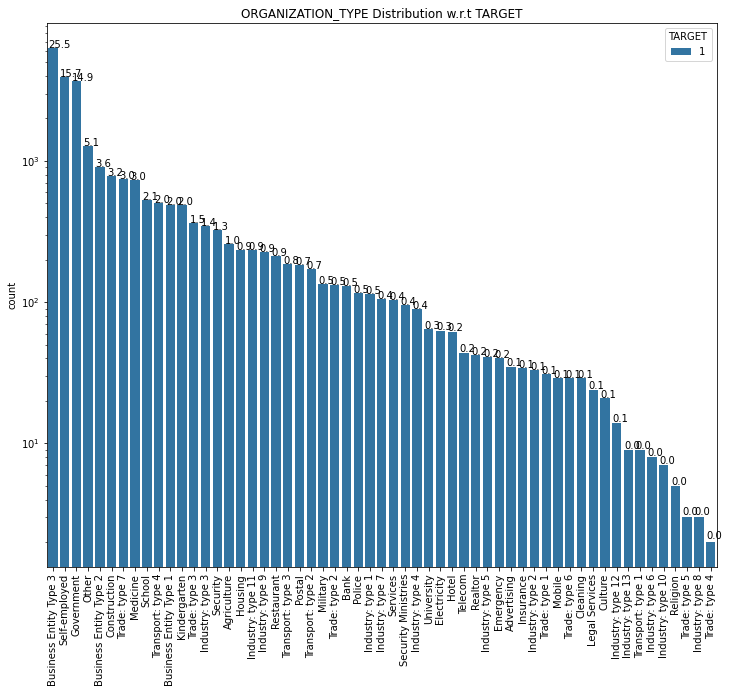

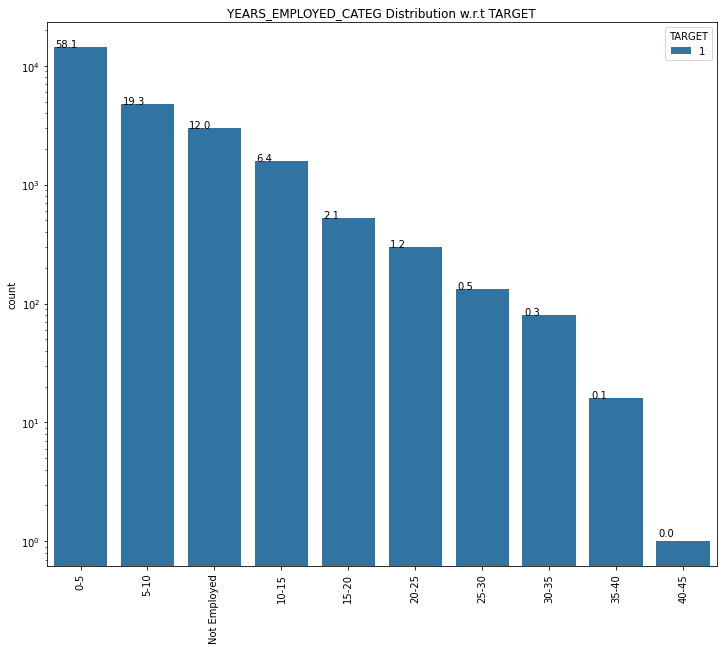

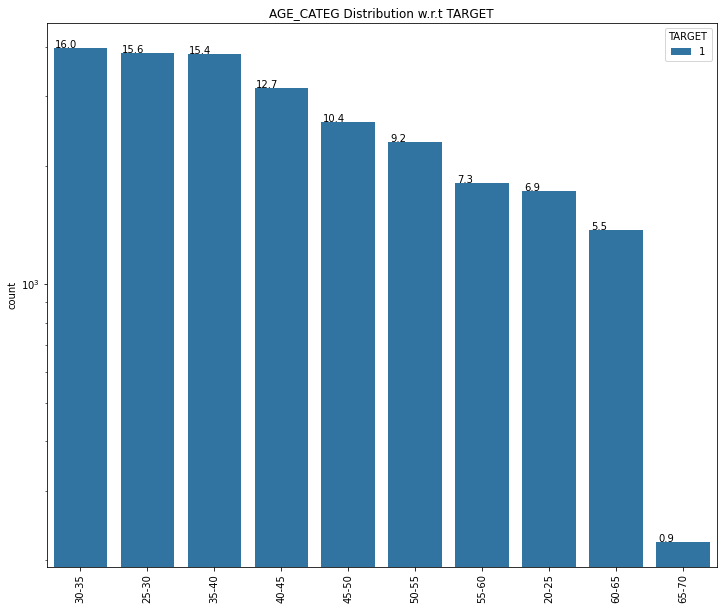

In [91]:
for col in all_obj_cat_cols:
    cntplt_defaulter(appl_df_default,col,[12,10],None,appl_df_default[col].value_counts().index)
plt.show()

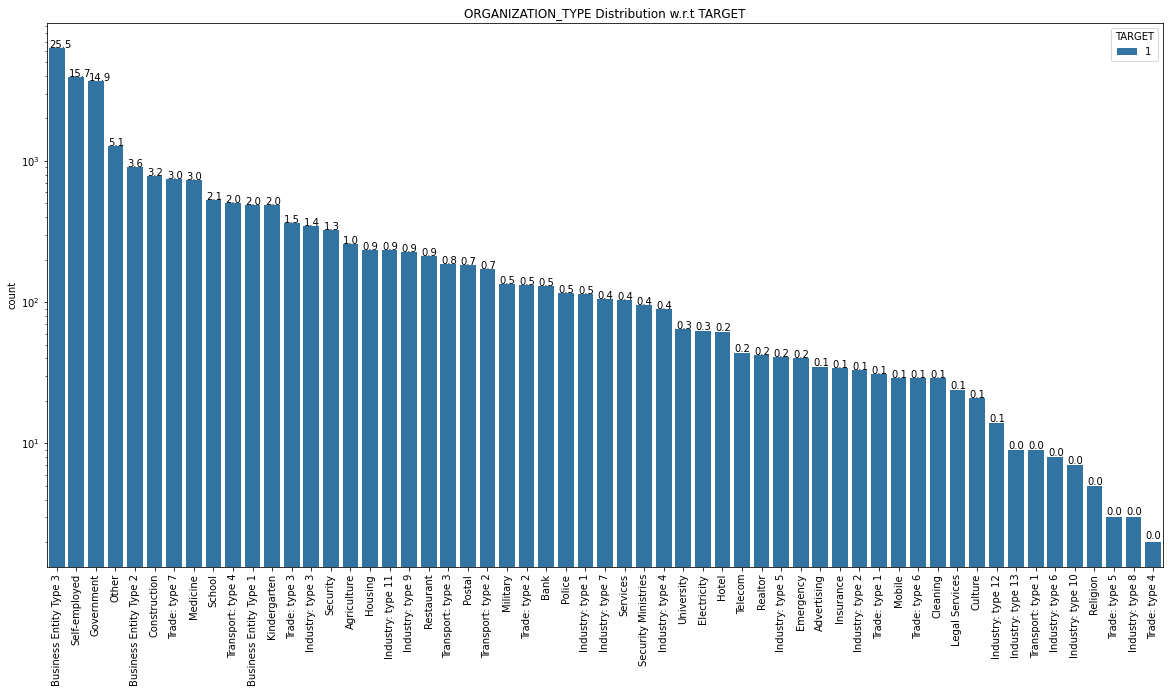

In [92]:
##As Organisation_type wasn't clear then, lets visulaise that individullay
#cntplt_defaulter('ORGANIZATION_TYPE')


cntplt_defaulter(appl_df_default,'ORGANIZATION_TYPE',[20,10],None,appl_df_default['ORGANIZATION_TYPE'].value_counts().index)



From the above visualisations, below are the things can be observed:
1. People who have taken Cash loans defaulted more, but we can't take a call, as there is an imbalance in the type of loan taken.
2. Female have defaulted more 
3. People who don't own car defaulted more
4. People who own a house/flat have defaulted more.
5. People who came uncompanied defaulted more.
6. People who are on working and commerial associate defaulted more.
7. Client's who have done academic degree defaulted least.
8. People whose family status is Married defaulted more.
9. People who live with in co-op apartment defaulted less.
10. People whose occupation_type as Labroures defaulted more.
12. People who are in the current role within 0-5 range defaulted more.
13. People who belong to age category 25-30,35-40,45-50 defaulted more. 
14. Clients who worked in a Business Entity Type 3 organisation defaulted more

**Lets see the visulalisation for flag columns too**

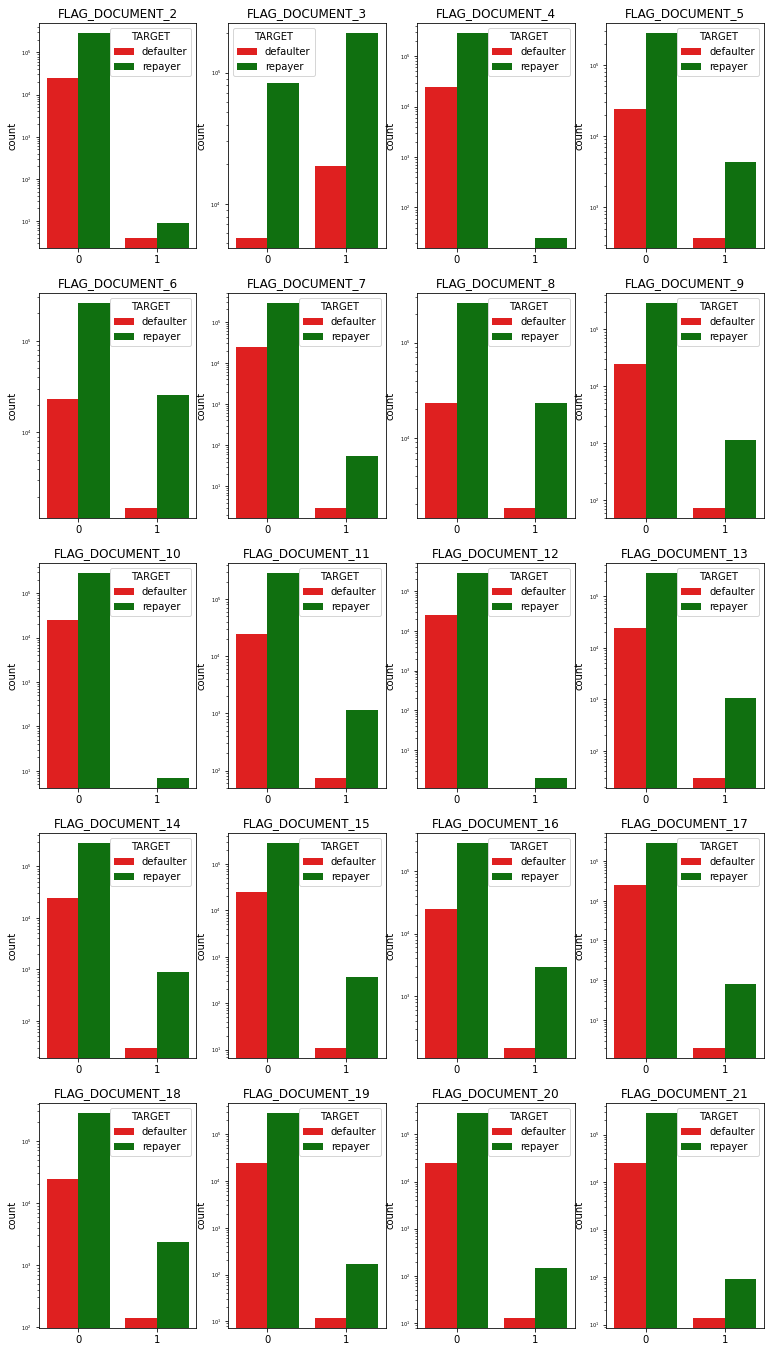

In [93]:
flag_doc_cols = ['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']
appl_df_flag = appl_df[flag_doc_cols+["TARGET"]]

length = len(flag_doc_cols)

appl_df_flag["TARGET"] = appl_df_flag["TARGET"].replace({1:"defaulter",0:"repayer"})

fig = plt.figure(figsize=(13,24))
for i,j in zip(flag_doc_cols,range(length)):
    plt.subplot(5,4,j+1)
    ax = sns.countplot(appl_df_flag[i],hue=appl_df_flag["TARGET"],palette=["r","g"])
    plt.yticks(fontsize=5)
    plt.yscale('log')
    plt.xlabel("")
    plt.title(i)


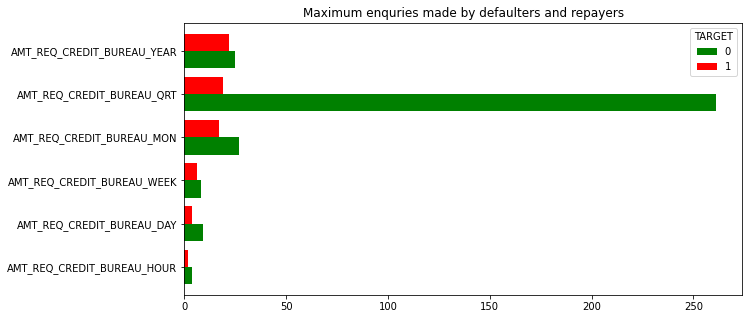

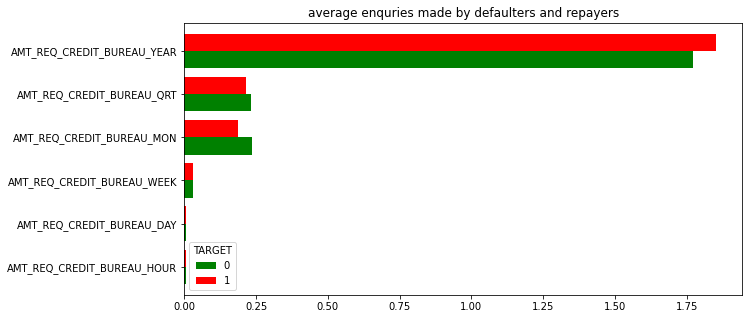

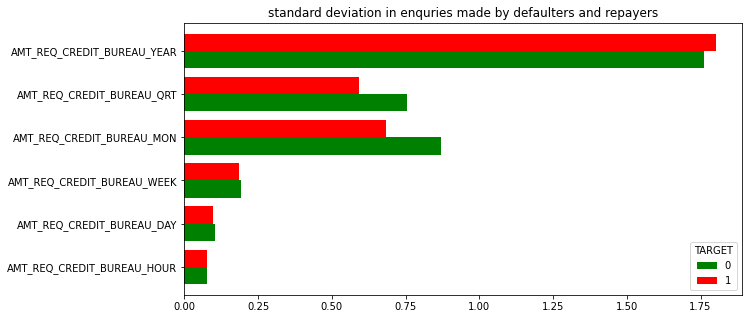

In [94]:
appl_df.groupby("TARGET")[cred_beaur_cols].max().transpose().plot(kind="barh",
                                                                 figsize=(10,5),width=.8,color=["g","r"])
plt.title("Maximum enquries made by defaulters and repayers")
appl_df.groupby("TARGET")[cred_beaur_cols].mean().transpose().plot(kind="barh",
                                                                  figsize=(10,5),width=.8,color=["g","r"])
plt.title("average enquries made by defaulters and repayers")
appl_df.groupby("TARGET")[cred_beaur_cols].std().transpose().plot(kind="barh",
                                                                 figsize=(10,5),width=.8,color=["g","r"])
plt.title("standard deviation in enquries made by defaulters and repayers")
plt.show()

**Visualize Amount Columns**

In [95]:
# Creating bins for income amount

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

appl_df['AMT_INCOME_RANGE']=pd.cut(appl_df['AMT_INCOME_TOTAL'],bins,labels=slot)

#Creating bins for Credit amount

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

appl_df['AMT_CREDIT_RANGE']=pd.cut(appl_df['AMT_CREDIT'],bins=bins,labels=slots)

# Lets recaculate the defaulters
appl_df_default = appl_df[appl_df.TARGET == 1] 


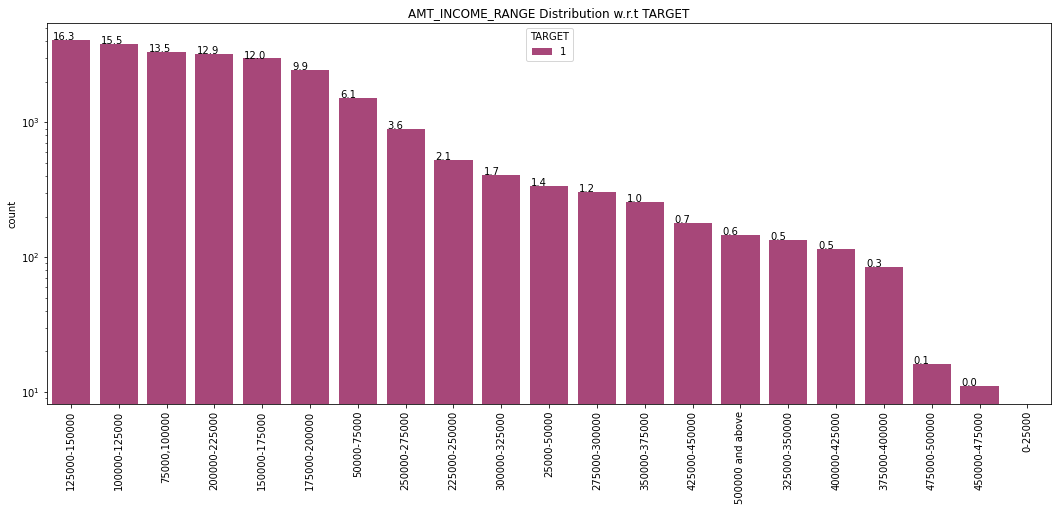

In [96]:
cntplt_defaulter(appl_df_default,'AMT_INCOME_RANGE',[18,7],'magma',appl_df_default['AMT_INCOME_RANGE'].value_counts().index)


1. Most of the defaulters have income in the range of 125000-150000 and 100000-125000

`Lets see Credit amount range column`

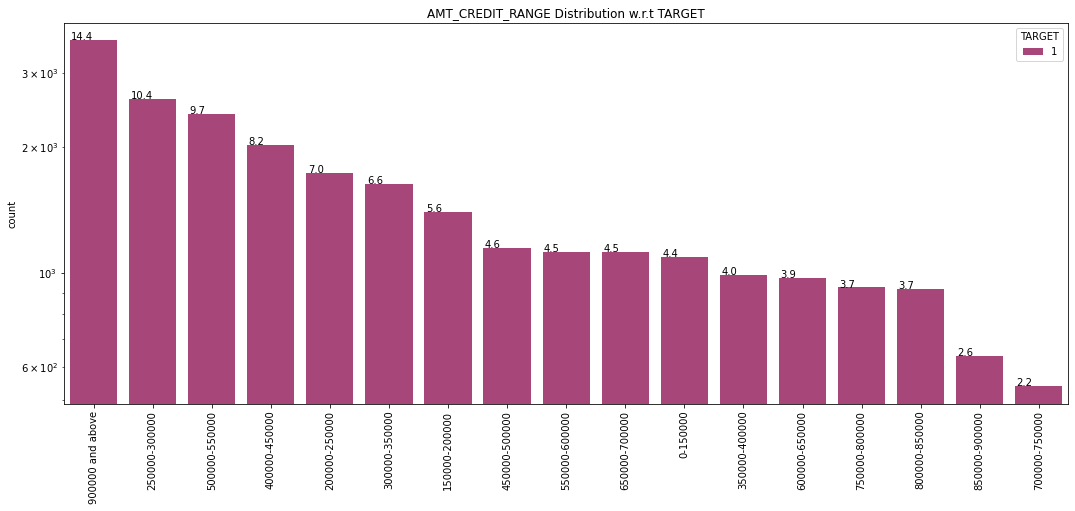

In [97]:
cntplt_defaulter(appl_df_default,'AMT_CREDIT_RANGE',[18,7],'magma',appl_df_default['AMT_CREDIT_RANGE'].value_counts().index)


1. The highest defaulted have happened when the credit amount was in range of 900000 and above.

`Lets visualize contact columns`

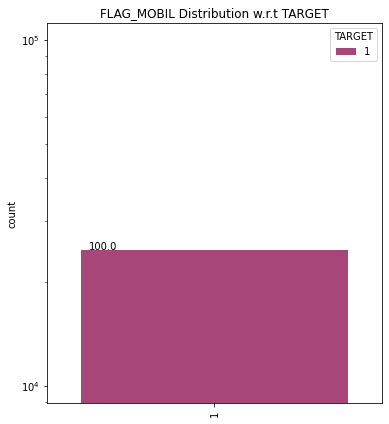

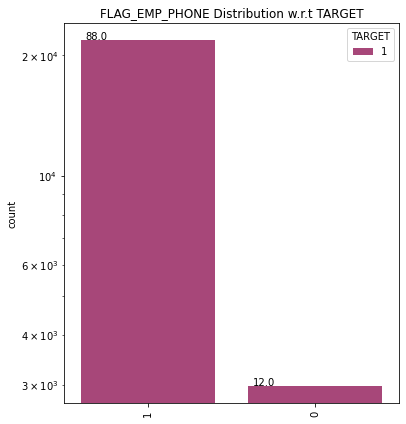

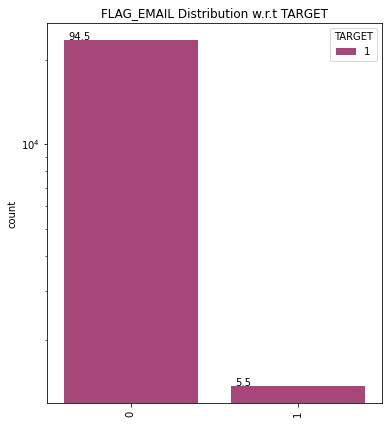

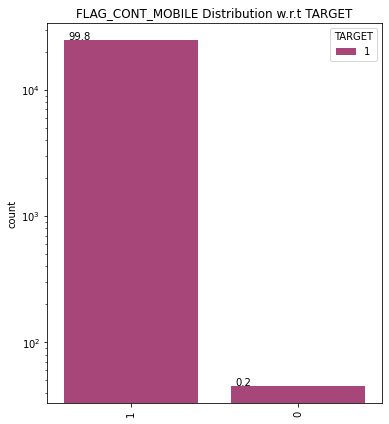

In [98]:
for col in ['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_EMAIL','FLAG_CONT_MOBILE']:
    cntplt_defaulter(appl_df_default,col,[6,7],'magma',appl_df_default[col].value_counts().index)

    

1. All the defaulters have provided their mobile phones, out of which 99.8% client's mobile phone was reachable
2. Around 88% of defaulters provided their work phone number.
3. Around 88% of defaulters provided their email.


**Multi Variate Analysis**

In [99]:
# Graph to visualise multi dimensional
def piv_plt_multi_defaulter(df,xcol,ycol,figure_size,pal,orde=None):    
    
    plt.figure(figsize=figure_size)
    piv_table = pd.pivot_table(data=df,values="TARGET",index=xcol,columns=ycol,aggfunc='sum')
    sns.heatmap(piv_table,annot=True,cmap='Reds',linewidths=0.5,linecolor='k')
    plt.title('{} vs {}'.format(xcol,ycol))
    

`1. Education, Income type and Target`

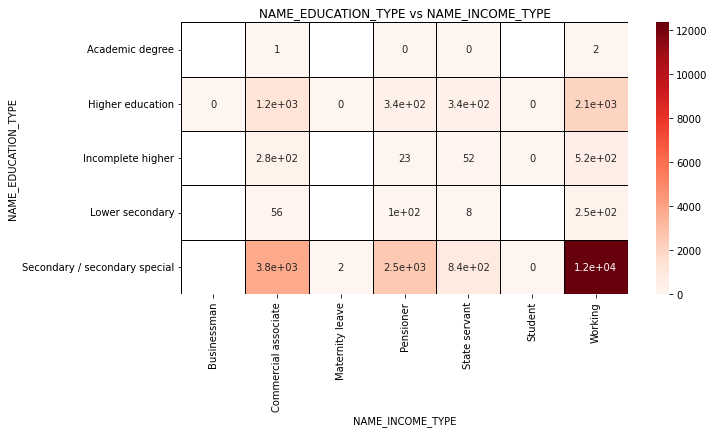

In [100]:
piv_plt_multi_defaulter(appl_df,'NAME_EDUCATION_TYPE','NAME_INCOME_TYPE',[10,5],None,None)

From the above visualization we see:
1. People who have completed Secondary/secondary special education and is cuurently working defaulted maximum
2. People who are Businessman and Student defaulted the least.


2. ORGANIZATION_TYPE, NAME_INCOME_TYPE and TARGET

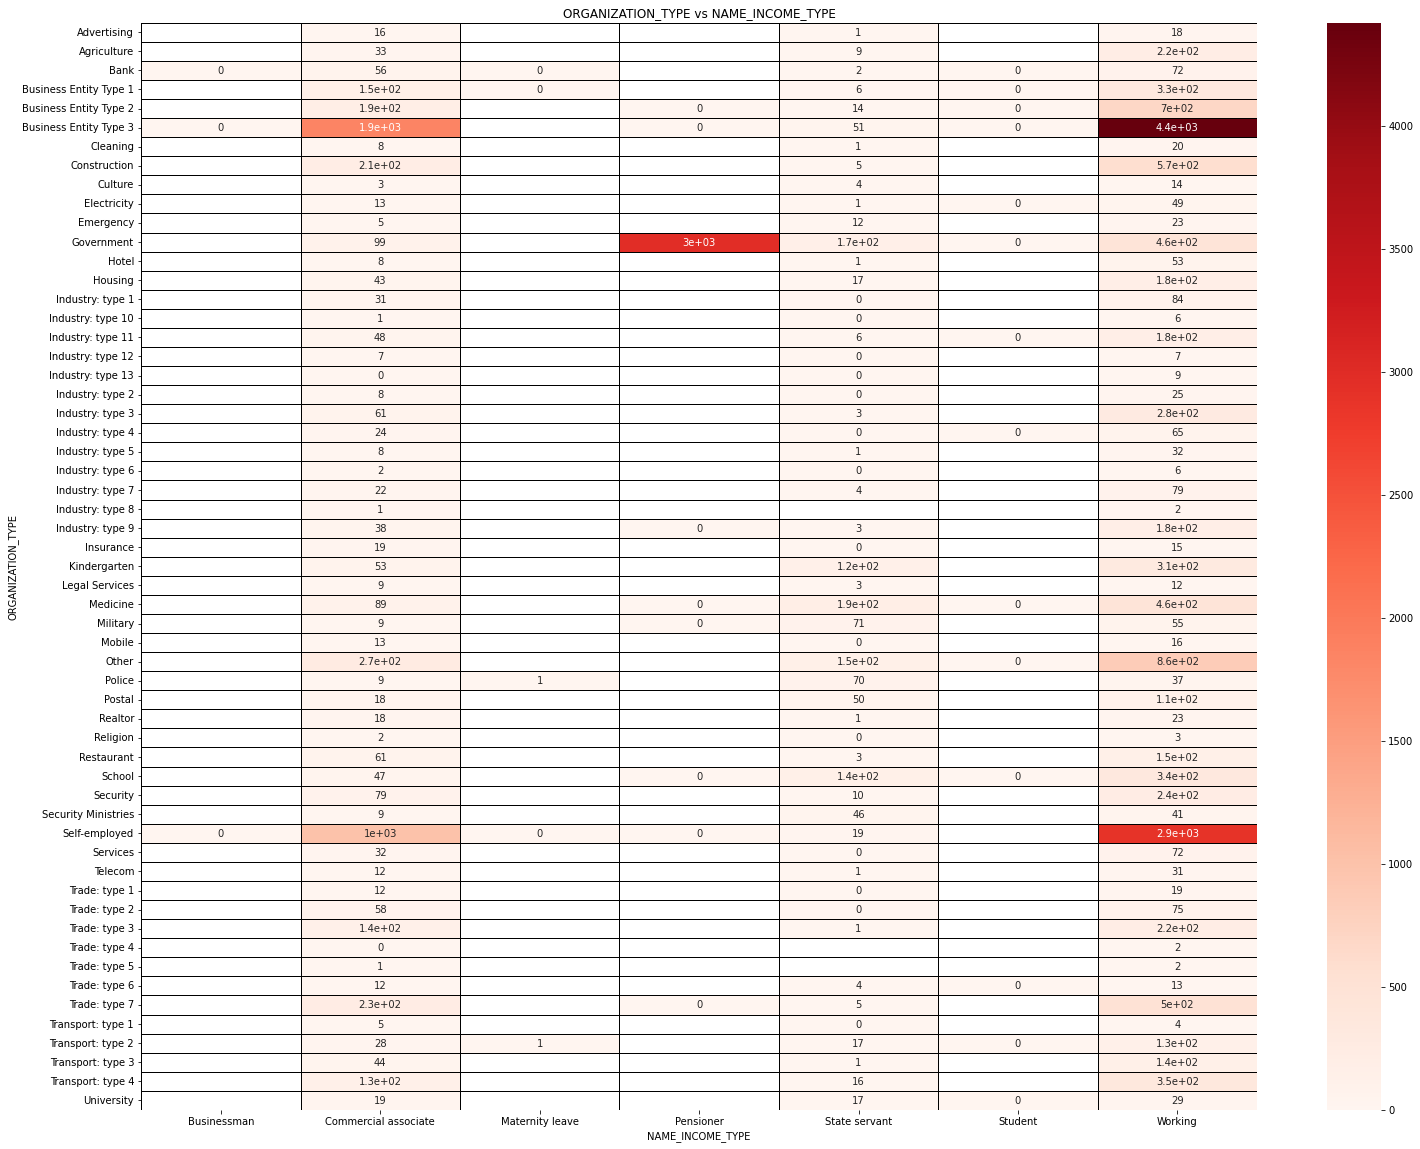

In [101]:
piv_plt_multi_defaulter(appl_df,'ORGANIZATION_TYPE','NAME_INCOME_TYPE',[25,20],None,None)

From the above visulaisation:
1. People who are working inn Self-employed and Business Type 3 are most defaulters.
2. Also pensioners are defaulting more.

3. ORGANIZATION_TYPE vs [NAME_INCOME_TYPE, NAME_EDUCATION_TYPE]

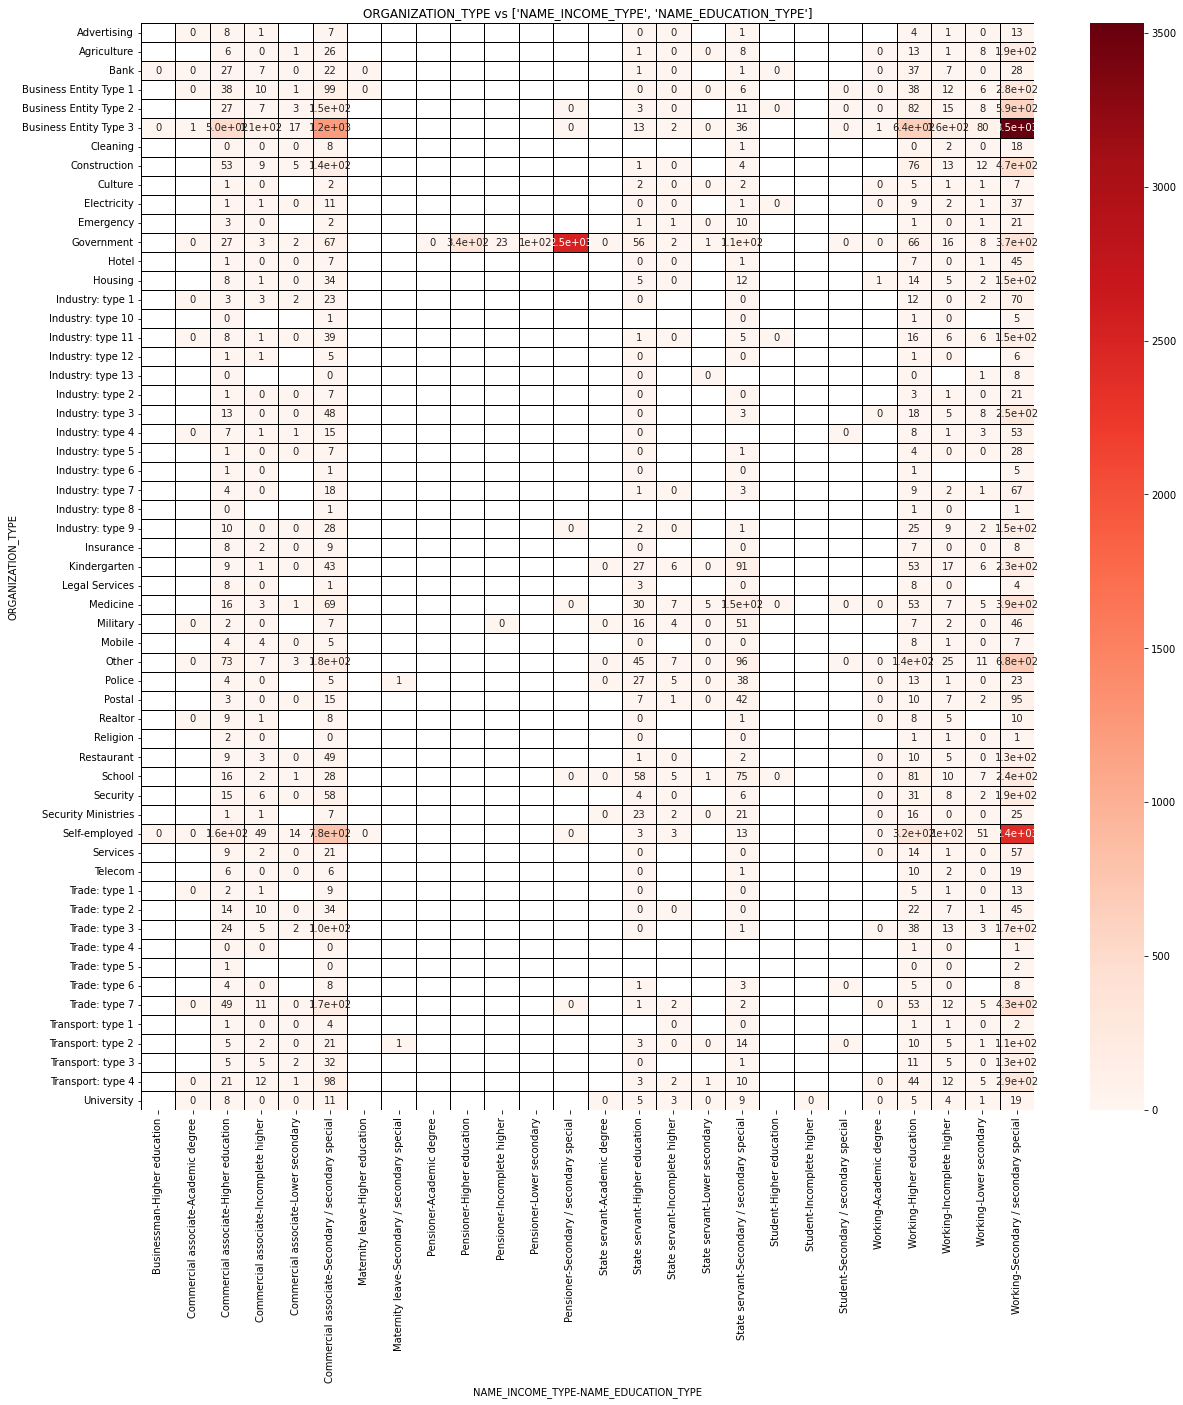

In [102]:
piv_plt_multi_defaulter(appl_df,'ORGANIZATION_TYPE',['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE'],[20,20],None,None)

From the above visualisation:
1. People who have completed secondary education and are working in Business Type 3,Self-employed, Pensioners are maximum defaulters.

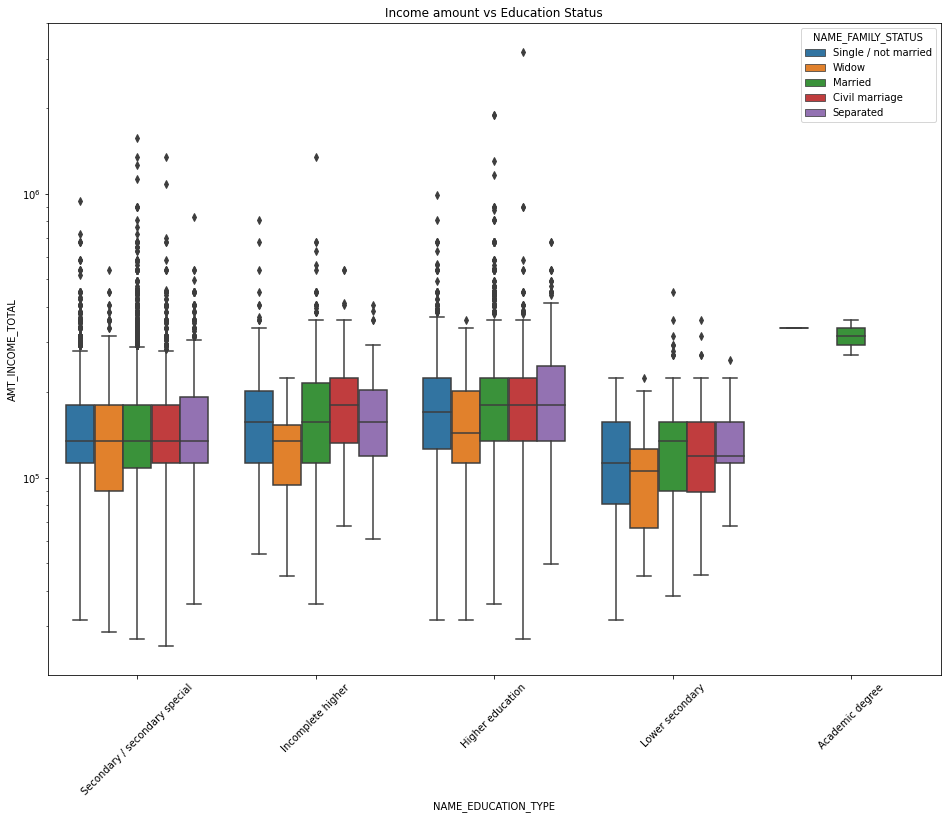

In [103]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =appl_df_default, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

`Lets visualize amount column`

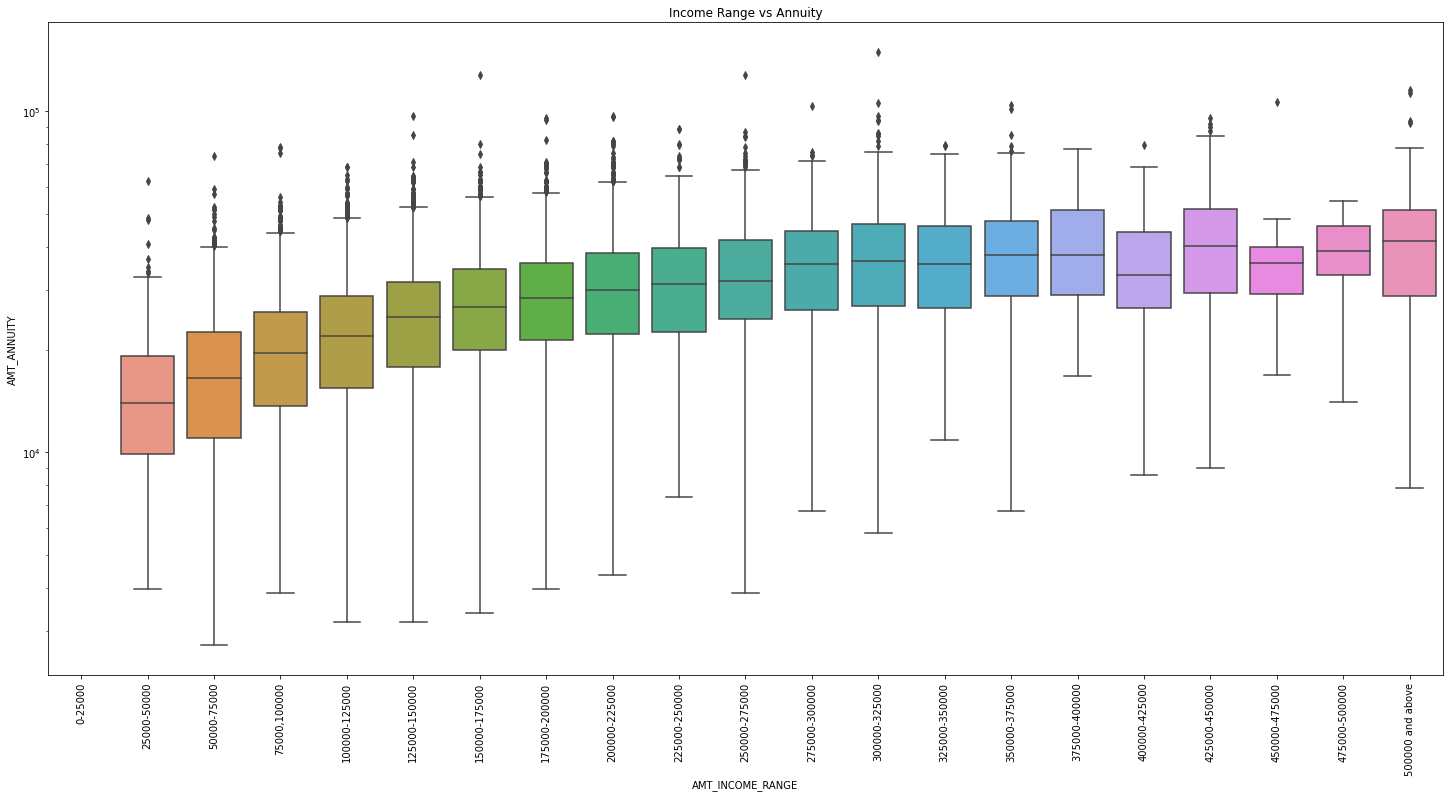

In [104]:
plt.figure(figsize=(25,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =appl_df_default, x='AMT_INCOME_RANGE',y='AMT_ANNUITY',orient='v')
plt.title('Income Range vs Annuity')
plt.show()

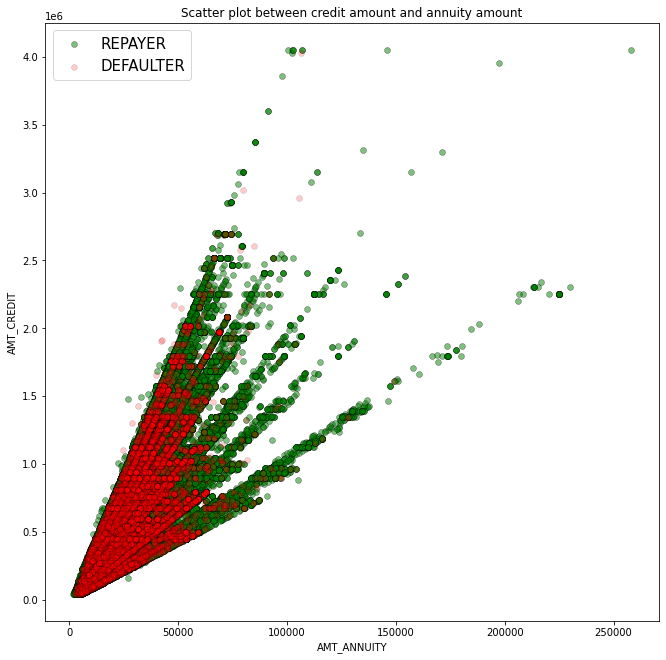

In [105]:
fig = plt.figure(figsize=(11,11))
plt.scatter(appl_df[appl_df["TARGET"]==0]['AMT_ANNUITY'],appl_df[appl_df["TARGET"]==0]['AMT_CREDIT'],s=35,
            color="g",alpha=.5,label="REPAYER",linewidth=.5,edgecolor="k")
plt.scatter(appl_df[appl_df["TARGET"]==1]['AMT_ANNUITY'],appl_df[appl_df["TARGET"]==1]['AMT_CREDIT'],s=35,
            color="r",alpha=.2,label="DEFAULTER",linewidth=.5,edgecolor="k")
plt.legend(loc="best",prop={"size":15})
plt.xlabel("AMT_ANNUITY")
plt.ylabel("AMT_CREDIT")
plt.title("Scatter plot between credit amount and annuity amount")
plt.show()

* The higher the annuity and credit, the lesser the defaulter

### Top 10 Correlation Fields for Repayer


In [106]:
df_repayer = appl_df[appl_df['TARGET'] == 0]
df_defaulter = appl_df[appl_df['TARGET'] == 1]

In [107]:
corrmat = df_repayer.corr() 
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Col1', 'Col2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

Col1                        Col2  Correlation
1706     OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE         1.00
364               AMT_GOODS_PRICE                  AMT_CREDIT         0.99
1097  REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT         0.95
962               CNT_FAM_MEMBERS                CNT_CHILDREN         0.88
1341  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION         0.86
1767     DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE         0.86
1524      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.83
365               AMT_GOODS_PRICE                 AMT_ANNUITY         0.78
304                   AMT_ANNUITY                  AMT_CREDIT         0.77
3551                          AGE              FLAG_EMP_PHONE         0.62

### Top 10 Correlation Fields for Defaulter

In [108]:
corrmat = df_defaulter.corr() 
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Col1', 'Col2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

Col1                        Col2  Correlation
1706     OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE         1.00
364               AMT_GOODS_PRICE                  AMT_CREDIT         0.98
1097  REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT         0.96
962               CNT_FAM_MEMBERS                CNT_CHILDREN         0.89
1767     DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE         0.87
1341  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION         0.85
1524      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.78
304                   AMT_ANNUITY                  AMT_CREDIT         0.75
365               AMT_GOODS_PRICE                 AMT_ANNUITY         0.75
2111              FLAG_DOCUMENT_6              FLAG_EMP_PHONE         0.62

**`Completed Application Data Analysis`**

**===================================================================================================================**
______

_____

# PREVIOUS APPLICATION DATA analysis

## Reading Data

In [109]:
prev_appl_df = pd.read_csv('/kaggle/input/financial-risk-analysis-data/previous_application.csv')# This dataframe consists data of file previous_application.csv
pd.set_option("display.max_rows", None, "display.max_columns", None)


In [110]:
prev_appl_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

## Describing Data

In [111]:
prev_appl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [112]:
prev_appl_df.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115833    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

In [113]:
prev_appl_df.shape

(1670214, 37)

## Handling Missing Values

In [114]:
prev_appl_missing = 100.0 * prev_appl_df.isnull().sum()/prev_appl_df.shape[0]
prev_appl_missing

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

Lets drop columns have missing values greater than 40%

In [115]:
prev_appl_missing_great_40 = prev_appl_missing[prev_appl_missing > 40].sort_values(ascending=False)
print(prev_appl_missing_great_40)
prev_appl_missing_great_40_cols = prev_appl_missing_great_40.index


RATE_INTEREST_PRIMARY        99.643698
RATE_INTEREST_PRIVILEGED     99.643698
AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
NAME_TYPE_SUITE              49.119754
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
dtype: float64


In [116]:
prev_appl_df.drop(labels=prev_appl_missing_great_40_cols,axis=1,inplace=True)

In [117]:
prev_appl_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0            -73  Cash through the bank                XAP         Repeater   
1           -164                    XNA                XAP         Repeater   
2           -301  Cash through the bank                XAP         Repeater   
3           -512  Cash through the bank                XAP         Repeater   
4           -781  Cash through the bank                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0         12.0           middle  POS mobile with interest  
1         36.0       low_action          Cash X-Sell: low  
2         12.0             high         Cash X-Sell: high  
3         12.0           middle       Cash X-Sell: middle  
4         24.0             high         Cash Street: high

In [118]:
100.0 * prev_appl_df.isnull().sum()/prev_appl_df.shape[0]

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

<AxesSubplot:>

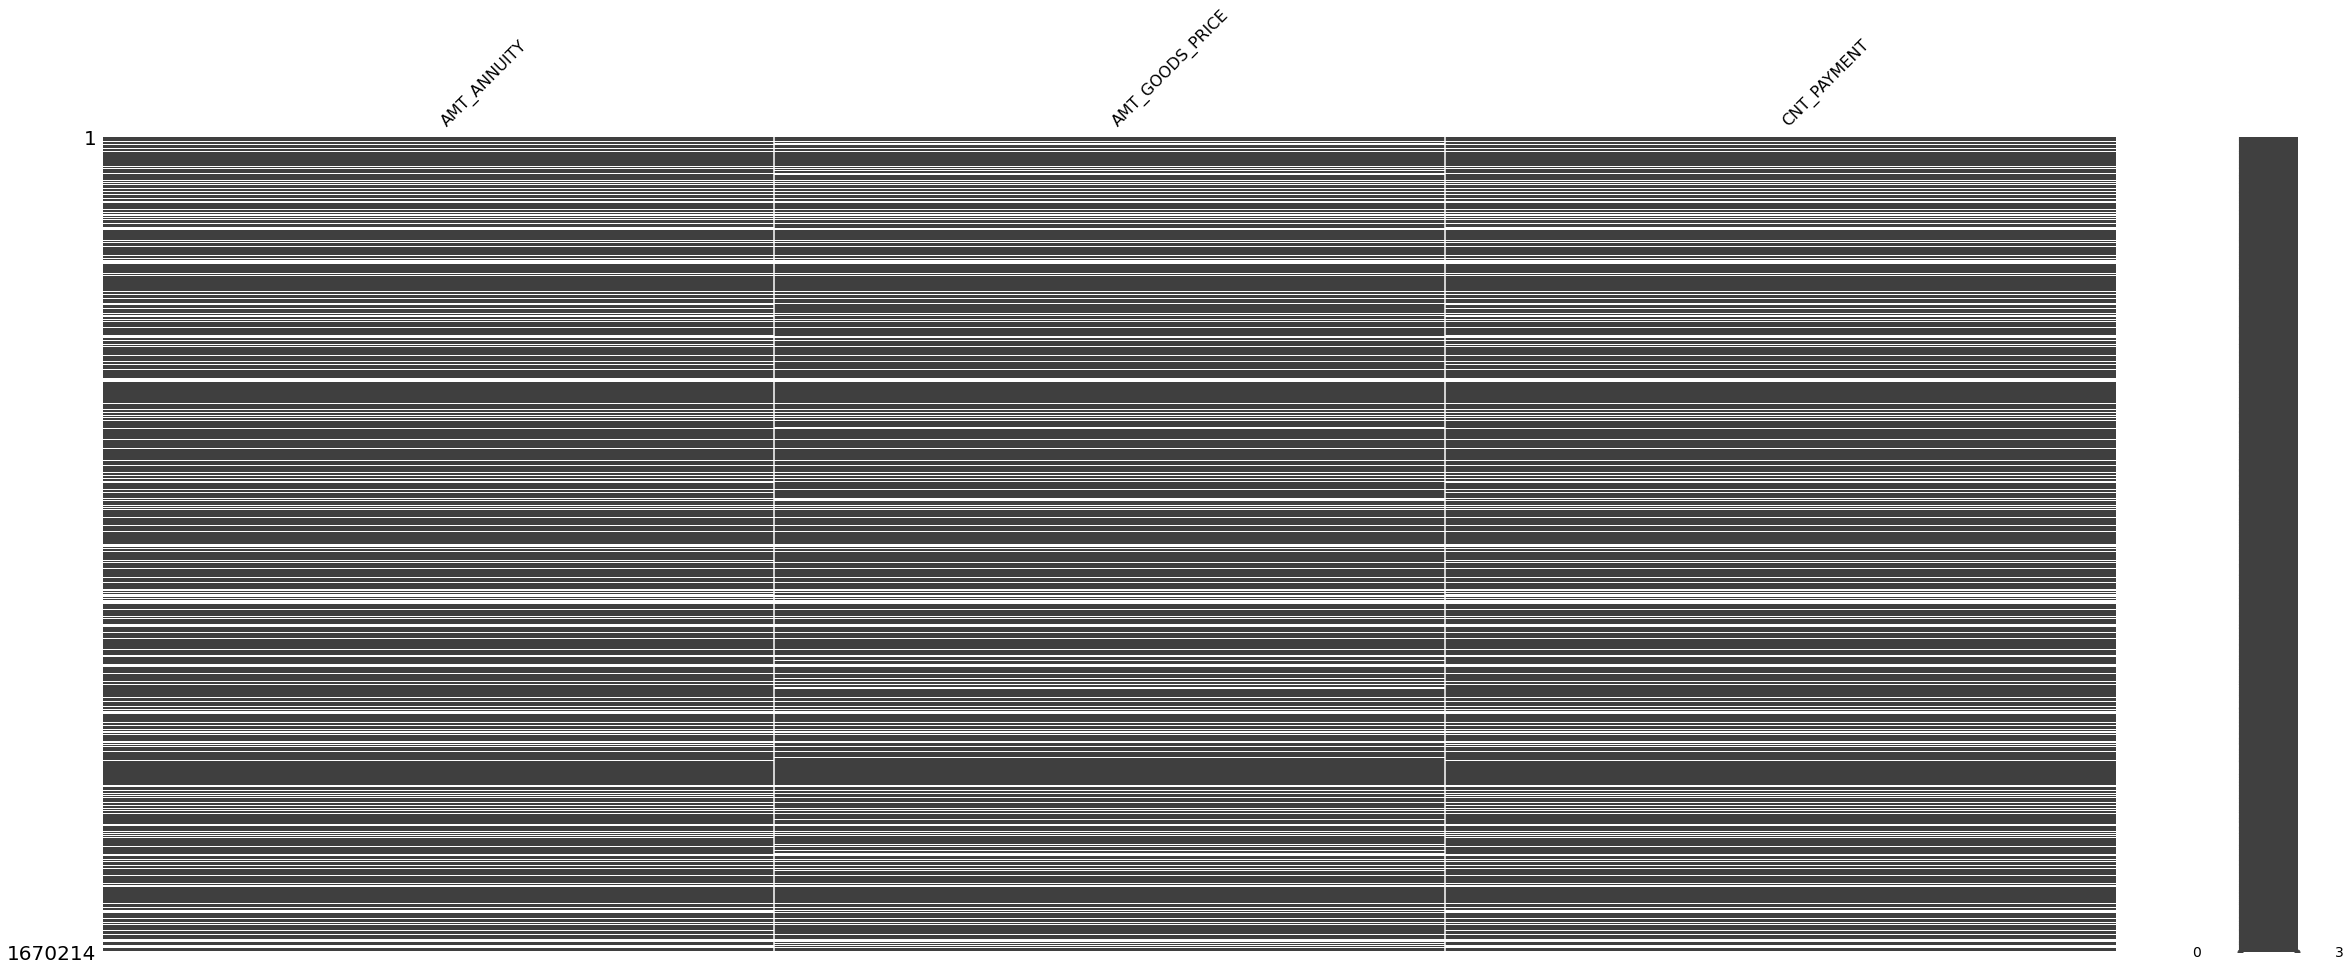

In [119]:

mno.matrix(prev_appl_df.loc[:,['AMT_ANNUITY','AMT_GOODS_PRICE','CNT_PAYMENT']],figsize=(40, 15))

<AxesSubplot:>

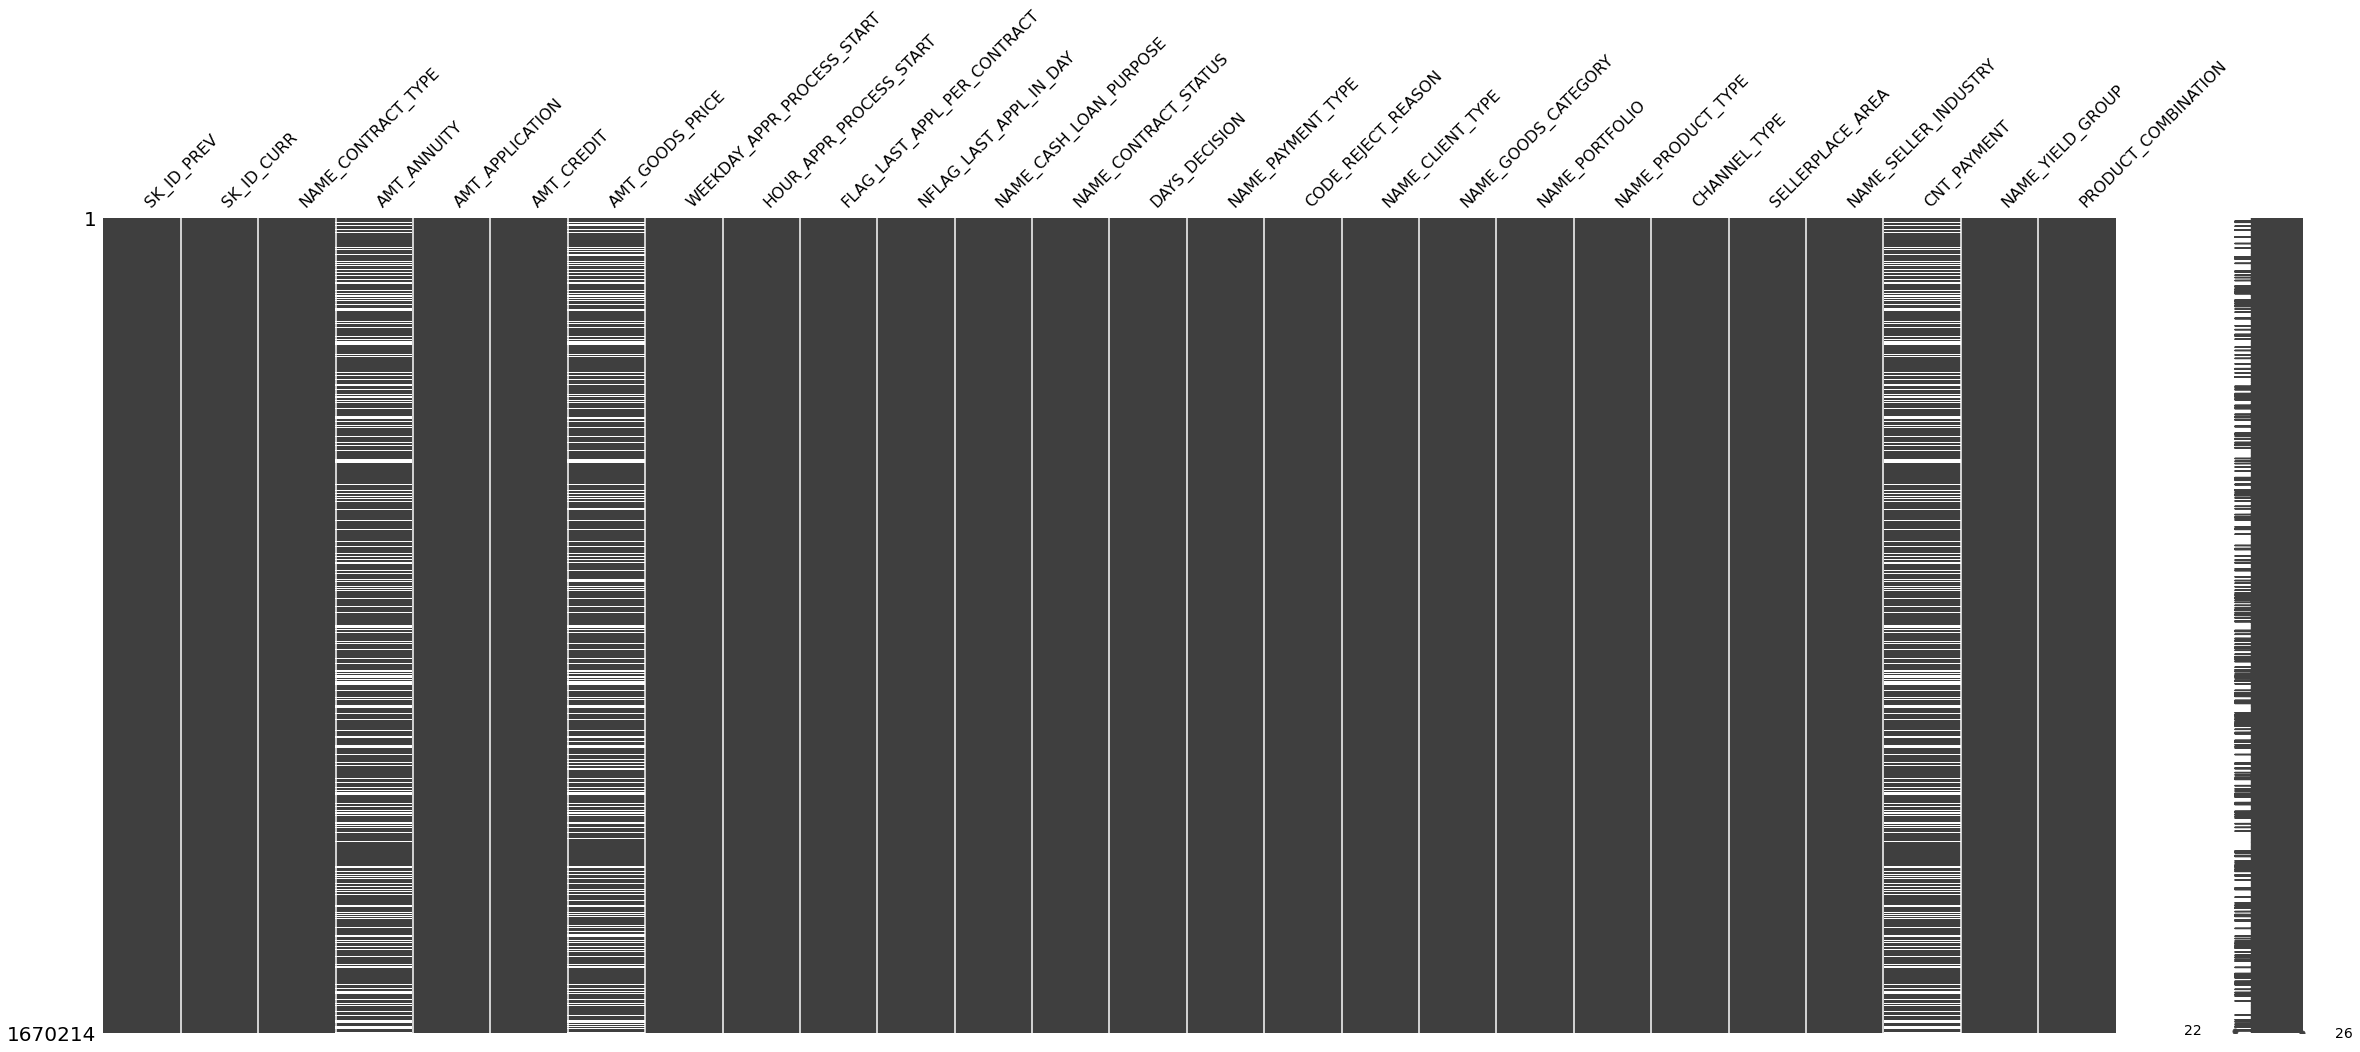

In [120]:
mno.matrix(prev_appl_df,figsize=(40, 15))

Looks like all the three have NULL for same records. Lets 

In [121]:
prev_appli_loan_purpose = prev_appl_df[prev_appl_df['AMT_ANNUITY'].isna()]['NAME_CASH_LOAN_PURPOSE'].value_counts()
prev_appli_loan_purpose


XNA                                 285727
XAP                                  86245
Other                                  109
Repairs                                 67
Everyday expenses                       22
Buying a used car                       16
Medicine                                 7
Urgent needs                             7
Education                                6
Buying a new car                         6
Purchase of electronic equipment         6
Wedding / gift / holiday                 5
Payments on other loans                  5
Journey                                  4
Business development                     1
Gasification / water supply              1
Furniture                                1
Name: NAME_CASH_LOAN_PURPOSE, dtype: int64

Looks like the other columns are also having values like XNA, XAP, so lets drop these records.

In [122]:
prev_appl_df.dropna(inplace=True)

In [123]:
prev_appl_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0            -73  Cash through the bank                XAP         Repeater   
1           -164                    XNA                XAP         Repeater   
2           -301  Cash through the bank                XAP         Repeater   
3           -512  Cash through the bank                XAP         Repeater   
4           -781  Cash through the bank                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0         12.0           middle  POS mobile with interest  
1         36.0       low_action          Cash X-Sell: low  
2         12.0             high         Cash X-Sell: high  
3         12.0           middle       Cash X-Sell: middle  
4         24.0             high         Cash Street: high

In [124]:
prev_appl_df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1246320 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1246320 non-null  int64  
 1   SK_ID_CURR                   1246320 non-null  int64  
 2   NAME_CONTRACT_TYPE           1246320 non-null  object 
 3   AMT_ANNUITY                  1246320 non-null  float64
 4   AMT_APPLICATION              1246320 non-null  float64
 5   AMT_CREDIT                   1246320 non-null  float64
 6   AMT_GOODS_PRICE              1246320 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1246320 non-null  object 
 8   HOUR_APPR_PROCESS_START      1246320 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1246320 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1246320 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1246320 non-null  object 
 12  NAME_CONTRACT_STATUS         1246320 non-n

In [125]:
prev_appl_df.NAME_CASH_LOAN_PURPOSE.value_counts()

XAP                                 784757
XNA                                 392191
Repairs                              23698
Other                                15499
Urgent needs                          8405
Buying a used car                     2872
Building a house or an annex          2693
Everyday expenses                     2394
Medicine                              2167
Payments on other loans               1926
Education                             1567
Journey                               1235
Purchase of electronic equipment      1055
Buying a new car                      1006
Wedding / gift / holiday               957
Buying a home                          865
Car repairs                            797
Furniture                              748
Buying a holiday home / land           533
Business development                   425
Gasification / water supply            299
Buying a garage                        136
Hobby                                   55
Money for a

Lets drop these XNA and XAP records

In [126]:
prev_appl_df=prev_appl_df.drop(prev_appl_df[prev_appl_df['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
prev_appl_df=prev_appl_df.drop(prev_appl_df[prev_appl_df['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

In [127]:
prev_appl_df.NAME_CASH_LOAN_PURPOSE.value_counts()

Repairs                             23698
Other                               15499
Urgent needs                         8405
Buying a used car                    2872
Building a house or an annex         2693
Everyday expenses                    2394
Medicine                             2167
Payments on other loans              1926
Education                            1567
Journey                              1235
Purchase of electronic equipment     1055
Buying a new car                     1006
Wedding / gift / holiday              957
Buying a home                         865
Car repairs                           797
Furniture                             748
Buying a holiday home / land          533
Business development                  425
Gasification / water supply           299
Buying a garage                       136
Hobby                                  55
Money for a third person               25
Refusal to name the goal               15
Name: NAME_CASH_LOAN_PURPOSE, dtyp

* Lets check XNA values in NAME_GOODS_CATEGORY column

In [128]:
prev_appl_df.NAME_GOODS_CATEGORY.value_counts()


XNA    69372
Name: NAME_GOODS_CATEGORY, dtype: int64

Looks like all are records are having XNA values. Lets drop this column

In [129]:
prev_appl_df.drop(labels='NAME_GOODS_CATEGORY',axis=1,inplace=True)

* Lets see NAME_SELLER_INDUSTRY 

In [130]:

prev_appl_df.NAME_SELLER_INDUSTRY.value_counts()


XNA                     63763
Connectivity             5194
Consumer electronics      221
Furniture                 158
MLM partners               18
Construction               12
Industry                    5
Clothing                    1
Name: NAME_SELLER_INDUSTRY, dtype: int64

Lets also drop this column NAME_SELLER_INDUSTRY as it has majority XNA values

In [131]:
prev_appl_df.drop(labels='NAME_SELLER_INDUSTRY',axis=1,inplace=True)

In [132]:
prev_appl_df.NAME_PAYMENT_TYPE.value_counts()

Cash through the bank                        63580
XNA                                           5409
Non-cash from your account                     319
Cashless from the account of the employer       64
Name: NAME_PAYMENT_TYPE, dtype: int64

Lets impute XNA values with mode

In [133]:
pay_mode = prev_appl_df.NAME_PAYMENT_TYPE.mode()[0]
prev_appl_df['NAME_PAYMENT_TYPE'].where(~(prev_appl_df['NAME_PAYMENT_TYPE']=='XNA'),pay_mode,inplace=True)
prev_appl_df.NAME_PAYMENT_TYPE.value_counts()

Cash through the bank                        68989
Non-cash from your account                     319
Cashless from the account of the employer       64
Name: NAME_PAYMENT_TYPE, dtype: int64

In [134]:
cat_obj_cols = prev_appl_df.select_dtypes(include='object')
cat_obj_cols.columns

for col in cat_obj_cols.columns:
    temp_df = prev_appl_df[prev_appl_df[col]=='XNA']
    if temp_df.shape[0]>0:
        print(prev_appl_df[col].value_counts())

XAP       28562
HC        22210
LIMIT      9168
SCO        5165
VERIF      2340
SCOFR      1413
XNA         512
SYSTEM        2
Name: CODE_REJECT_REASON, dtype: int64
Repeater     56018
New           9952
Refreshed     3349
XNA             53
Name: NAME_CLIENT_TYPE, dtype: int64


We will replace both with the mode

In [135]:
rej_mode = prev_appl_df.CODE_REJECT_REASON.mode()[0]
prev_appl_df['CODE_REJECT_REASON'].where(~(prev_appl_df['CODE_REJECT_REASON']=='XNA'),rej_mode,inplace=True)

client_mode = prev_appl_df.NAME_CLIENT_TYPE.mode()[0]
prev_appl_df['NAME_CLIENT_TYPE'].where(~(prev_appl_df['NAME_CLIENT_TYPE']=='XNA'),client_mode,inplace=True)


Lets convert days decision to postive values

In [136]:
prev_appl_df['DAYS_DECISION'] = abs(prev_appl_df['DAYS_DECISION'])

## Handling outliers

In [137]:
prev_appl_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
4      1784265      202054         Cash loans    31924.395         337500.0   
5      1383531      199383         Cash loans    23703.930         315000.0   
19     1173070      199178         Cash loans     4666.500          45000.0   
51     2664403      163660         Cash loans     9804.285          67500.0   
85     1981960      306707         Cash loans    10678.005         225000.0   

    AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
4     404055.0         337500.0                   THURSDAY   
5     340573.5         315000.0                   SATURDAY   
19     49455.0          45000.0                   SATURDAY   
51     82611.0          67500.0                   SATURDAY   
85    269550.0         225000.0                  WEDNESDAY   

    HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
4                         9                           Y   
5                         8                           Y   
19                       16                           Y   
51                       10                           Y   
85                       11                           Y   

    NFLAG_LAST_APPL_IN_DAY        NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
4                        1                       Repairs              Refused   
5                        1             Everyday expenses             Approved   
19                       1             Everyday expenses              Refused   
51                       1                   Car repairs             Approved   
85                       1  Building a house or an annex              Refused   

    DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
4             781  Cash through the bank                 HC         Repeater   
5             684  Cash through the bank                XAP         Repeater   
19            584  Cash through the bank                 HC         Repeater   
51            766  Cash through the bank                XAP              New   
85             13  Cash through the bank              SCOFR         Repeater   

   NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  \
4            Cash           walk-in  Credit and cash offices   
5            Cash            x-sell  Credit and cash offices   
19           Cash           walk-in          AP+ (Cash loan)   
51           Cash           walk-in  Credit and cash offices   
85           Cash           walk-in  Credit and cash offices   

    SELLERPLACE_AREA  CNT_PAYMENT NAME_YIELD_GROUP PRODUCT_COMBINATION  
4                 -1         24.0             high   Cash Street: high  
5                 -1         18.0       low_normal    Cash X-Sell: low  
19                 6         18.0             high   Cash Street: high  
51                -1         12.0             high   Cash Street: high  
85                -1         36.0       low_normal    Cash Street: low

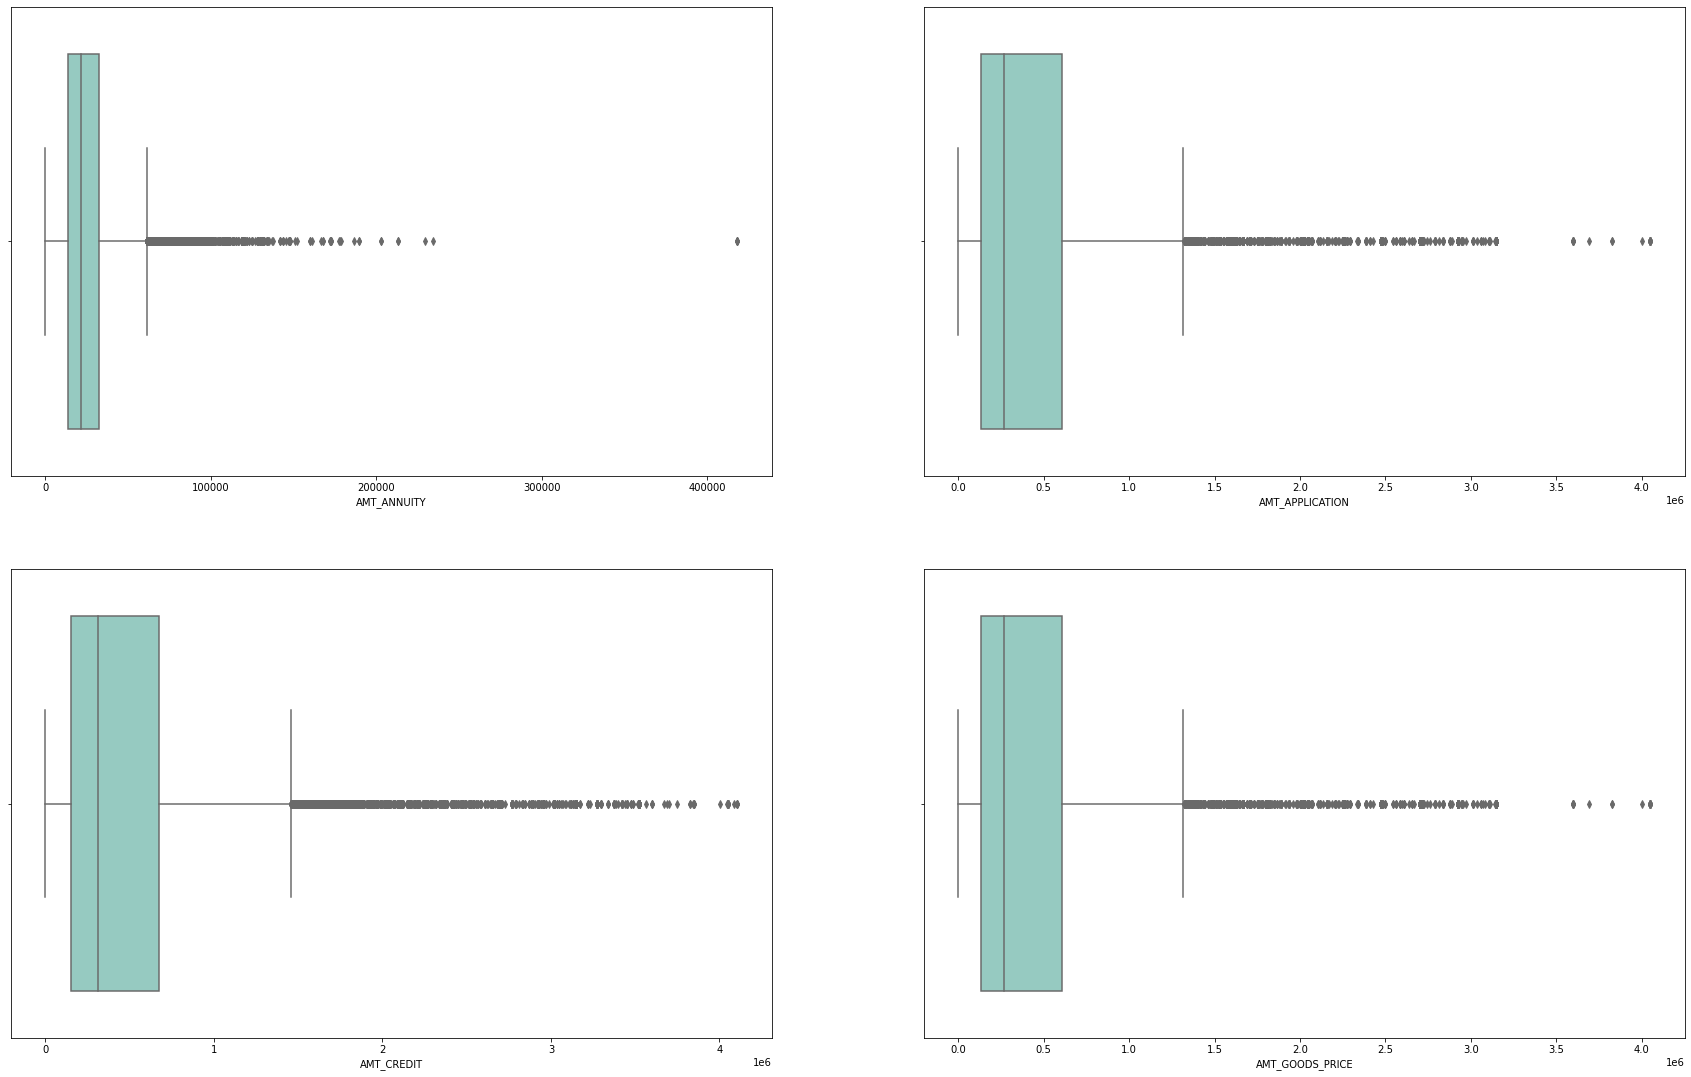

In [138]:
#Box plot for Amount Columns
amnt_cols = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE']
plt.figure(figsize = [30,50])
plt.title("Distribution of Non categorical numeric columns")
i=1
for col in amnt_cols:
    plt.subplot(5,2,i)
    sns.boxplot(x = prev_appl_df[col],palette="Set3")
    #plt.yscale('log')
    i=i+1
    
plt.show()

* Looks like AMT_ANNUITY has a outlier

In [139]:
prev_appl_df.AMT_ANNUITY.describe()

count     69372.000000
mean      25682.780030
std       17426.515193
min           0.000000
25%       13595.175000
50%       21368.250000
75%       32681.250000
max      418058.145000
Name: AMT_ANNUITY, dtype: float64

In [140]:
# percentage of records which are in the extreme end
100* prev_appl_df[(prev_appl_df.AMT_ANNUITY>60000)].shape[0]/prev_appl_df.shape[0]

4.403794037940379

So lets drop all those 4.4% records, so that the distribution is not skewed

In [141]:
prev_appl_df = prev_appl_df[~(prev_appl_df.AMT_ANNUITY>60000)]
prev_appl_df.AMT_ANNUITY.describe()

count    66317.000000
mean     23266.516742
std      12744.060329
min          0.000000
25%      13270.545000
50%      20397.690000
75%      30121.065000
max      59999.940000
Name: AMT_ANNUITY, dtype: float64

`AMT_APPLICATION outlier analysis`

In [142]:
100* prev_appl_df[prev_appl_df.AMT_APPLICATION > 11.950000e+05].shape[0]/prev_appl_df.shape[0]

5.223396715774236

So lets drop all those 5.2% records, so that the distribution is not skewed

In [143]:
prev_appl_df = prev_appl_df[~(prev_appl_df.AMT_APPLICATION > 11.950000e+05)]
prev_appl_df.AMT_APPLICATION.describe()

count    6.285300e+04
mean     3.361910e+05
std      2.789748e+05
min      0.000000e+00
25%      1.350000e+05
50%      2.250000e+05
75%      4.500000e+05
max      1.192500e+06
Name: AMT_APPLICATION, dtype: float64

In [144]:
prev_appl_df.AMT_GOODS_PRICE.describe()

count    6.285300e+04
mean     3.361910e+05
std      2.789748e+05
min      0.000000e+00
25%      1.350000e+05
50%      2.250000e+05
75%      4.500000e+05
max      1.192500e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [145]:
## AMT_APPLICATION and AMT_GOODS_PRICE have same distribution, lets see if they have the same data 
prev_appl_df[~(prev_appl_df.AMT_APPLICATION == prev_appl_df.AMT_GOODS_PRICE)]

Empty DataFrame
Columns: [SK_ID_PREV, SK_ID_CURR, NAME_CONTRACT_TYPE, AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, FLAG_LAST_APPL_PER_CONTRACT, NFLAG_LAST_APPL_IN_DAY, NAME_CASH_LOAN_PURPOSE, NAME_CONTRACT_STATUS, DAYS_DECISION, NAME_PAYMENT_TYPE, CODE_REJECT_REASON, NAME_CLIENT_TYPE, NAME_PORTFOLIO, NAME_PRODUCT_TYPE, CHANNEL_TYPE, SELLERPLACE_AREA, CNT_PAYMENT, NAME_YIELD_GROUP, PRODUCT_COMBINATION]
Index: []

`Looks like they have the same data, so lets drop AMT_GOODS_PRICE column, because both behave the same with target`

In [146]:
prev_appl_df.drop(labels='AMT_GOODS_PRICE',axis=1,inplace=True)

In [147]:
prev_appl_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
4      1784265      202054         Cash loans    31924.395         337500.0   
5      1383531      199383         Cash loans    23703.930         315000.0   
19     1173070      199178         Cash loans     4666.500          45000.0   
51     2664403      163660         Cash loans     9804.285          67500.0   
85     1981960      306707         Cash loans    10678.005         225000.0   

    AMT_CREDIT WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
4     404055.0                   THURSDAY                        9   
5     340573.5                   SATURDAY                        8   
19     49455.0                   SATURDAY                       16   
51     82611.0                   SATURDAY                       10   
85    269550.0                  WEDNESDAY                       11   

   FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
4                            Y                       1   
5                            Y                       1   
19                           Y                       1   
51                           Y                       1   
85                           Y                       1   

          NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION  \
4                        Repairs              Refused            781   
5              Everyday expenses             Approved            684   
19             Everyday expenses              Refused            584   
51                   Car repairs             Approved            766   
85  Building a house or an annex              Refused             13   

        NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_PORTFOLIO  \
4   Cash through the bank                 HC         Repeater           Cash   
5   Cash through the bank                XAP         Repeater           Cash   
19  Cash through the bank                 HC         Repeater           Cash   
51  Cash through the bank                XAP              New           Cash   
85  Cash through the bank              SCOFR         Repeater           Cash   

   NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  CNT_PAYMENT  \
4            walk-in  Credit and cash offices                -1         24.0   
5             x-sell  Credit and cash offices                -1         18.0   
19           walk-in          AP+ (Cash loan)                 6         18.0   
51           walk-in  Credit and cash offices                -1         12.0   
85           walk-in  Credit and cash offices                -1         36.0   

   NAME_YIELD_GROUP PRODUCT_COMBINATION  
4              high   Cash Street: high  
5        low_normal    Cash X-Sell: low  
19             high   Cash Street: high  
51             high   Cash Street: high  
85       low_normal    Cash Street: low

Lets see the boxplot analysis again

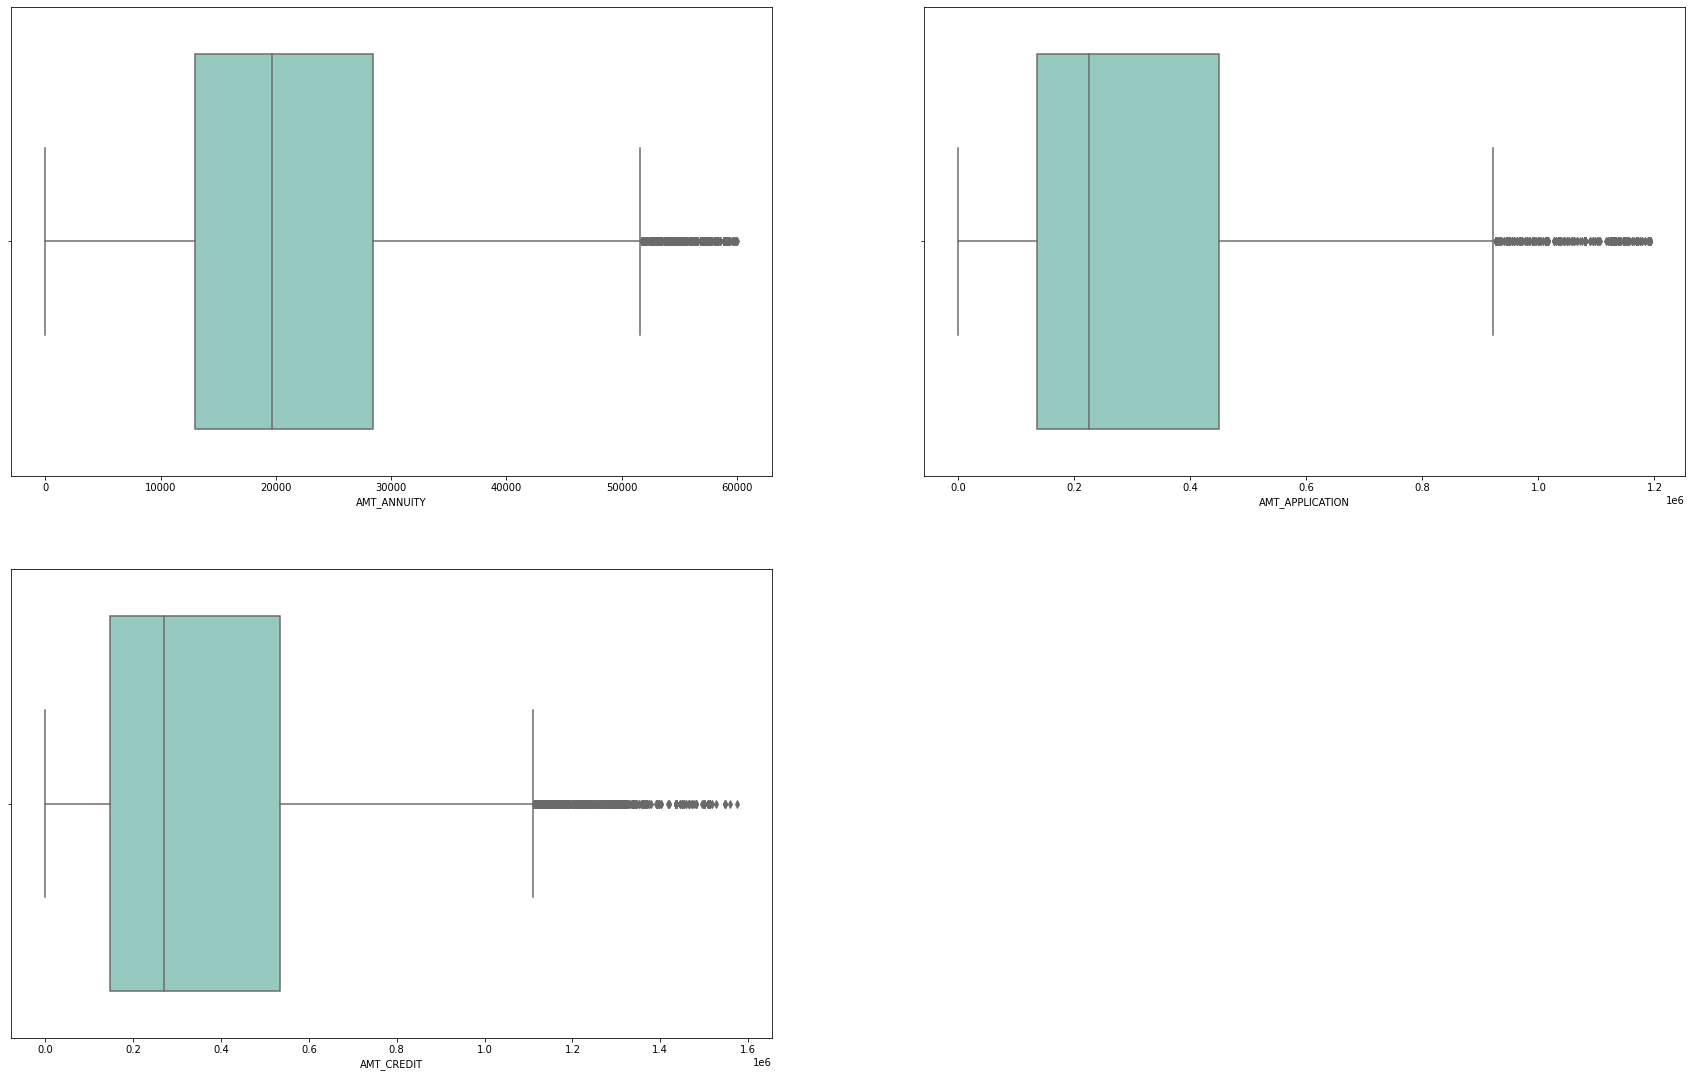

In [148]:
amnt_cols = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT']
plt.figure(figsize = [30,50])
plt.title("Distribution of Non categorical numeric columns")
i=1
for col in amnt_cols:
    plt.subplot(5,2,i)
    sns.boxplot(x = prev_appl_df[col],palette="Set3")
    #plt.yscale('log')
    i=i+1
    
plt.show()

## Univariate Analysis 

In [149]:
prev_appl_df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'CNT_PAYMENT',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [150]:
analysis_cols = ['NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION','NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_PAYMENT_TYPE', 'PRODUCT_COMBINATION']

analysis_df = prev_appl_df[analysis_cols]
analysis_cat_col = list(analysis_df.select_dtypes(include=object).columns)
analysis_num_col = list(analysis_df.select_dtypes(exclude=object).columns)


`NAME_CONTRACT_TYPE Analysis`

Text(0.5, 1.0, 'NAME_CONTRACT_TYPE')

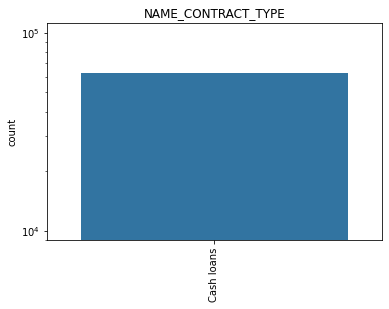

In [151]:
ax = sns.countplot('NAME_CONTRACT_TYPE',data=prev_appl_df)
plt.xticks(rotation=90)
plt.yscale('log')
plt.xlabel("")
plt.title('NAME_CONTRACT_TYPE')


There are only Cash loans 

In [152]:
def uniplt(df,col,figure_size,pal,orde=None):
    
    
    plt.figure(figsize=figure_size)
    ax = sns.countplot(col,data=df,palette=pal,order=orde)
    plt.xticks(rotation=90)
    plt.yscale('log')
    plt.xlabel("")
    plt.title(col)


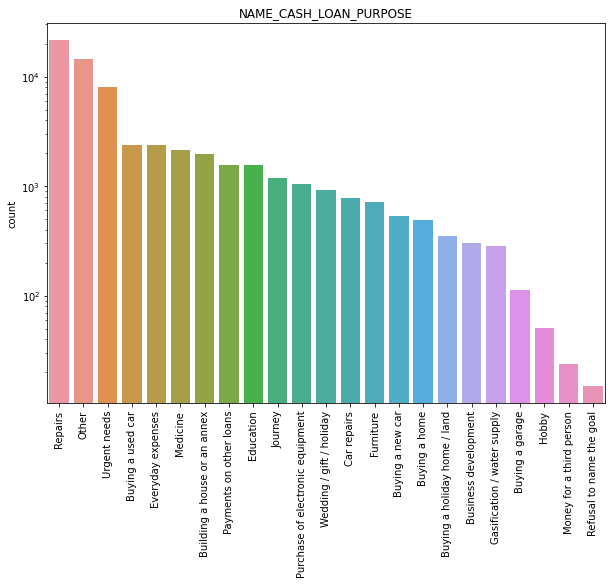

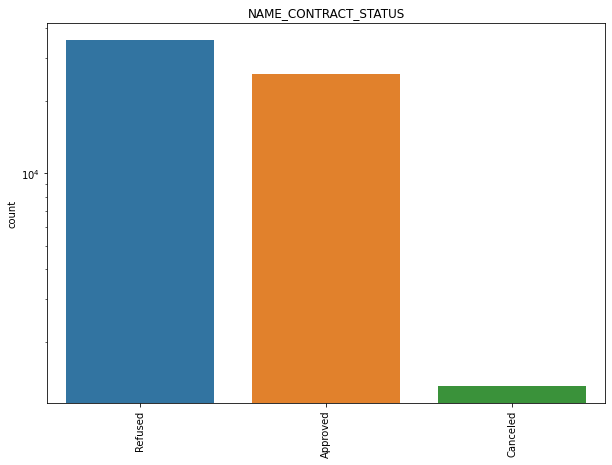

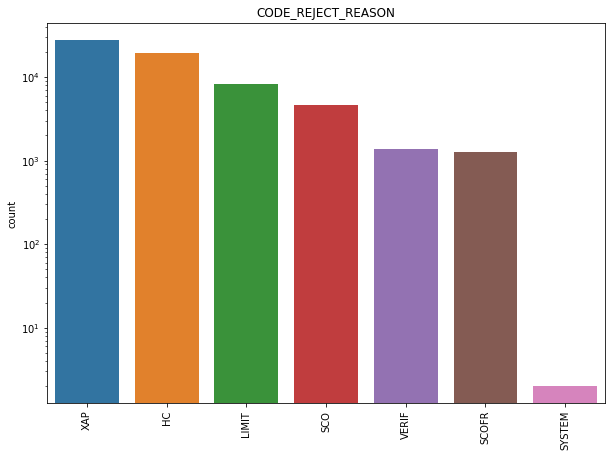

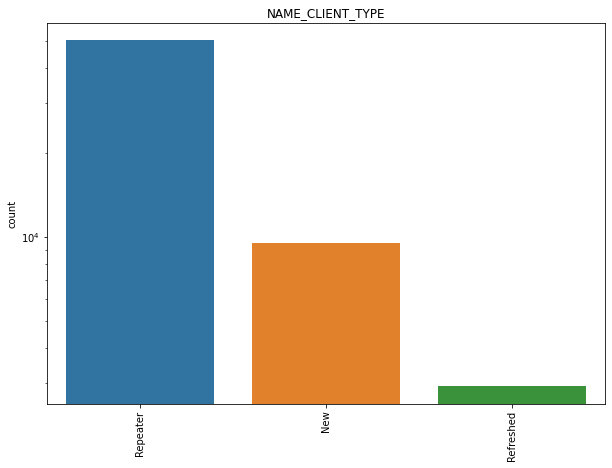

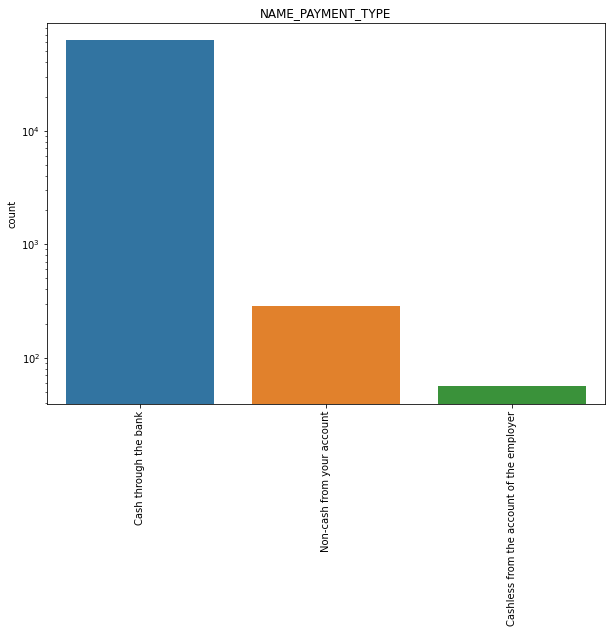

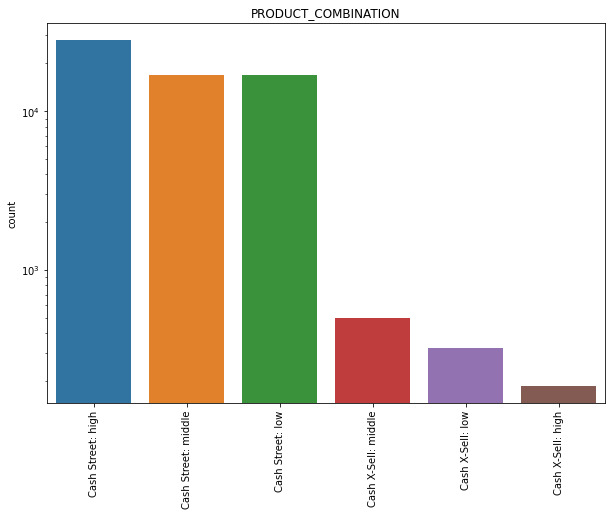

In [153]:
for col in analysis_cat_col[1:]:
    uniplt(prev_appl_df,col,[10,7],None,prev_appl_df[col].value_counts().index)

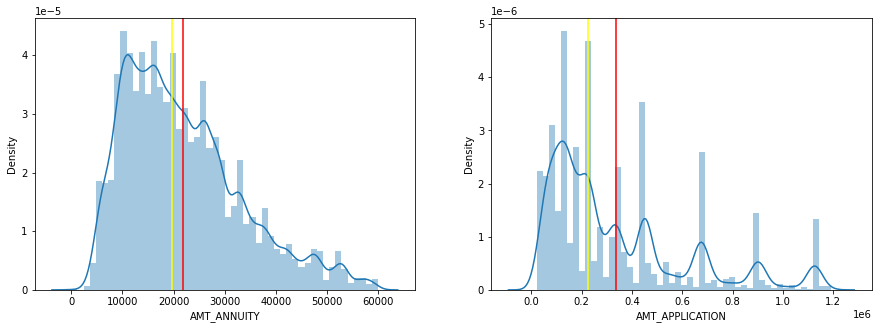

In [154]:
i=1
plt.figure(figsize=[15,5])
for col in analysis_num_col:
    plt.subplot(1,2,i)
    sns.distplot(prev_appl_df[col],kde=True)
    plt.axvline(prev_appl_df[col].mean(), color='red')
    plt.axvline(prev_appl_df[col].median(), color='yellow')
    i = i+1
plt.show()

## Bivariate/MultiVariate Analysis

In [155]:
analysis_cols

['NAME_CONTRACT_TYPE',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_PAYMENT_TYPE',
 'PRODUCT_COMBINATION']

**NAME_CASH_LOAN_PURPOSE vs NAME_CONTRACT_STATUS**

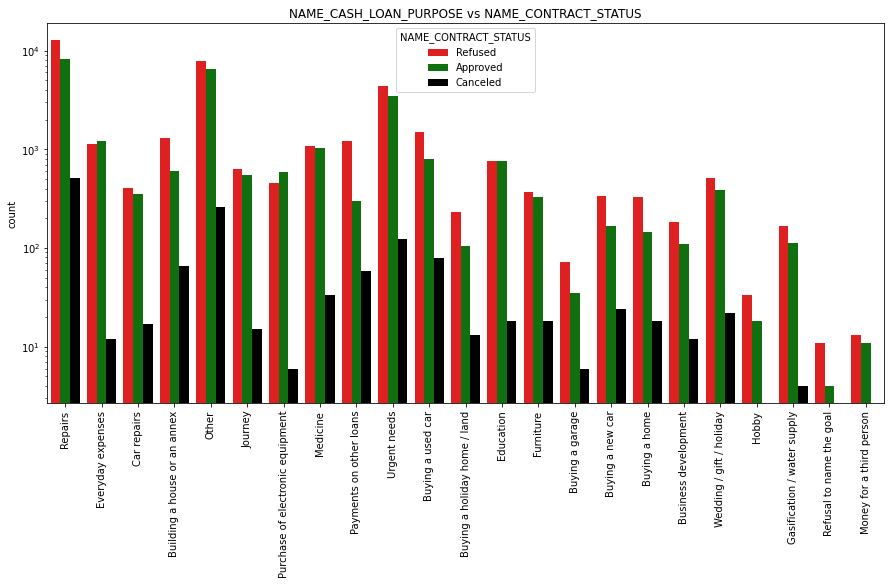

In [156]:
plt.figure(figsize=[15,7])
sns.countplot(data = prev_appl_df, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_CONTRACT_STATUS',palette=['r','g','k'])
plt.title('NAME_CASH_LOAN_PURPOSE vs NAME_CONTRACT_STATUS')
plt.yscale('log')
plt.xticks(rotation=90)
plt.xlabel("")
plt.show()


**NAME_CLIENT_TYPE vs NAME_CONTRACT_STATUS**

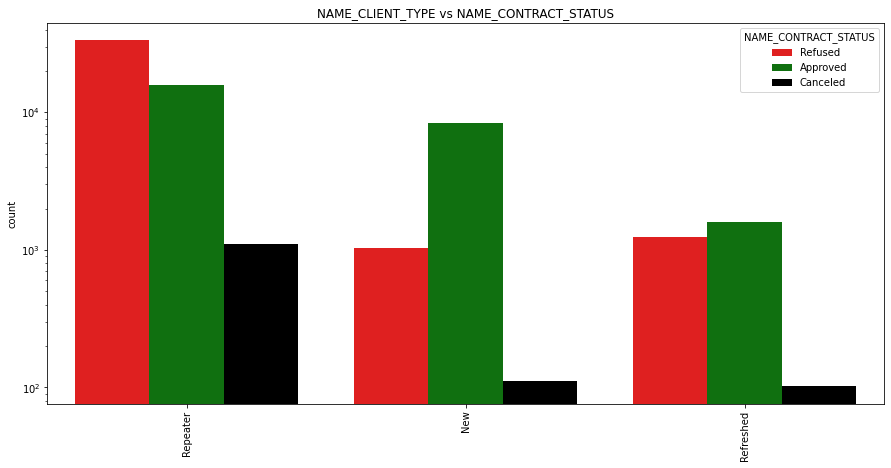

In [157]:
plt.figure(figsize=[15,7])
sns.countplot(data = prev_appl_df, x='NAME_CLIENT_TYPE',hue='NAME_CONTRACT_STATUS',palette=['r','g','k'])
plt.title('NAME_CLIENT_TYPE vs NAME_CONTRACT_STATUS')
plt.yscale('log')
plt.xticks(rotation=90)
plt.xlabel("")
plt.show()


**NAME_CASH_LOAN_PURPOSE vs NAME_CLIENT_TYPE**

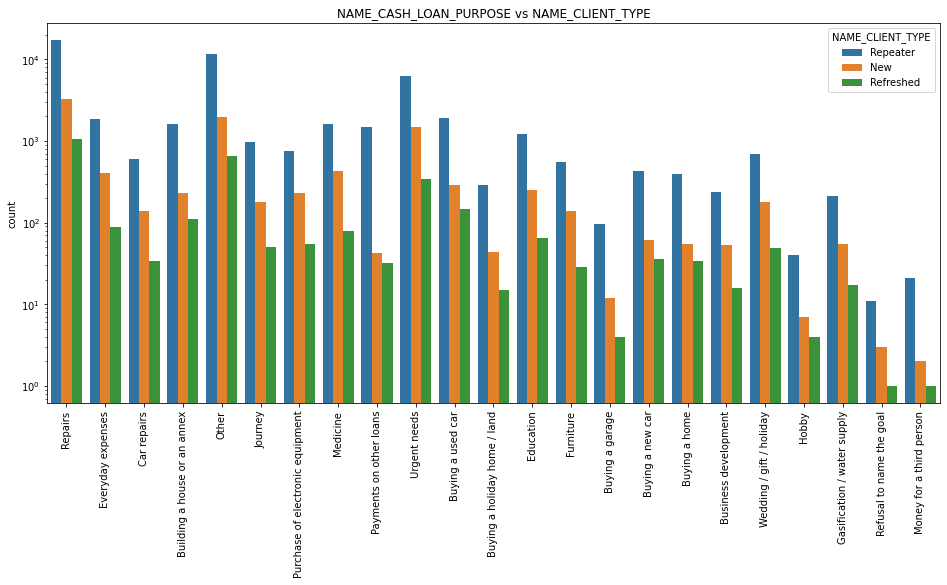

In [158]:
plt.figure(figsize=[16,7])
sns.countplot(data = prev_appl_df, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_CLIENT_TYPE')
plt.title('NAME_CASH_LOAN_PURPOSE vs NAME_CLIENT_TYPE')
plt.yscale('log')
plt.xticks(rotation=90)
plt.xlabel("")
plt.show()

**NAME_CASH_LOAN_PURPOSE vs CODE_REJECT_REASON**

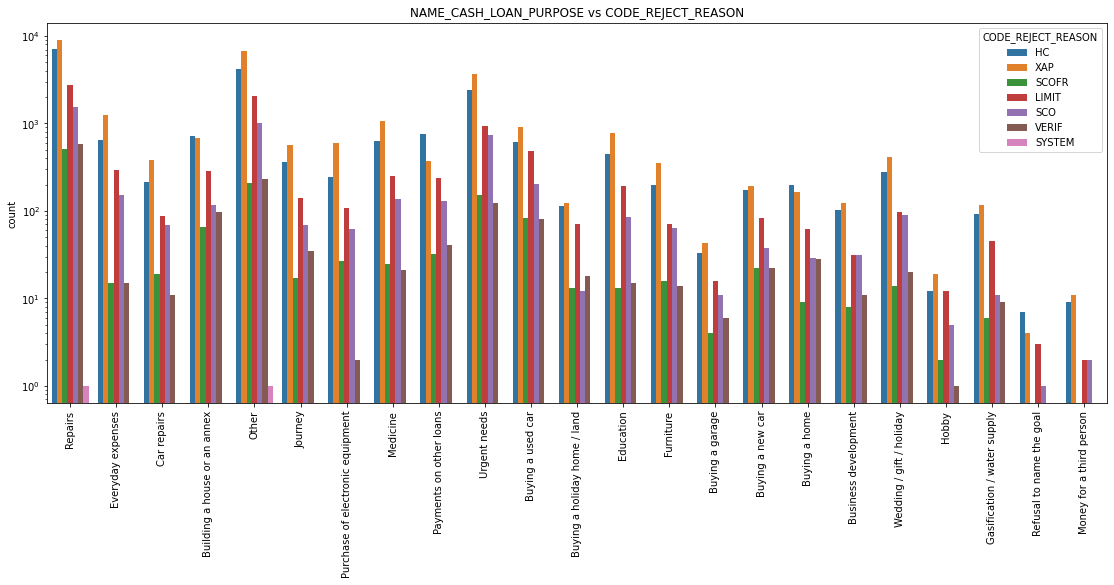

In [159]:
plt.figure(figsize=[19,7])
sns.countplot(data = prev_appl_df, x='NAME_CASH_LOAN_PURPOSE',hue='CODE_REJECT_REASON')
plt.title('NAME_CASH_LOAN_PURPOSE vs CODE_REJECT_REASON')
plt.yscale('log')
plt.xticks(rotation=90)
plt.xlabel("")
plt.show()

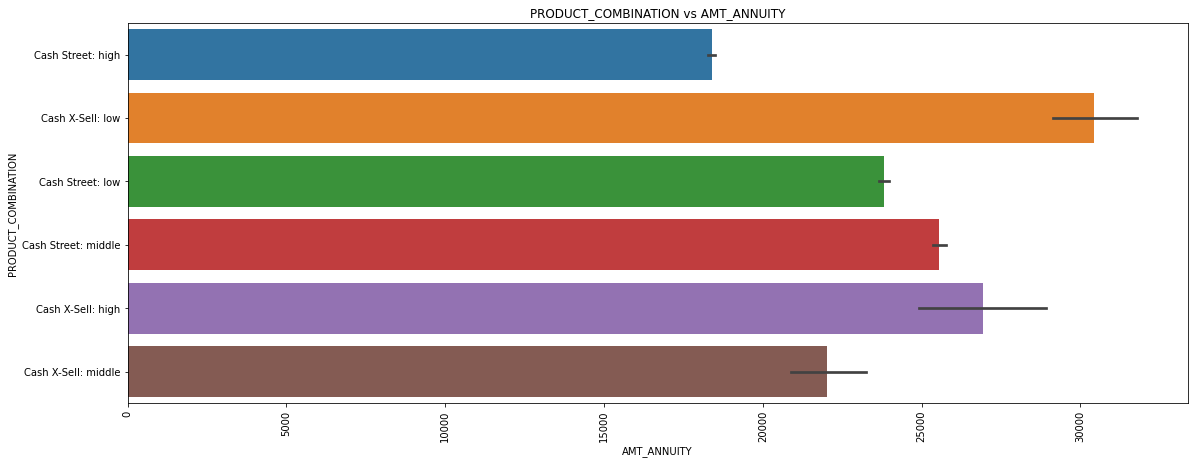

In [160]:
plt.figure(figsize=[19,7])
sns.barplot(data = prev_appl_df, y='PRODUCT_COMBINATION',x='AMT_ANNUITY')
plt.title('PRODUCT_COMBINATION vs AMT_ANNUITY')
#plt.xscale('log')
plt.xticks(rotation=90)
#plt.xlabel("")
plt.show()

**NAME_PAYMENT_TYPE vs AMT_ANNUITY w.r.t status of the loan**

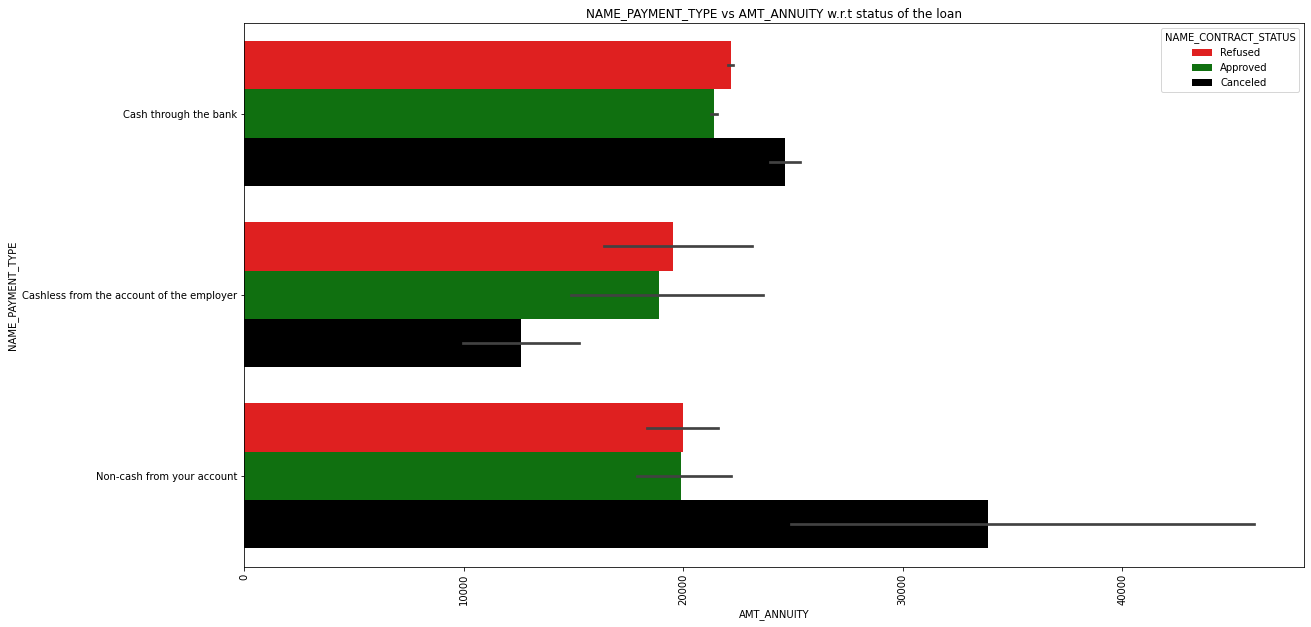

In [161]:
plt.figure(figsize=[19,10])
sns.barplot(data = prev_appl_df, y='NAME_PAYMENT_TYPE',x='AMT_ANNUITY',hue='NAME_CONTRACT_STATUS',palette=['r','g','k'])
plt.title('NAME_PAYMENT_TYPE vs AMT_ANNUITY w.r.t status of the loan')
#plt.xscale('log')
plt.xticks(rotation=90)
plt.show()

**Distribution of NAME_CONTRACT_STATUS in AMT_APPLICATION vs AMT_ANNUITY**

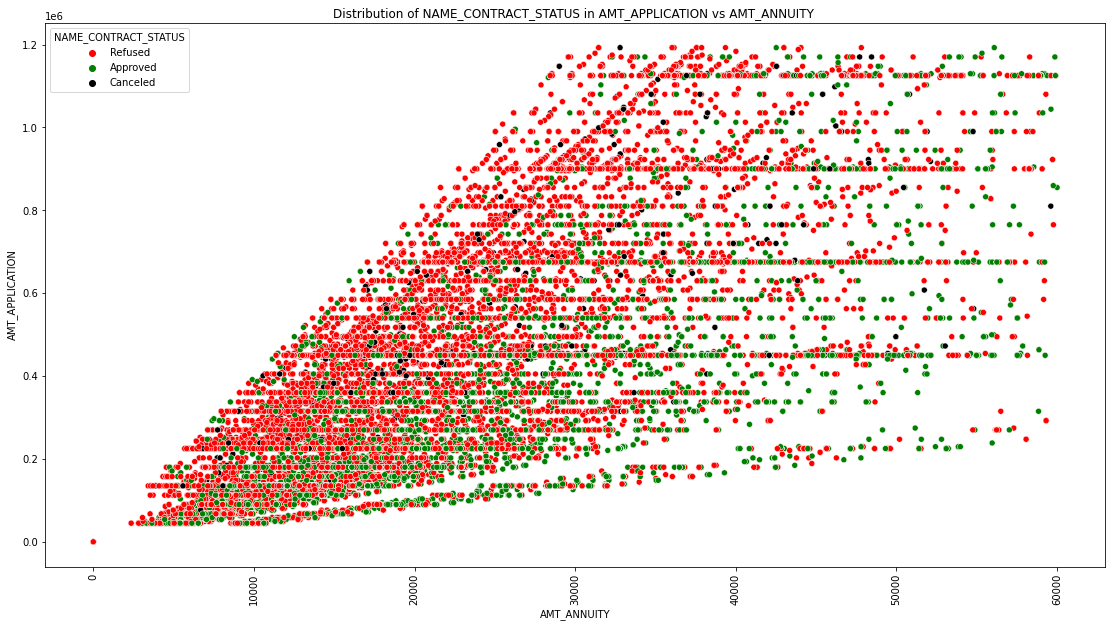

In [162]:
plt.figure(figsize=[19,10])
sns.scatterplot(data = prev_appl_df, y='AMT_APPLICATION',x='AMT_ANNUITY',hue='NAME_CONTRACT_STATUS',palette=['r','g','k'])
plt.title('Distribution of NAME_CONTRACT_STATUS in AMT_APPLICATION vs AMT_ANNUITY ')
plt.xticks(rotation=90)
plt.show()






_______



**===================================================================================================================**
______

# Analysis on combining data of current application and previous application data 

In [163]:
prev_cols = analysis_cols.copy()
prev_cols.append('SK_ID_CURR')
combined_df = pd.merge(appl_df[['SK_ID_CURR','TARGET','AMT_ANNUITY','NAME_INCOME_TYPE']],prev_appl_df[prev_cols],how='inner',on='SK_ID_CURR')
combined_df.head()


SK_ID_CURR  TARGET  AMT_ANNUITY_x NAME_INCOME_TYPE NAME_CONTRACT_TYPE  \
0      100034       0         9000.0          Working         Cash loans   
1      100046       0        27000.0          Working         Cash loans   
2      100046       0        27000.0          Working         Cash loans   
3      100053       0        17649.0        Pensioner         Cash loans   
4      100060       0        14661.0          Working         Cash loans   

   AMT_ANNUITY_y  AMT_APPLICATION NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0      22430.430          94500.0                  Other             Approved   
1      28390.635         337500.0                Repairs             Approved   
2      29053.215         450000.0                Repairs              Refused   
3       9636.705          90000.0                  Other             Approved   
4      12177.000         180000.0                Repairs             Approved   

  CODE_REJECT_REASON NAME_CLIENT_TYPE      NAME_PAYMENT_TYPE  \
0                XAP              New  Cash through the bank   
1                XAP              New  Cash through the bank   
2              LIMIT         Repeater  Cash through the bank   
3                XAP              New  Cash through the bank   
4                XAP              New  Cash through the bank   

  PRODUCT_COMBINATION  
0   Cash Street: high  
1    Cash Street: low  
2    Cash Street: low  
3   Cash Street: high  
4   Cash Street: high

In [164]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53640 entries, 0 to 53639
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SK_ID_CURR              53640 non-null  int64  
 1   TARGET                  53640 non-null  int64  
 2   AMT_ANNUITY_x           53640 non-null  float64
 3   NAME_INCOME_TYPE        53640 non-null  object 
 4   NAME_CONTRACT_TYPE      53640 non-null  object 
 5   AMT_ANNUITY_y           53640 non-null  float64
 6   AMT_APPLICATION         53640 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  53640 non-null  object 
 8   NAME_CONTRACT_STATUS    53640 non-null  object 
 9   CODE_REJECT_REASON      53640 non-null  object 
 10  NAME_CLIENT_TYPE        53640 non-null  object 
 11  NAME_PAYMENT_TYPE       53640 non-null  object 
 12  PRODUCT_COMBINATION     53640 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 5.7+ MB


* It has 53640 rows and 12 columns

### Combined Data Analysis

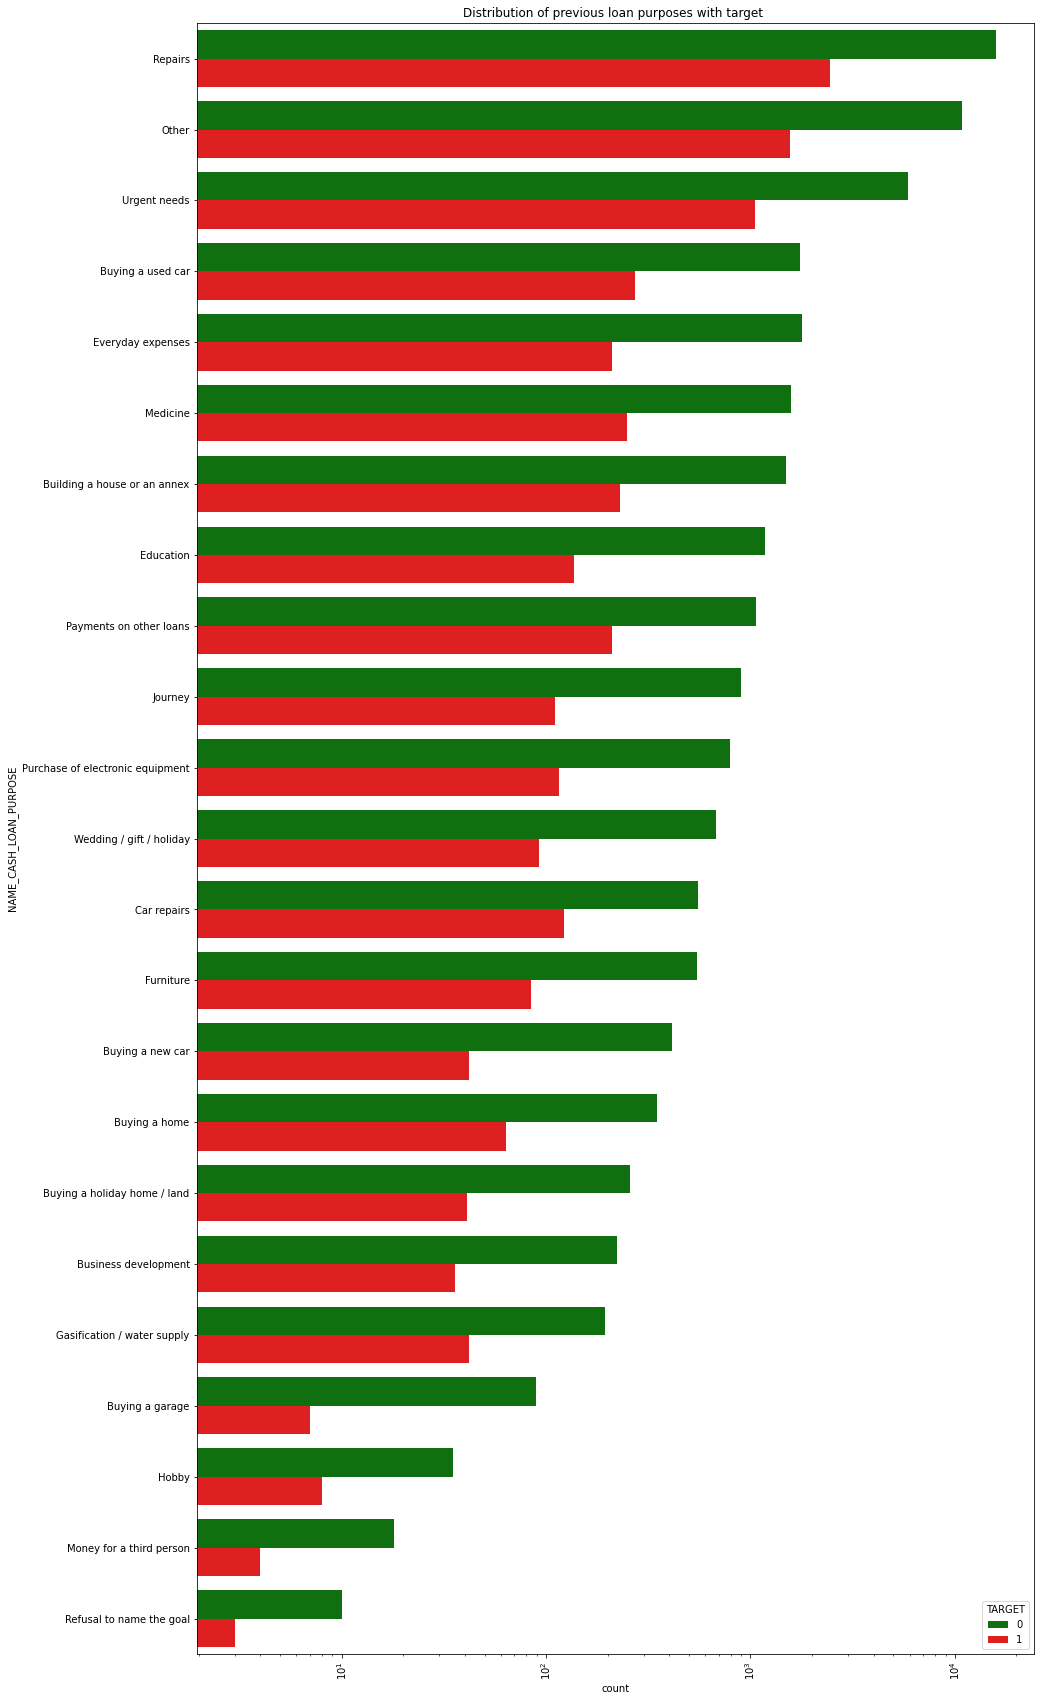

In [165]:
plt.figure(figsize=(15,30))
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of previous loan purposes with target ')
ax = sns.countplot(data = combined_df, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=combined_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette=['g','r'])


**Distribution of Target w.r.t previous annuity and current annuity**

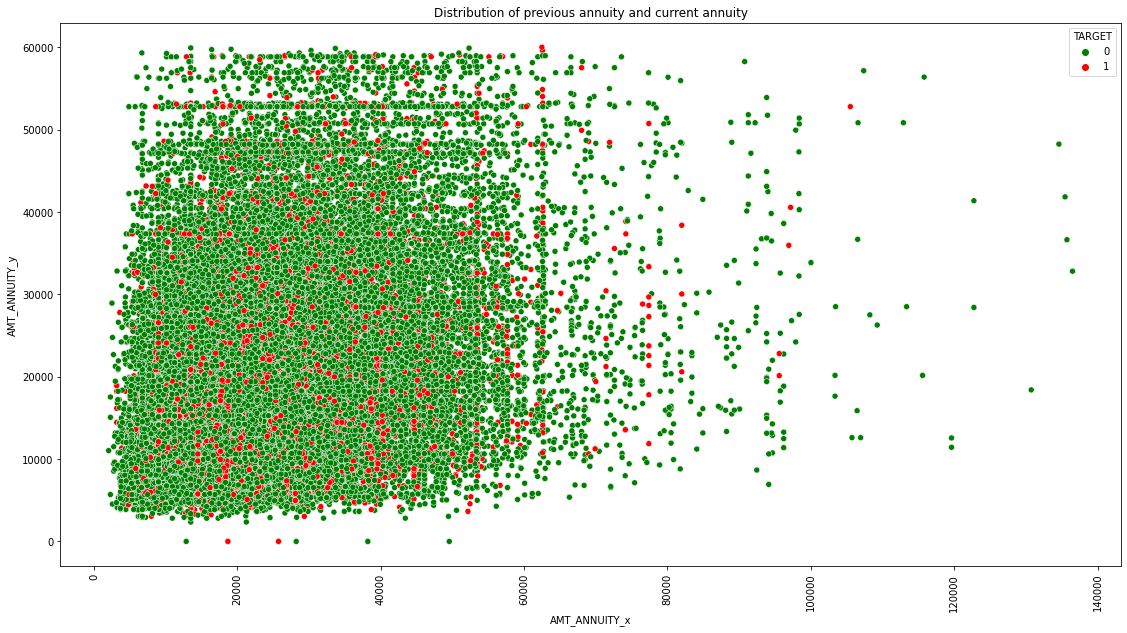

In [166]:
plt.figure(figsize=[19,10])
sns.scatterplot(data = combined_df, y='AMT_ANNUITY_y',x='AMT_ANNUITY_x',hue='TARGET',palette=['g','r'])
plt.title('Distribution of previous annuity and current annuity')
#plt.xscale('log')
#plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

**Distribution of defaulters and repayers w.r.t previous application status**

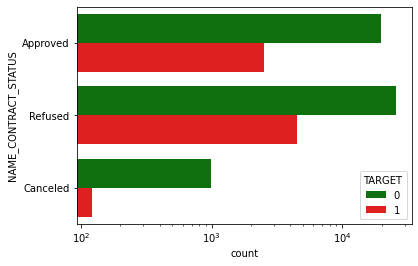

In [167]:
sns.countplot(data=combined_df,hue='TARGET',y='NAME_CONTRACT_STATUS',palette=['g','r'])
plt.xscale('log')
plt.show()

**Distribution of income type of defaulters with their previous application status**

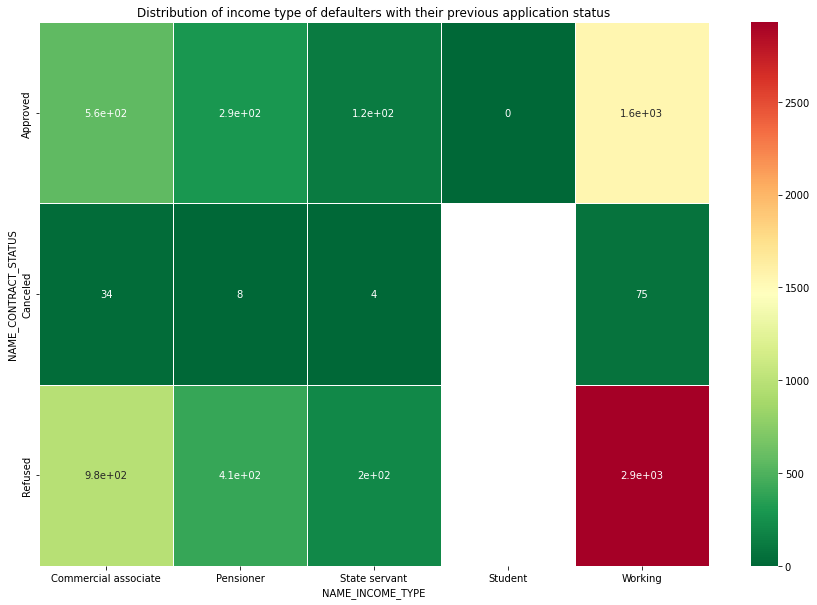

In [168]:
pivo = pd.pivot_table(data=combined_df,index='NAME_CONTRACT_STATUS',columns='NAME_INCOME_TYPE',values='TARGET',aggfunc=sum)
plt.figure(figsize=[15,10])
plt.title('Distribution of income type of defaulters with their previous application status')
sns.heatmap(pivo,annot=True,cmap='RdYlGn_r',linewidths=0.5)

plt.show()


1. People whose previous application was refused and are in working category defaulted the most

**Distribution of income type of defaulters with their previous application cash loan purpose**


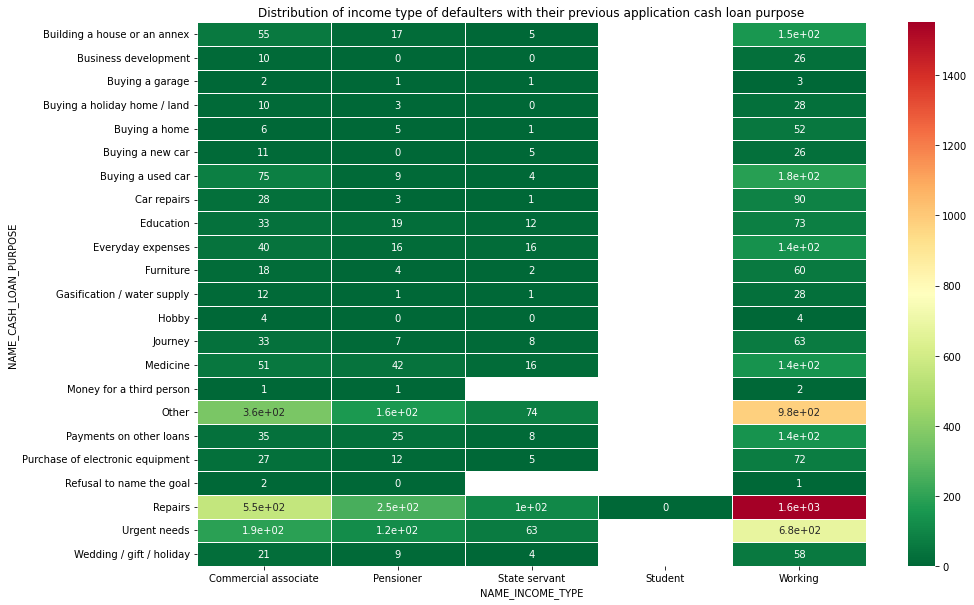

In [169]:
pivo_purp = pd.pivot_table(data=combined_df,index='NAME_CASH_LOAN_PURPOSE',columns='NAME_INCOME_TYPE',values='TARGET',aggfunc=sum)
plt.figure(figsize=[15,10])
plt.title('Distribution of income type of defaulters with their previous application cash loan purpose')
sns.heatmap(pivo_purp,annot=True,cmap='RdYlGn_r',linewidths=0.5)

plt.show()

1. Most of the loans were defaulted who had income type as working and their previous application loan purpose was Repair.


**===================================================================================================================**
______

# Final Observations

1. More criteria/checks needs to be applied before grating loan to clients who are on currently `working or a commerial associate` and in an organisation which falls under `Business Entity Type 3,Self Employed and Priosners` and have completed `Secondary/secondary special education` are having high chances of defaulting.
 * **Its highly recommeded to give loans to clients who are Businessman and Student as they defaulted the least.**
2. Also its not that suggested to give loans for people who are in the current role between 0-5 years, there are high chances of them defaulting. Its suggested to grant to people who are in the role for 10-15 years.
3. Most of the defaulters have income in the range of 125000-150000 and 100000-125000, so its recommeded to give loans whose income is below that range in order to be risk free.
4. As Clients with previous application's purpose as Repair defaulted more in current loan application. Its risky to give loans for Repair purpose
5. People whose previous application was refused and are in working category defaulted the most. So its not recommended to grant them loans to avoid risk.